Wasp 121. There is a lot of archival data (transit obs) but it may be quite bad. We have G140L data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from matplotlib.gridspec import GridSpec


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
# rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/'
x1ds = np.hstack((glob.glob('{}*x1d.fits'.format(path)), glob.glob('{}*sx1.fits'.format(path))))
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m97010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m97020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m97030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m97040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m97050_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m98010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m98020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m98030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m98040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m98050_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m99010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m99030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/was

(1e-17, 1.748718222312521e-12)

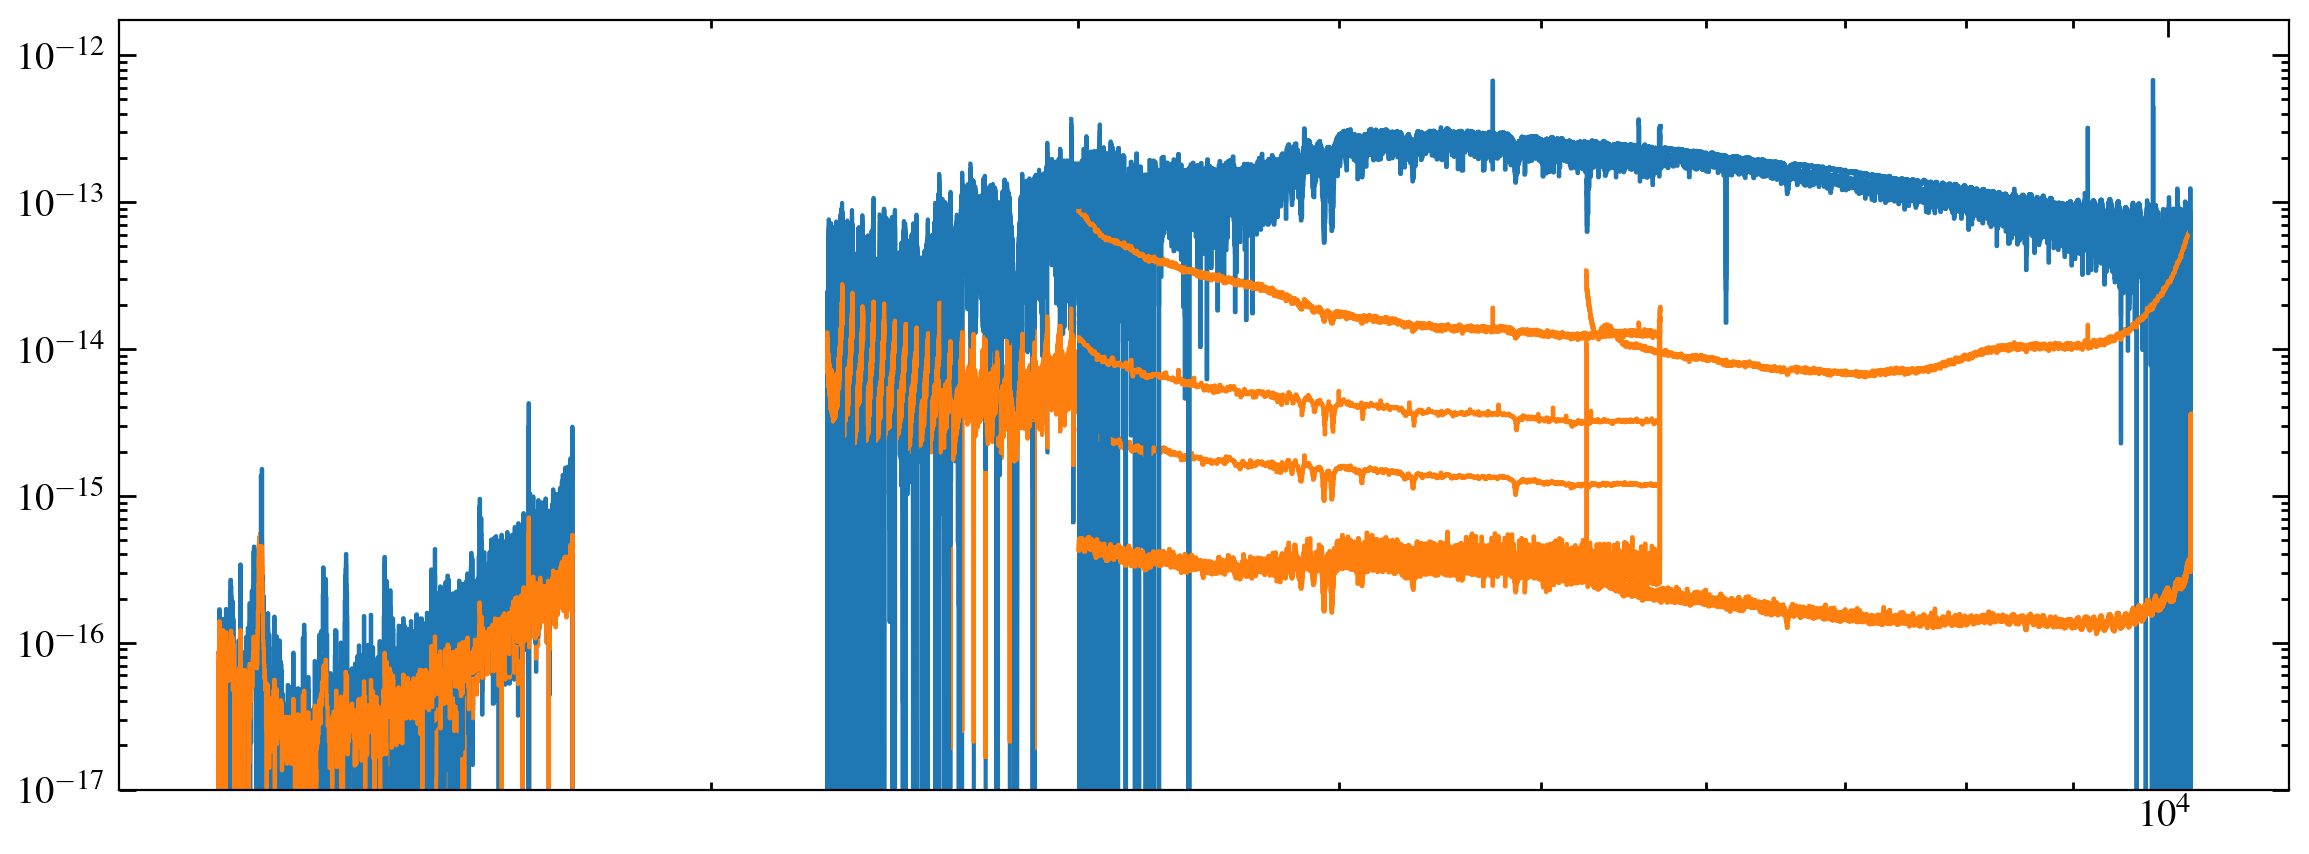

In [3]:
for x in x1ds:
    # print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    # print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    # print(data['A2Center'])
    # w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    for dt in data:
        w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
        if grating == 'G430L':
            mask = w > 3000
        else:
            mask = w > 1160
        
        w, f, e = w[mask], f[mask], e[mask]
        plt.step(w, f, where='mid', c='C0')
        plt.step(w, e, where='mid', c='C1')
    # plt.show()

plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-17)

G140l first, then see what we can build out of the archival spectra

In [4]:
g140l = []
for x in x1ds:
    # print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM']
    if grating == 'G140L':
        g140l.append(x)
    # print(fits.getheader(x, 0)['OPT_ELEM'])

/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/oeoo32010_x1d.fits
[96.89902]


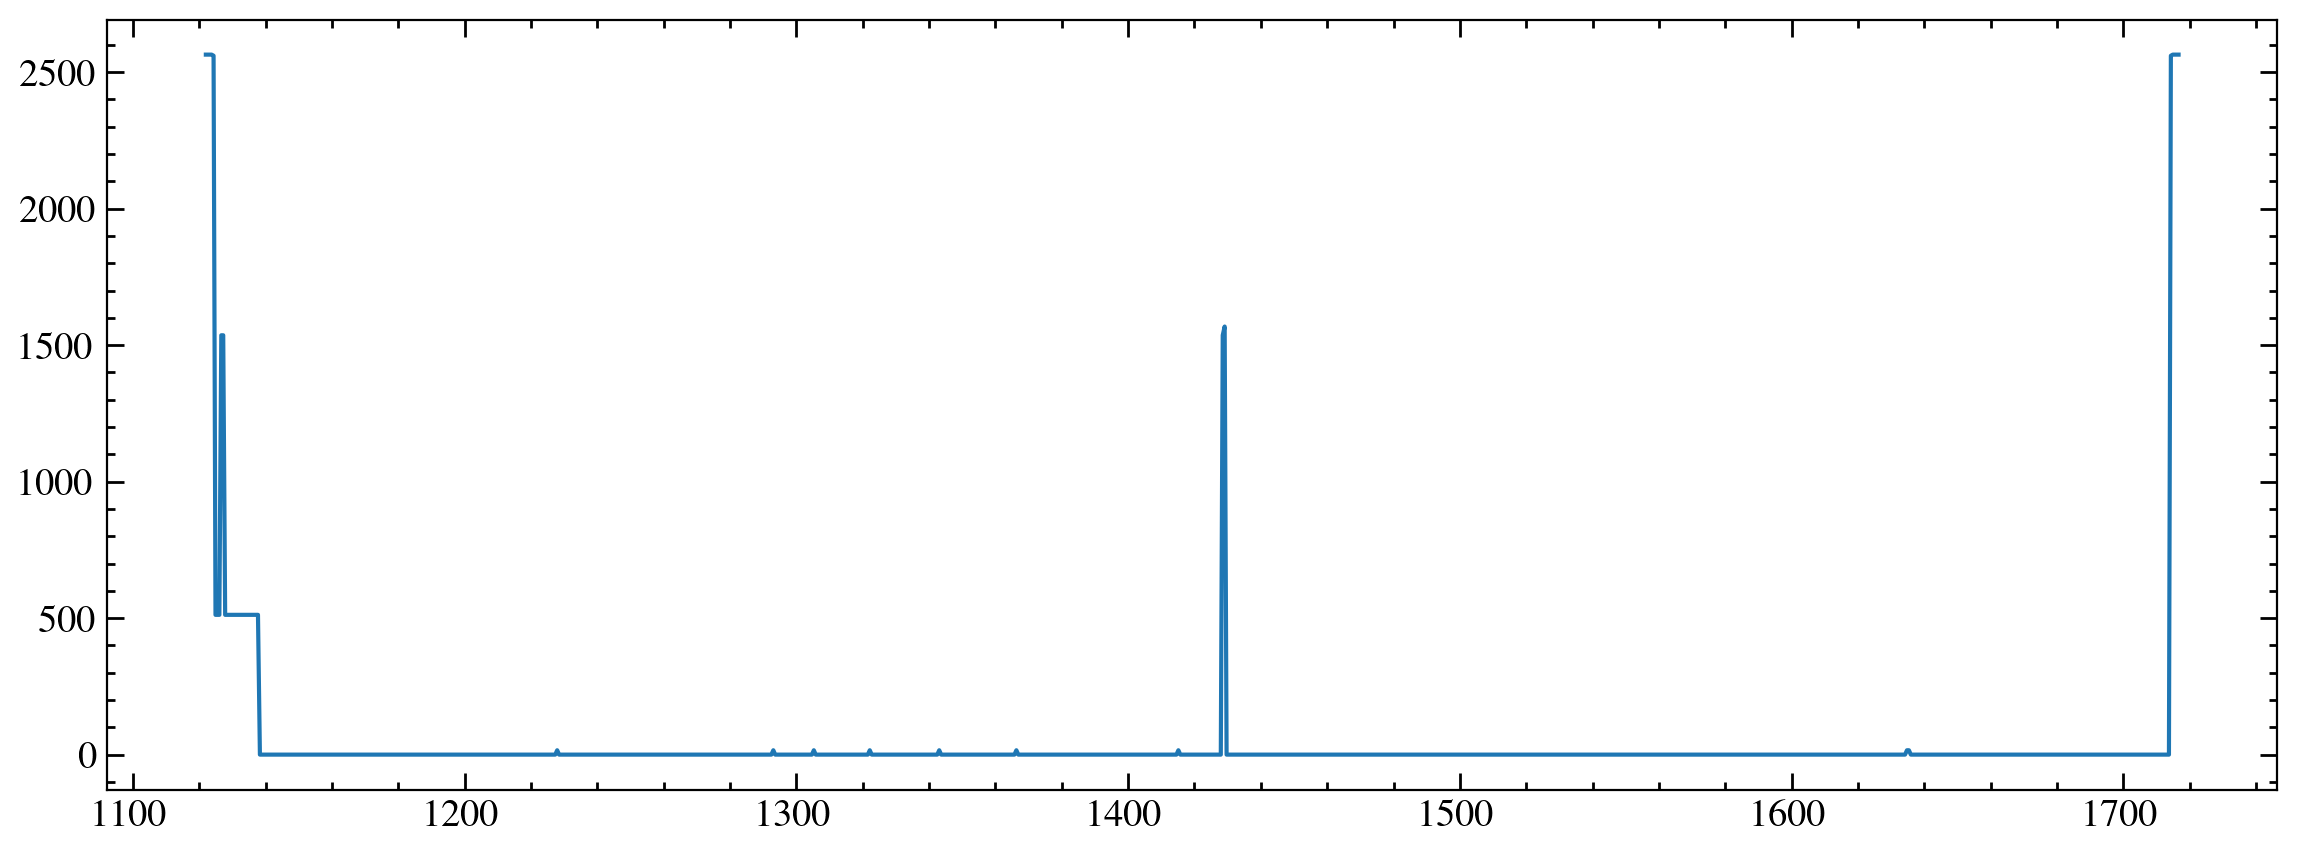

/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/oeoo32020_x1d.fits
[97.24248]


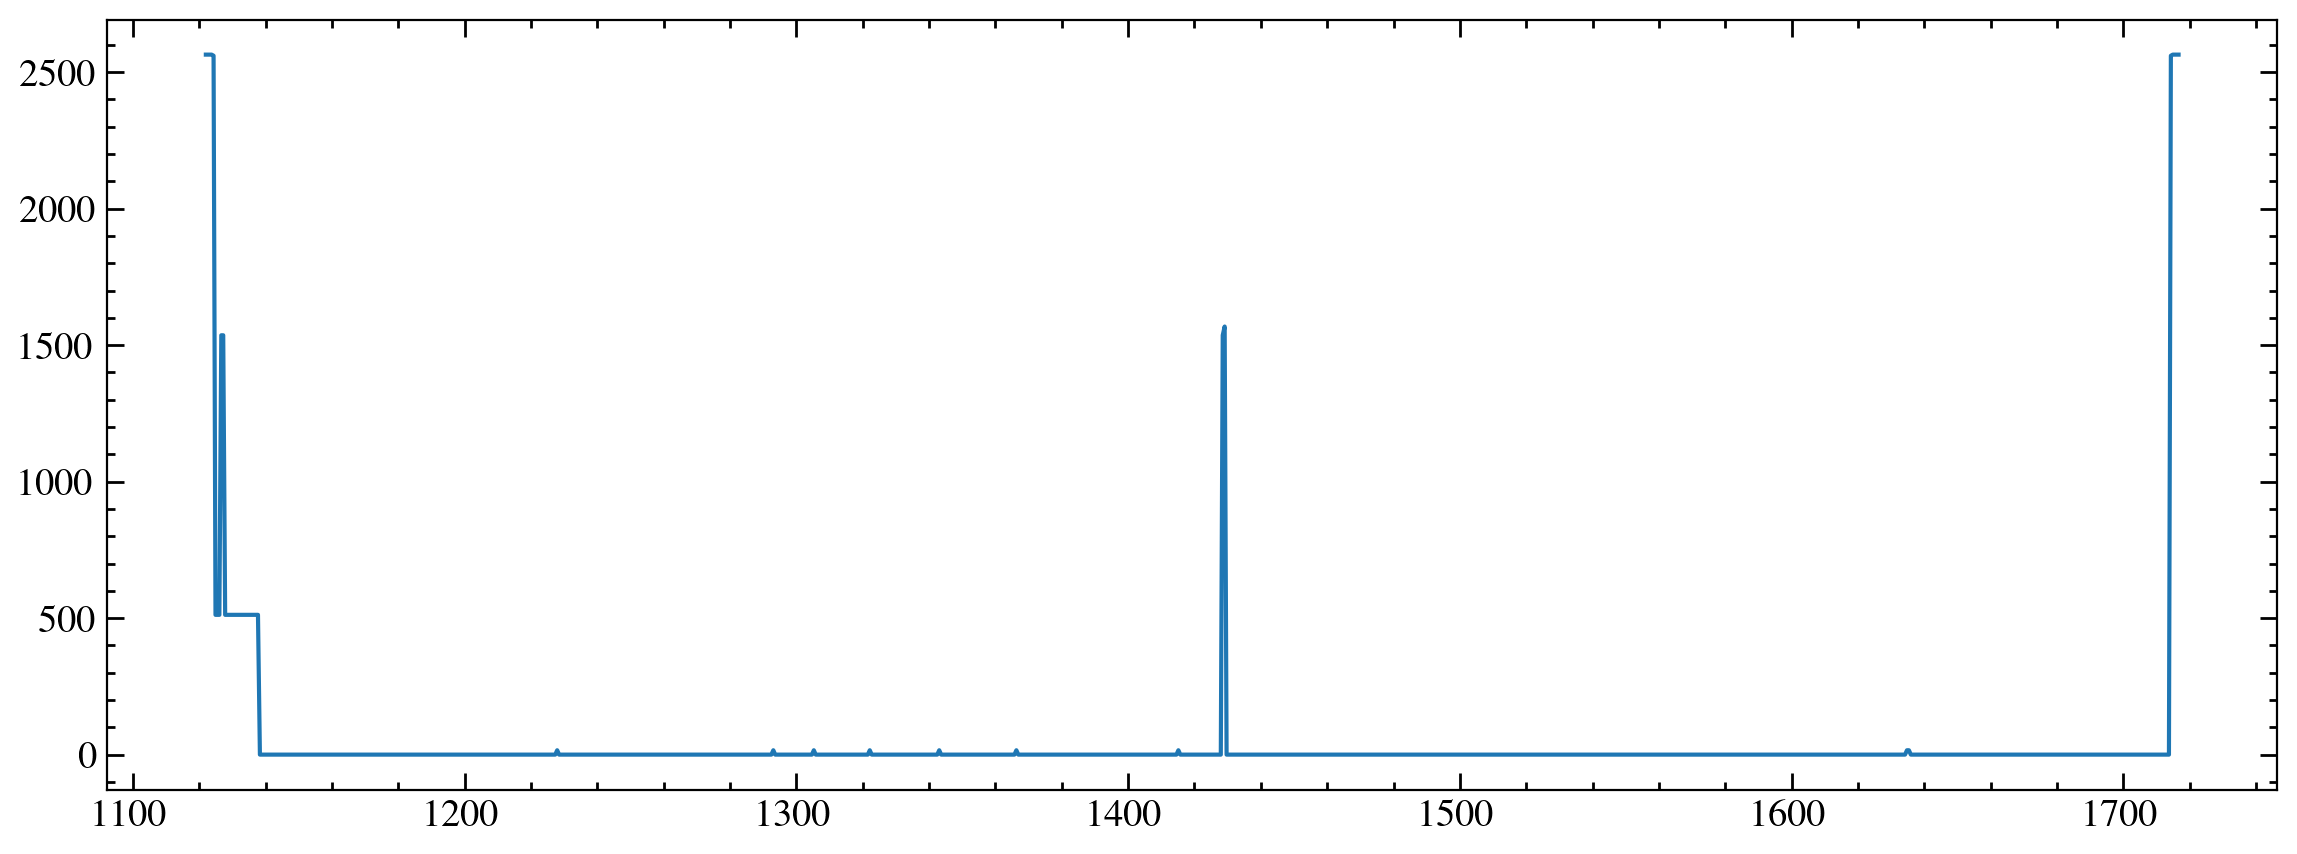

/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/oeoo32030_x1d.fits
[97.10264]


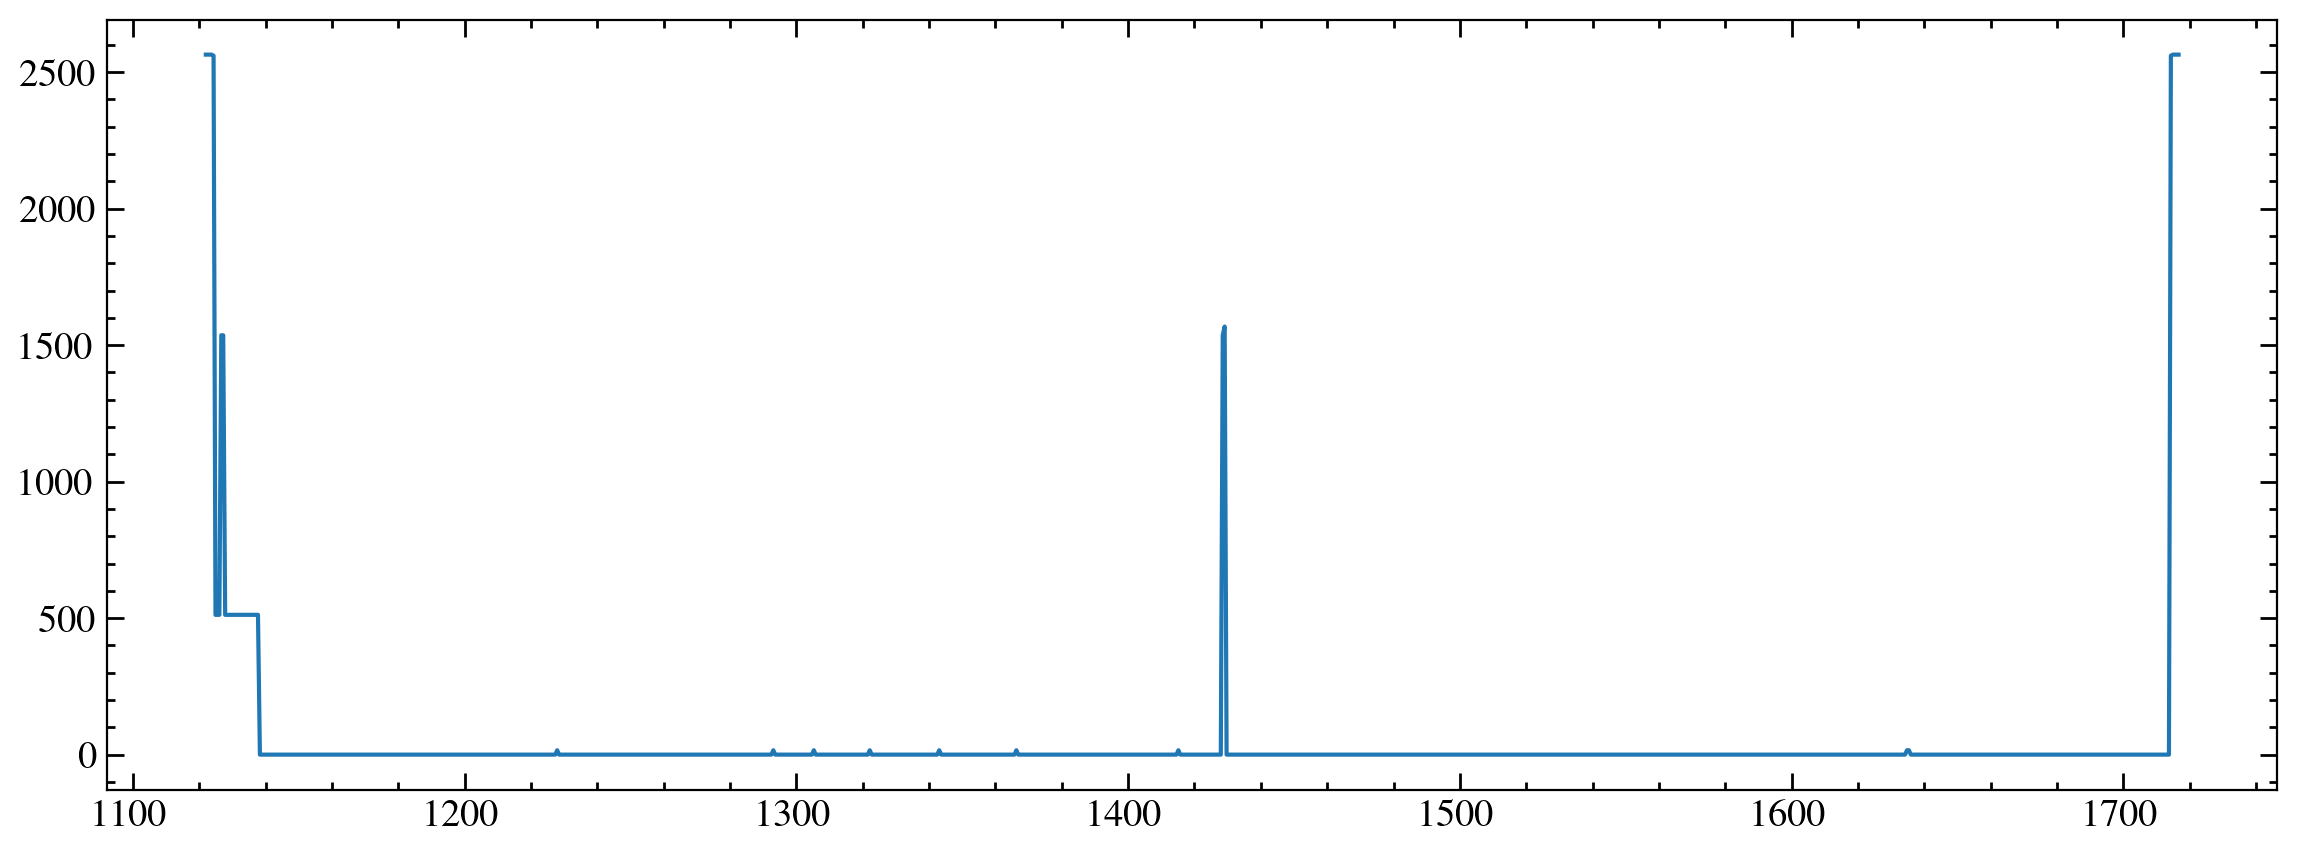

In [5]:
for x in g140l:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    # print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    print(data['A2Center'])
    # w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    for dt in data:
        w, f, e, dq= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR'], dt['DQ']
        if grating == 'G430L':
            mask = w > 3000 
        else:
            mask = (w > 1160) & (dq ==0)
        
        # w, f, e = w[mask], f[mask], e[mask]
        # plt.step(w, f, where='mid', c='C0')
        # plt.step(w, e, where='mid', c='C1')
        plt.plot(w, dq)
    plt.show()

# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(1e-17)

In [6]:
import importlib
import prepare_stis
importlib.reload(prepare_stis)
x1dpath = '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/use_x1ds/'
savepath = 'draft_hlsp/wasp-121/'
hlsp = 'meats_hlsp_info.csv'
version = 1
# prepare_stis.make_stis_spectrum(x1dpath, version, hlsp, savepath = savepath, plot=True, save_fits=True, normfac=1.0, star = 'WASP-121')

In [7]:
g430l = glob.glob('{}oeoo*sx1.fits'.format(path))
# for x in g430l:
#     print(x)
#     grating = fits.getheader(x, 0)['OPT_ELEM'] 
#     # print(fits.getheader(x, 0)['OPT_ELEM'])
#     data = fits.getdata(x, 1)
#     print(data['A2Center'])
#     # w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
#     for dt in data:
#         w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
#         if grating == 'G430L':
#             mask = w > 3000
#         else:
#             mask = w > 1160
        
#         w, f, e = w[mask], f[mask], e[mask]
#         plt.step(w, f, where='mid', c='C0')
#         plt.step(w, e, where='mid', c='C1')
#     plt.show()


In [8]:
hlsp = glob.glob('draft_hlsp/wasp-121/*')
hlsp

['draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g430l_v1_component-spec.fits',
 'draft_hlsp/wasp-121/hlsp_muscles_multi_multi_wasp-121_broadband_v1_var-res-sed.fits',
 'draft_hlsp/wasp-121/hlsp_muscles_multi_multi_wasp-121_broadband_v1_adapt-const-res-sed.fits',
 'draft_hlsp/wasp-121/hlsp_muscles_model_lya_wasp-121_na_v1_component-spec.fits',
 'draft_hlsp/wasp-121/hlsp_muscles_model_dem_wasp-121_na_v1_component-spec.fits',
 'draft_hlsp/wasp-121/hlsp_muscles_multi_multi_wasp-121_broadband_v1_const-res-sed.fits',
 'draft_hlsp/wasp-121/hlsp_muscles_multi_multi_wasp-121_broadband_v1_adapt-var-res-sed.fits',
 'draft_hlsp/wasp-121/hlsp_muscles_xmm_epic_wasp-121_na_v1_component-spec.fits',
 'draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_e230m_v1_component-spec.fits',
 'draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g750l_v1_component-spec.fits',
 'draft_hlsp/wasp-121/hlsp_muscles_model_apec_wasp-121_na_v1_component-spec.fits',
 'draft_hlsp/wasp-121/hlsp_muscles_model_phx_wasp-12

draft_hlsp/wasp-121/hlsp_muscles_multi_multi_wasp-121_broadband_v1_var-res-sed.fits


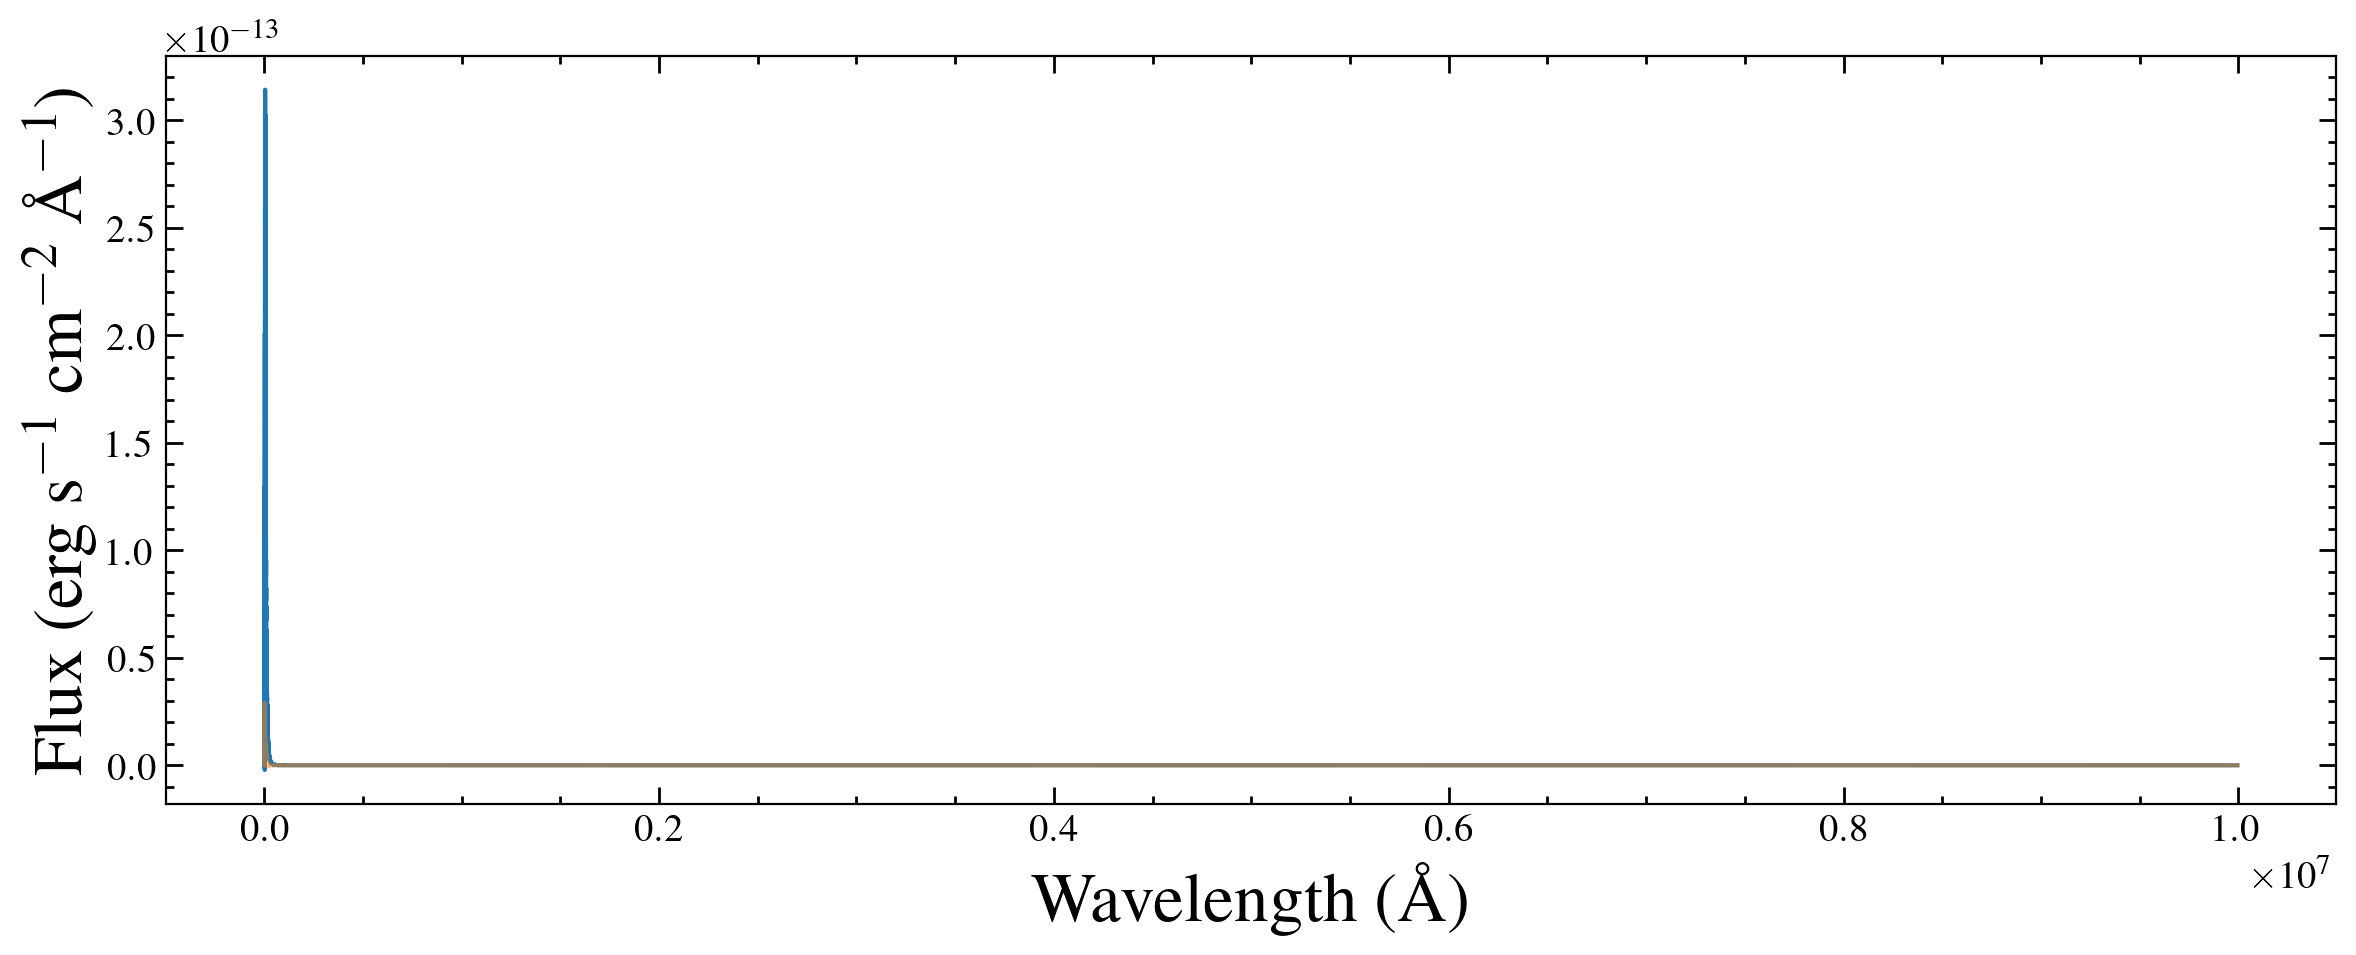

draft_hlsp/wasp-121/hlsp_muscles_multi_multi_wasp-121_broadband_v1_adapt-const-res-sed.fits


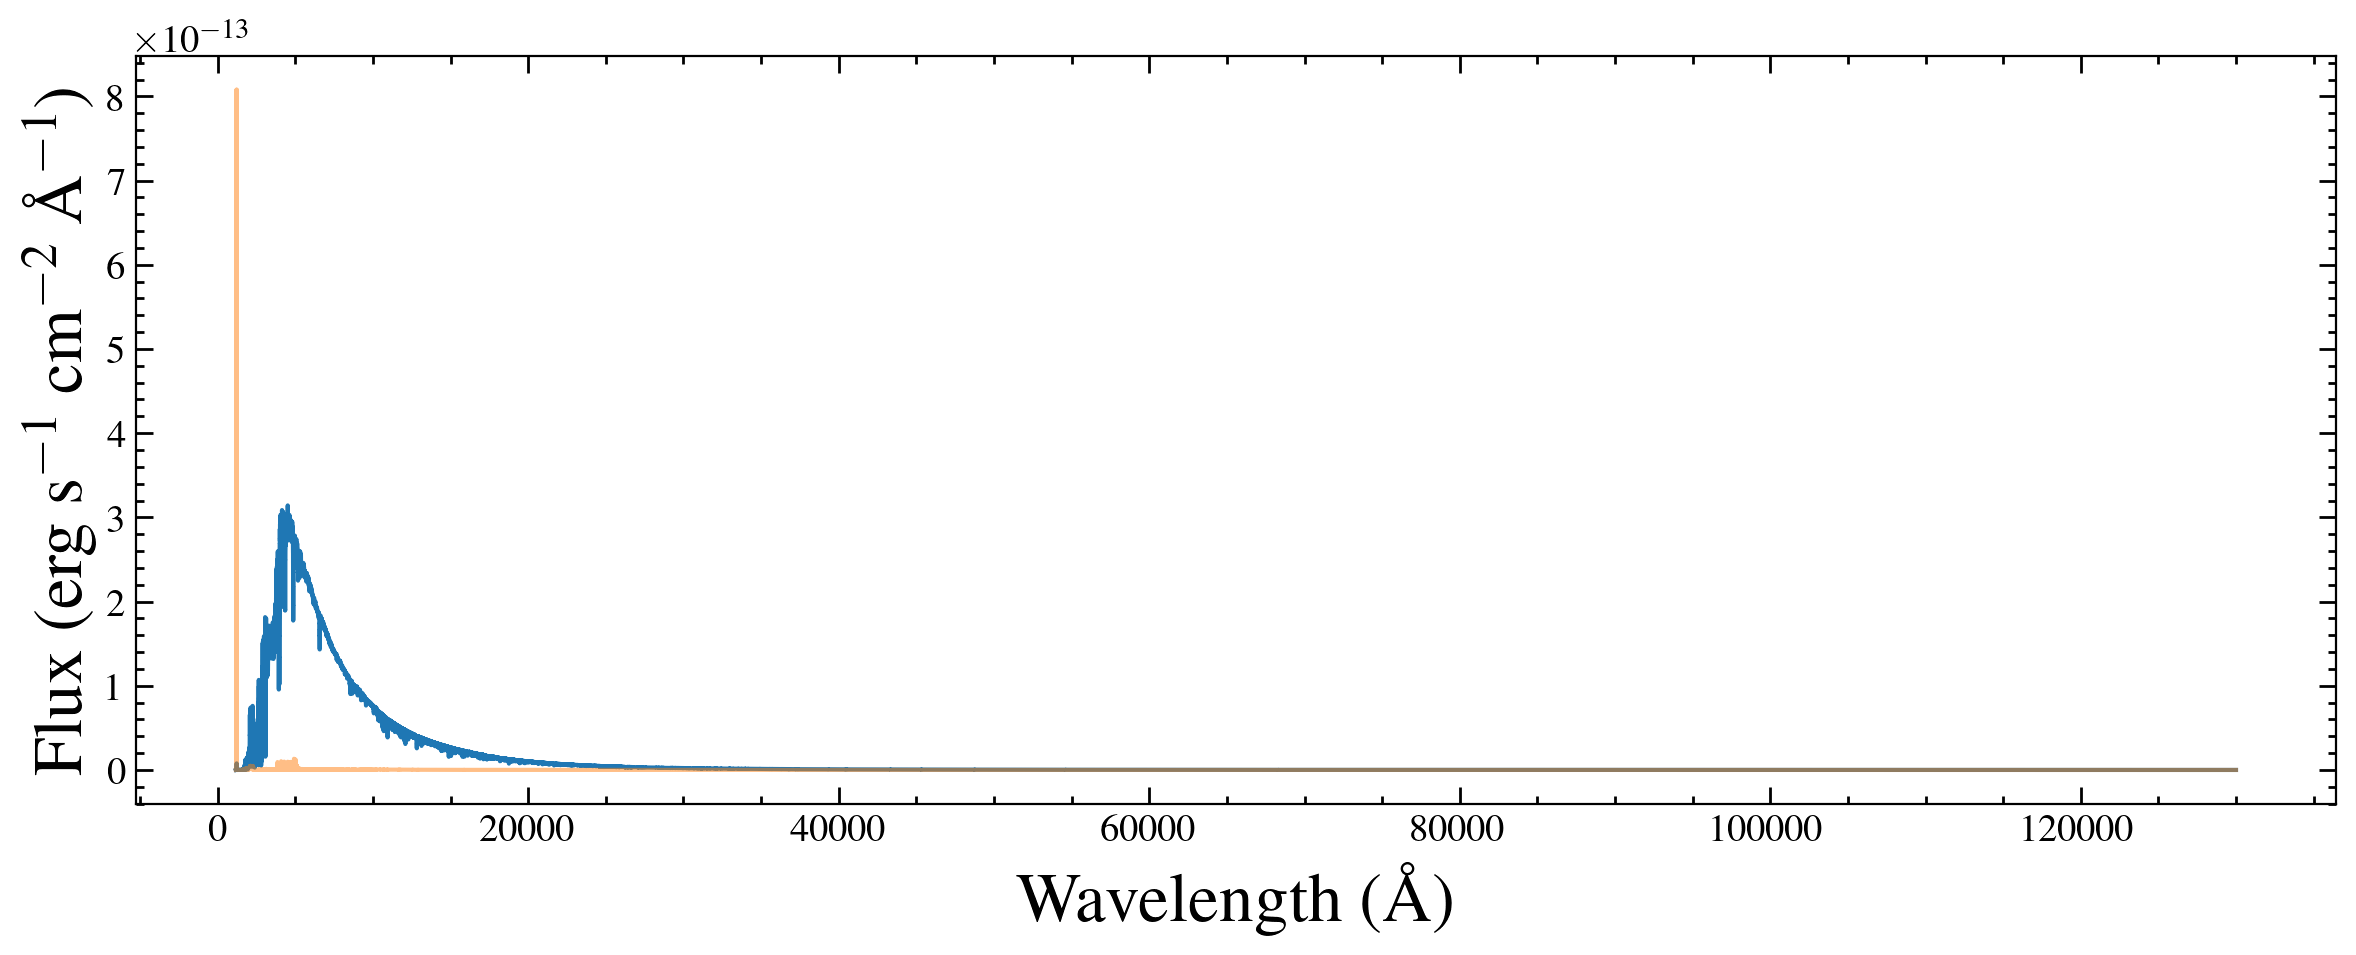

draft_hlsp/wasp-121/hlsp_muscles_model_lya_wasp-121_na_v1_component-spec.fits


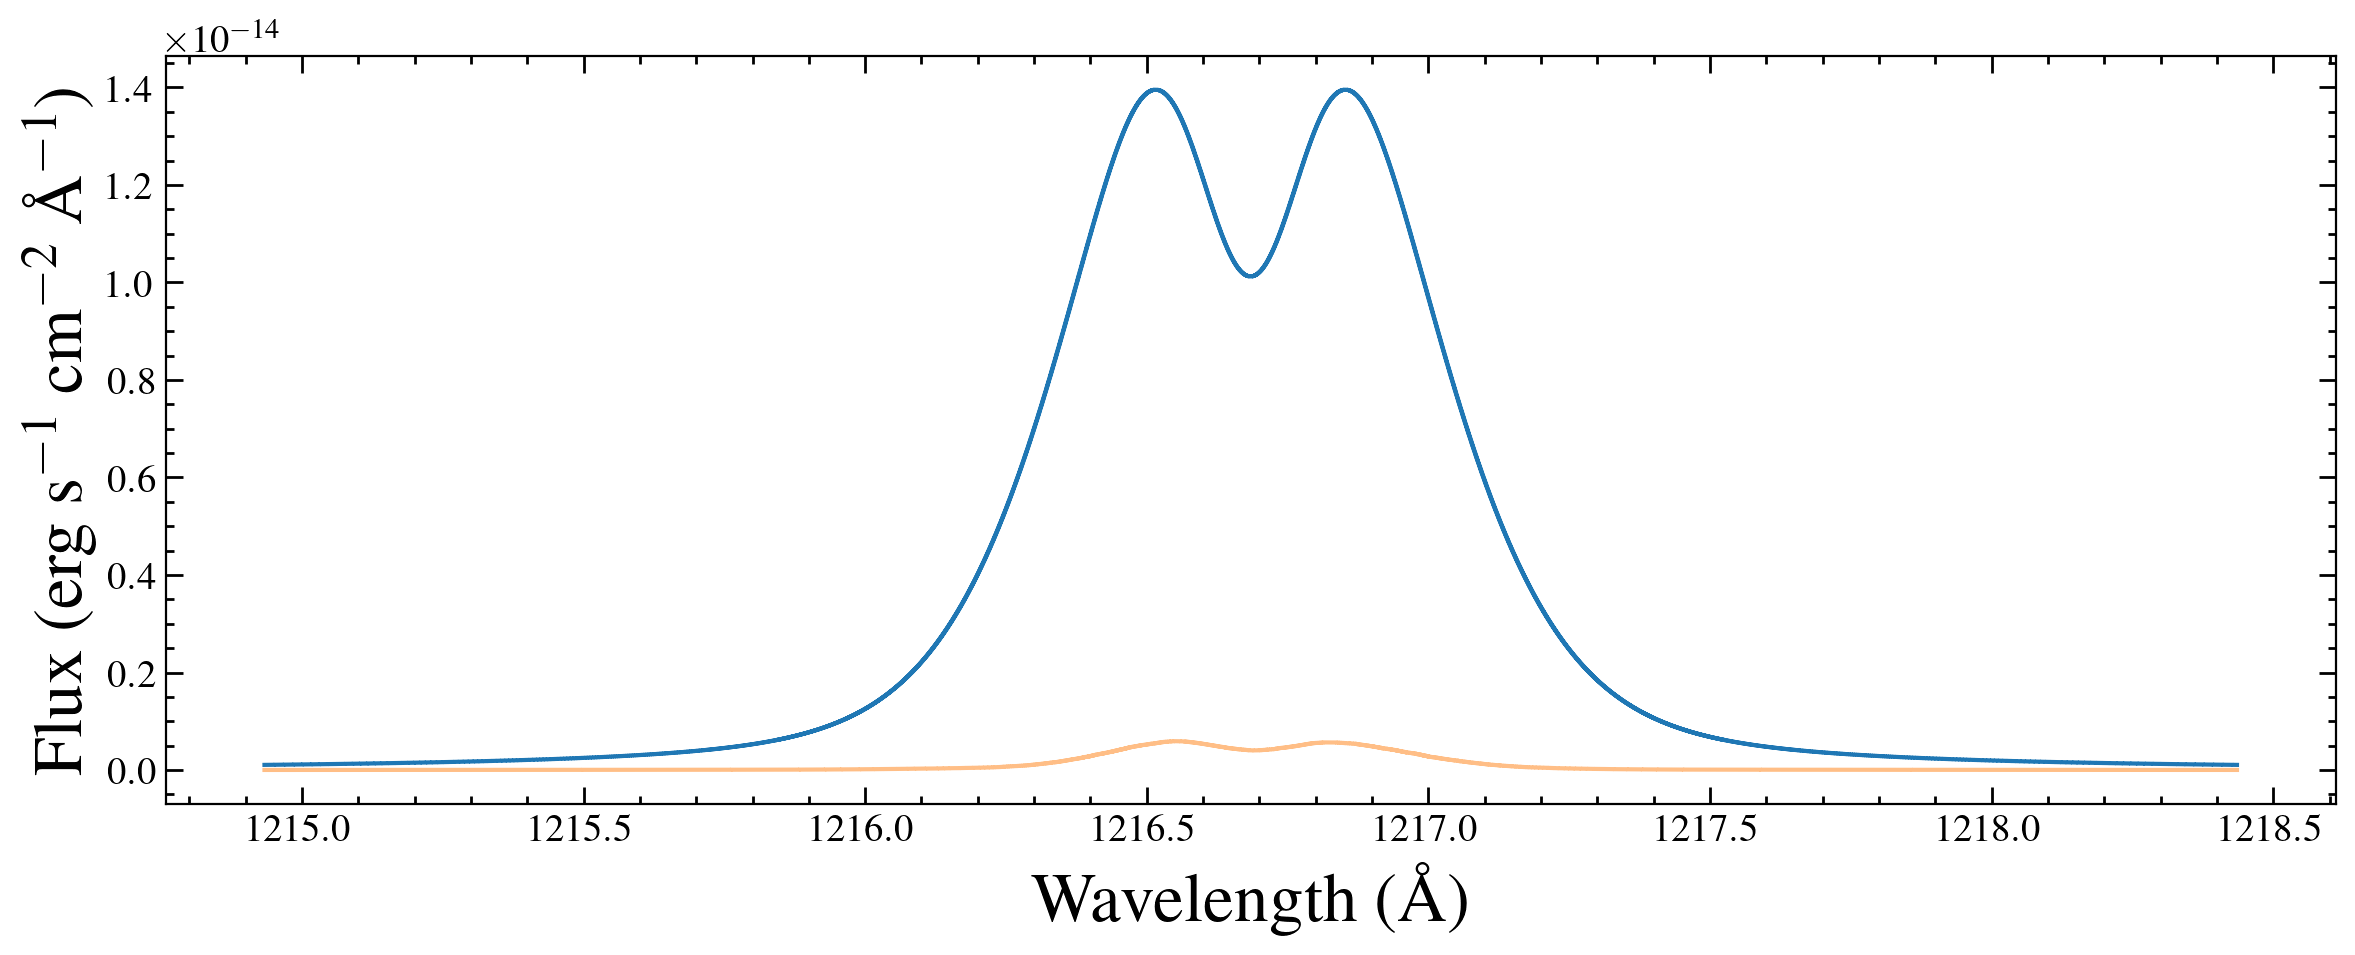

draft_hlsp/wasp-121/hlsp_muscles_model_dem_wasp-121_na_v1_component-spec.fits


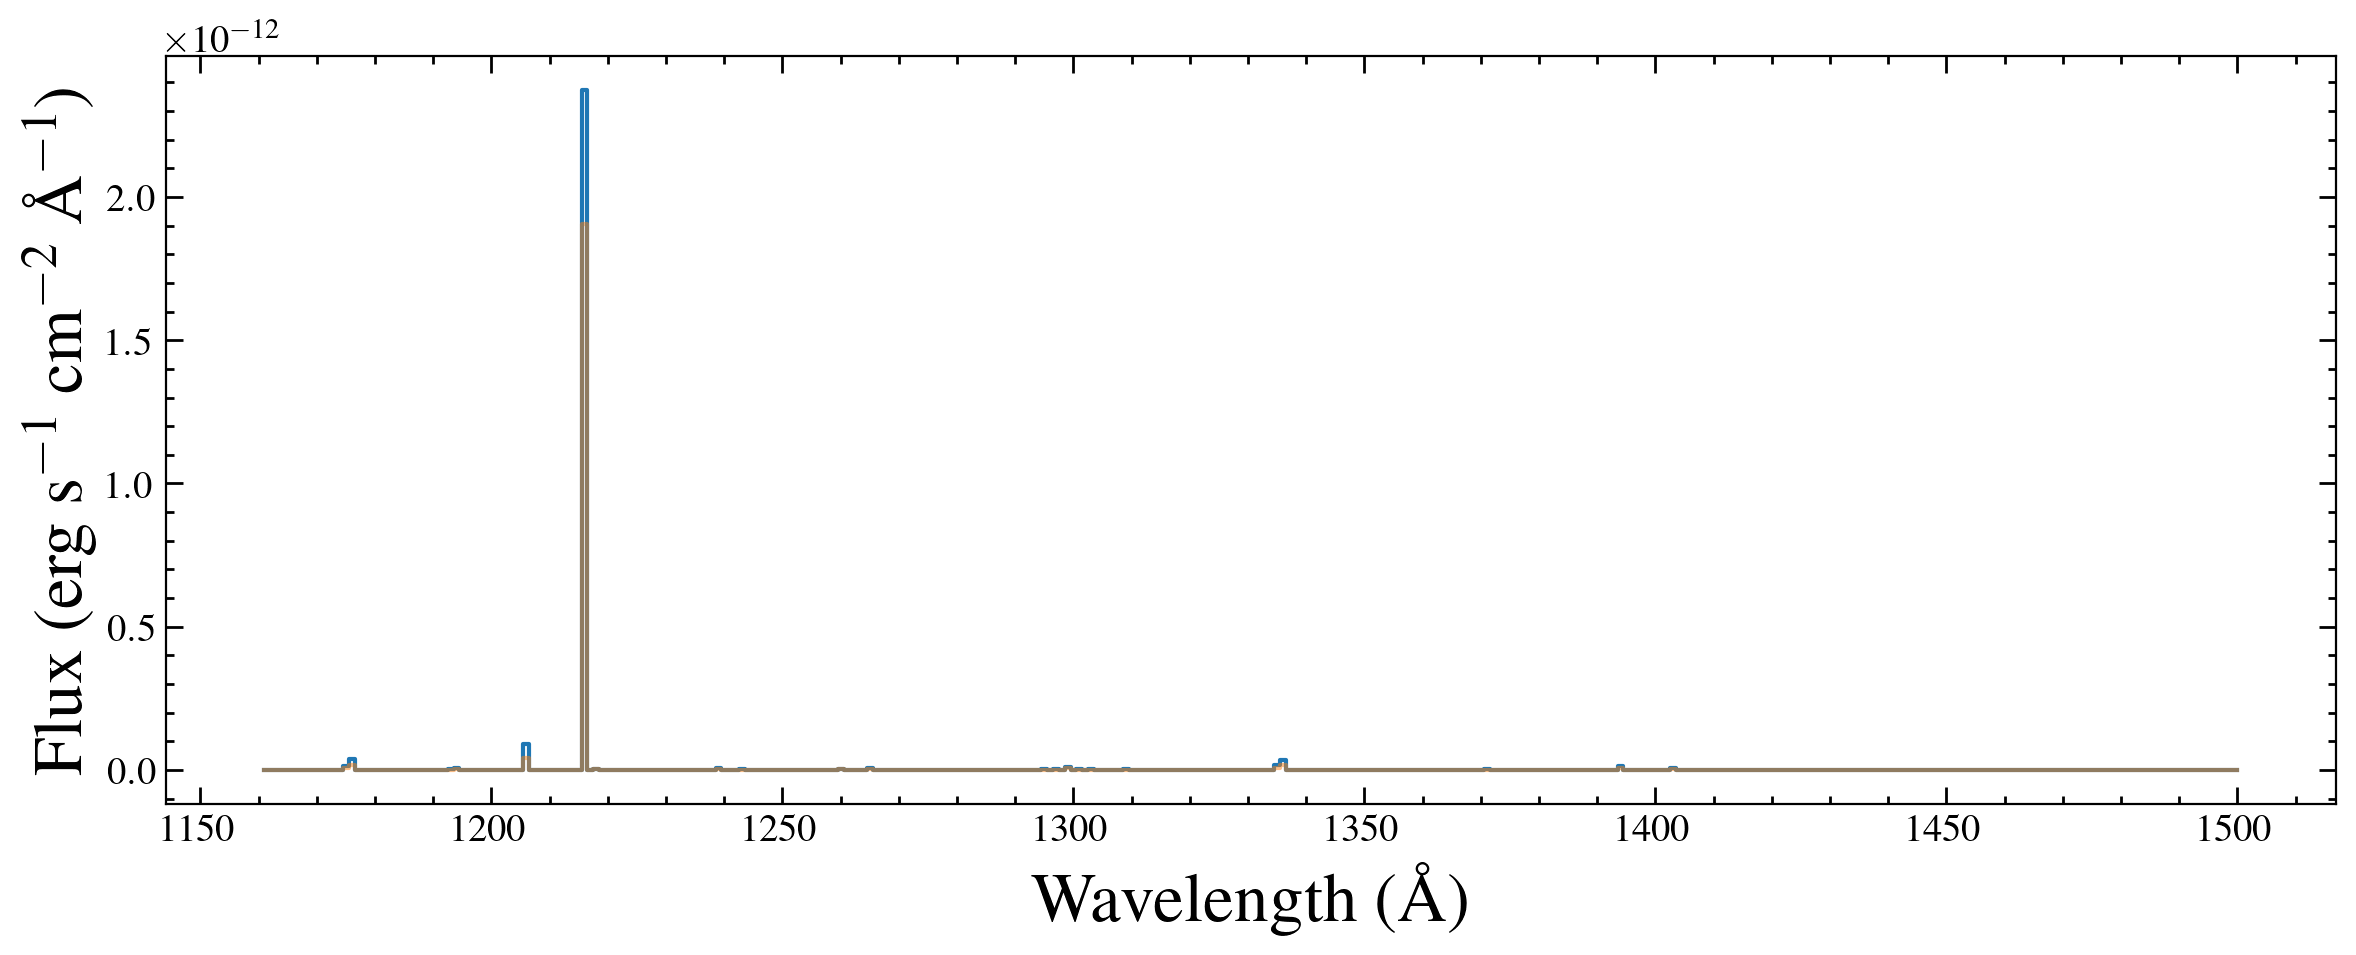

draft_hlsp/wasp-121/hlsp_muscles_multi_multi_wasp-121_broadband_v1_const-res-sed.fits


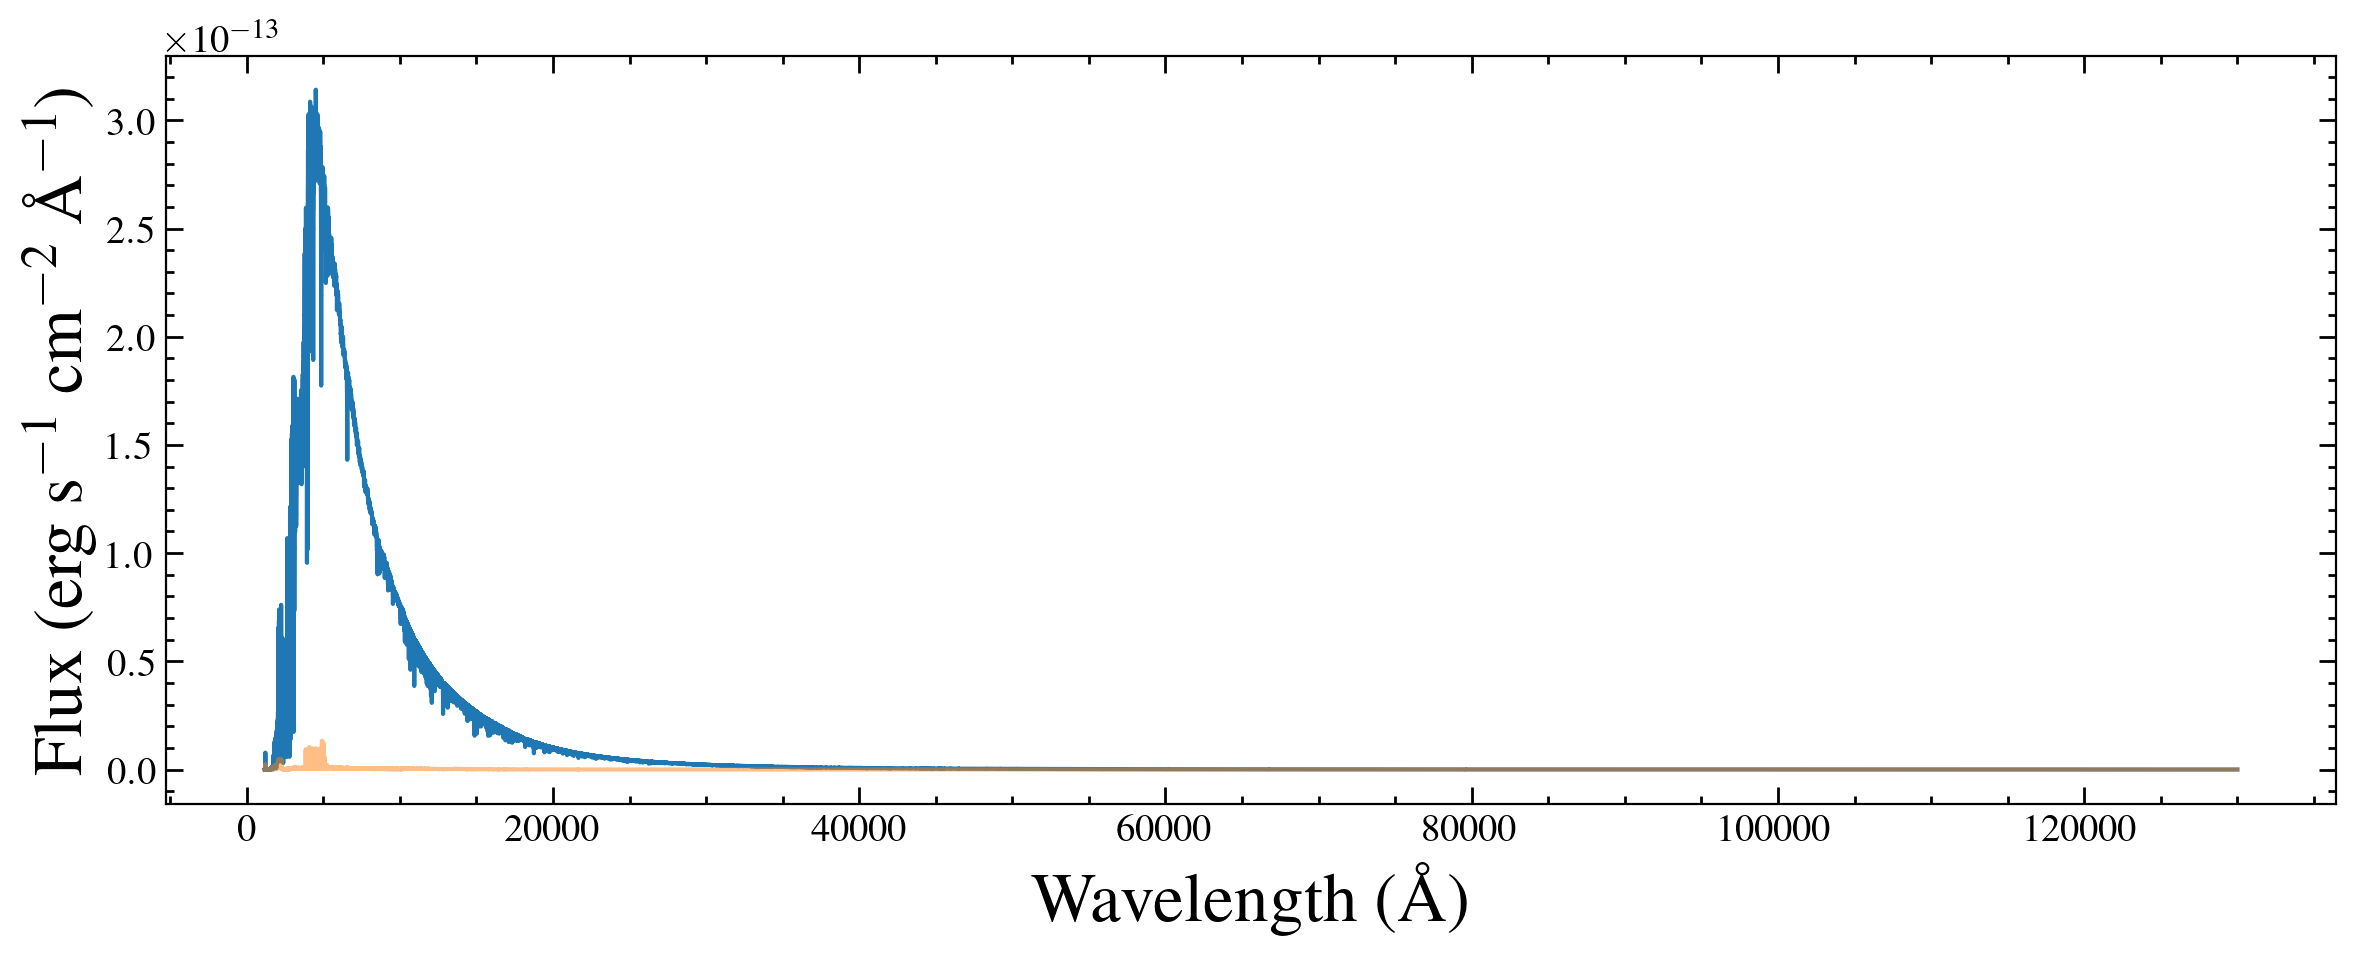

draft_hlsp/wasp-121/hlsp_muscles_multi_multi_wasp-121_broadband_v1_adapt-var-res-sed.fits


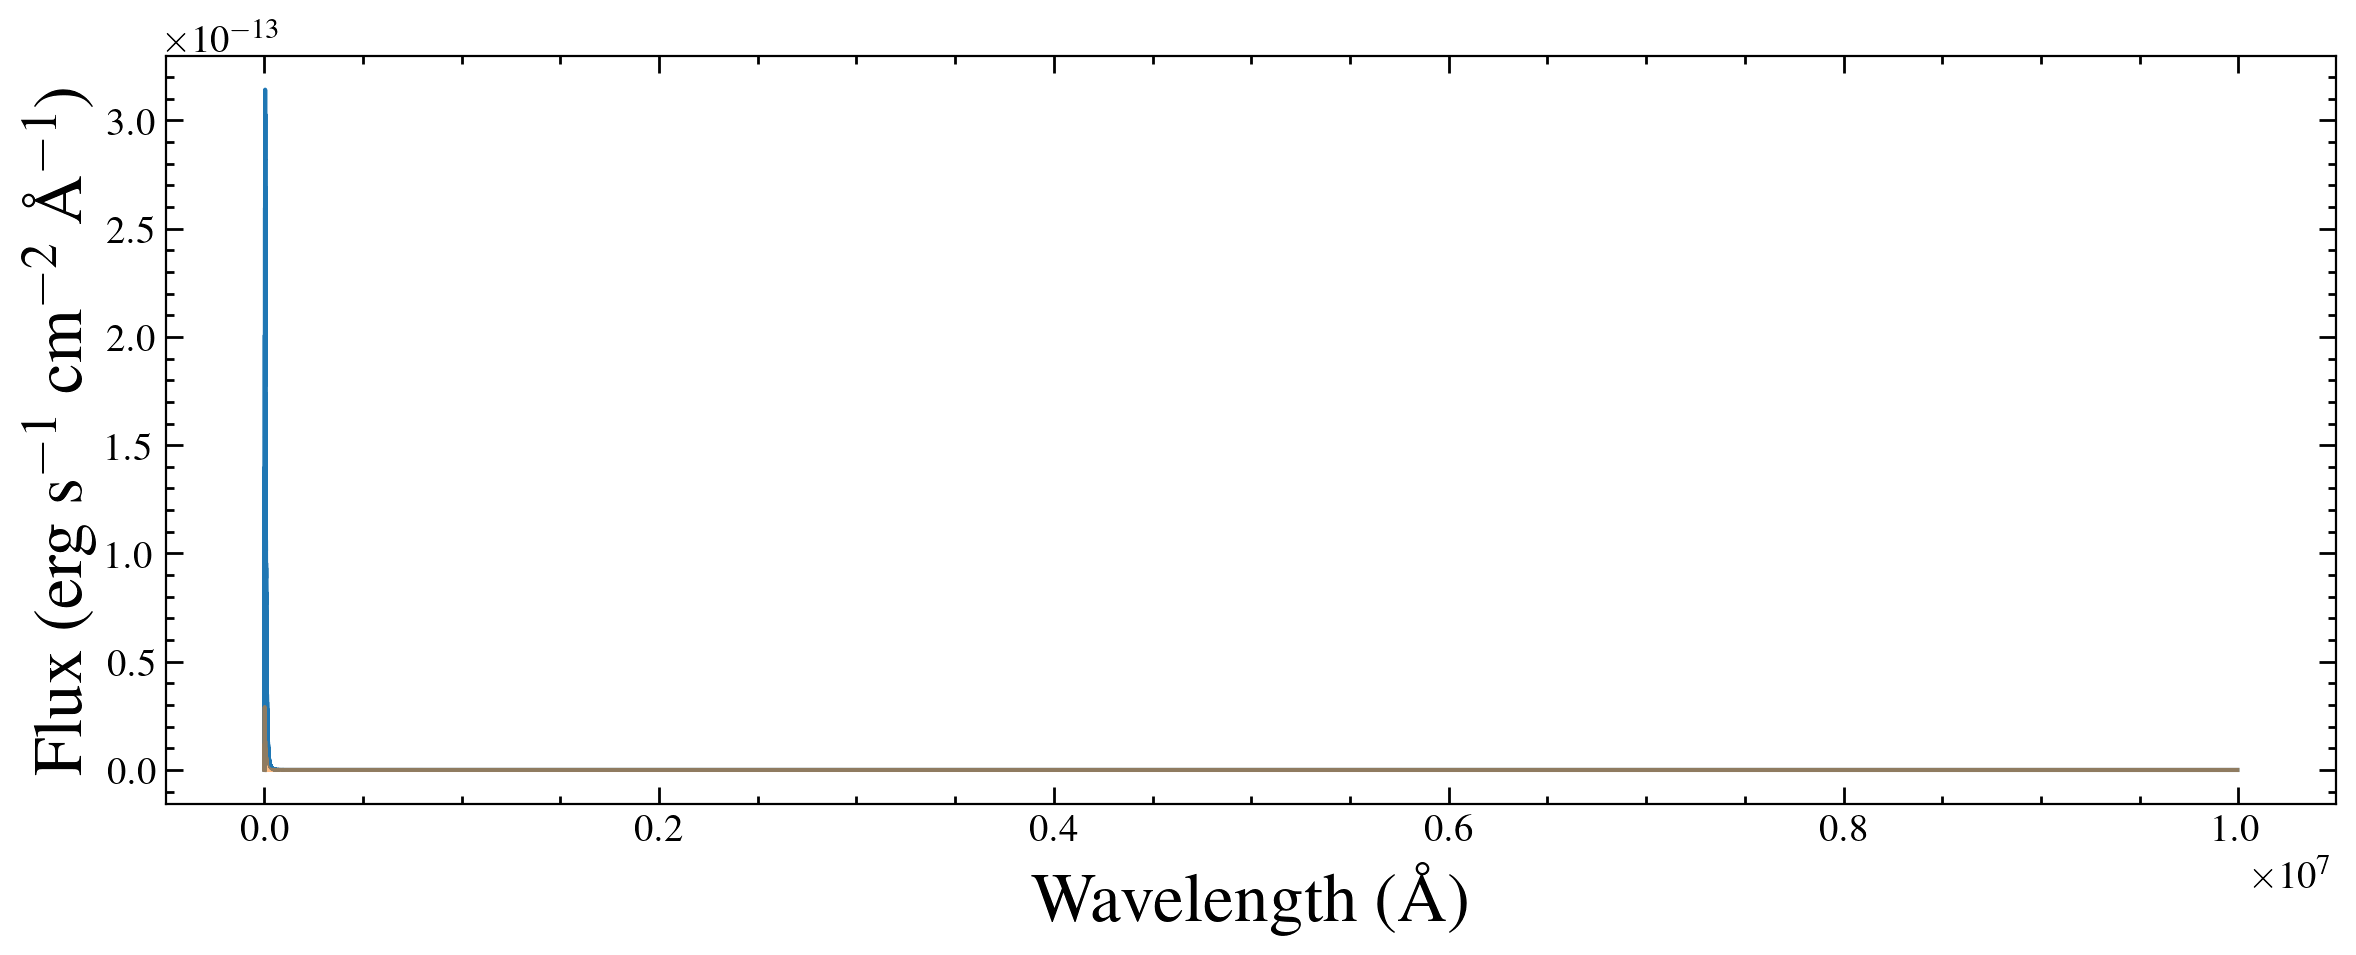

draft_hlsp/wasp-121/hlsp_muscles_xmm_epic_wasp-121_na_v1_component-spec.fits


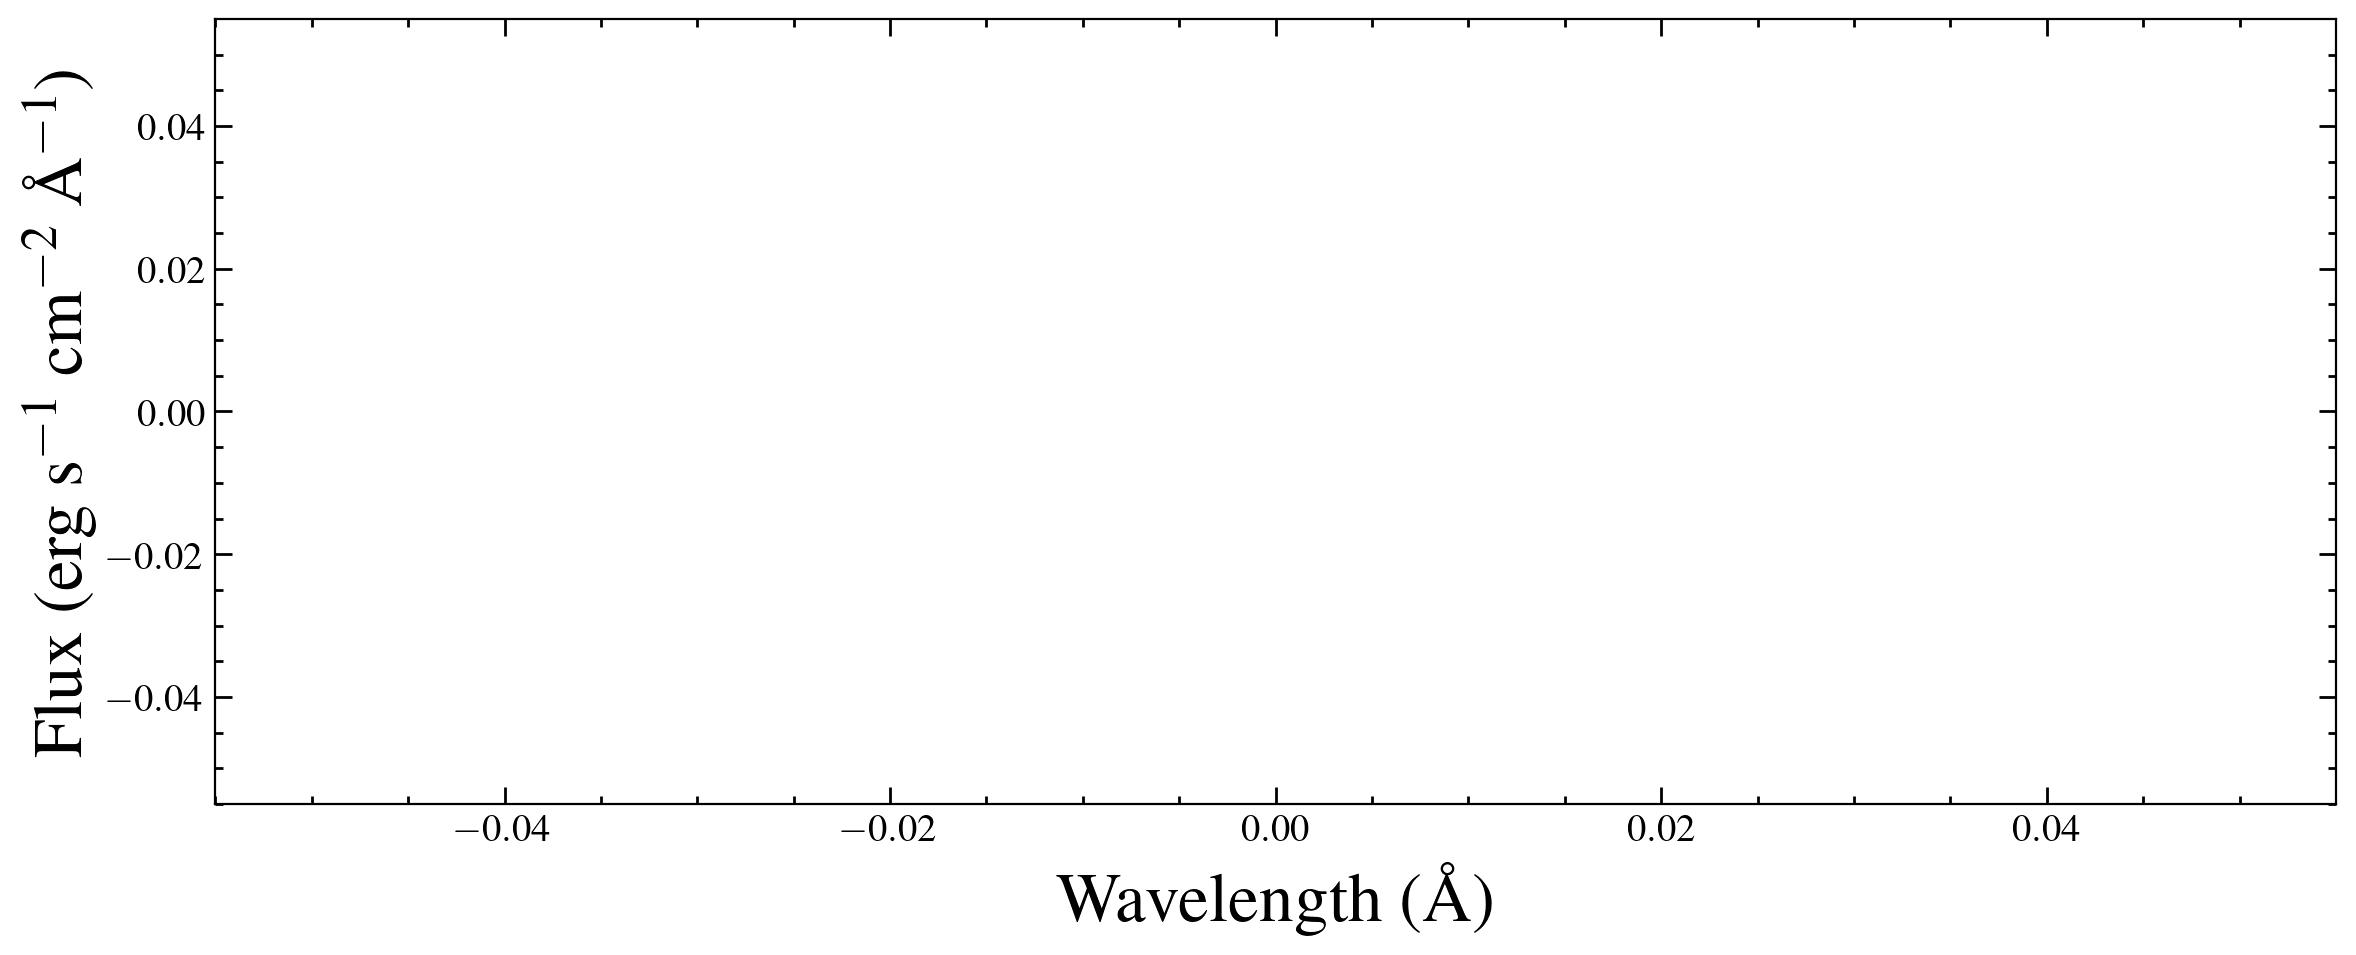

draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_e230m_v1_component-spec.fits


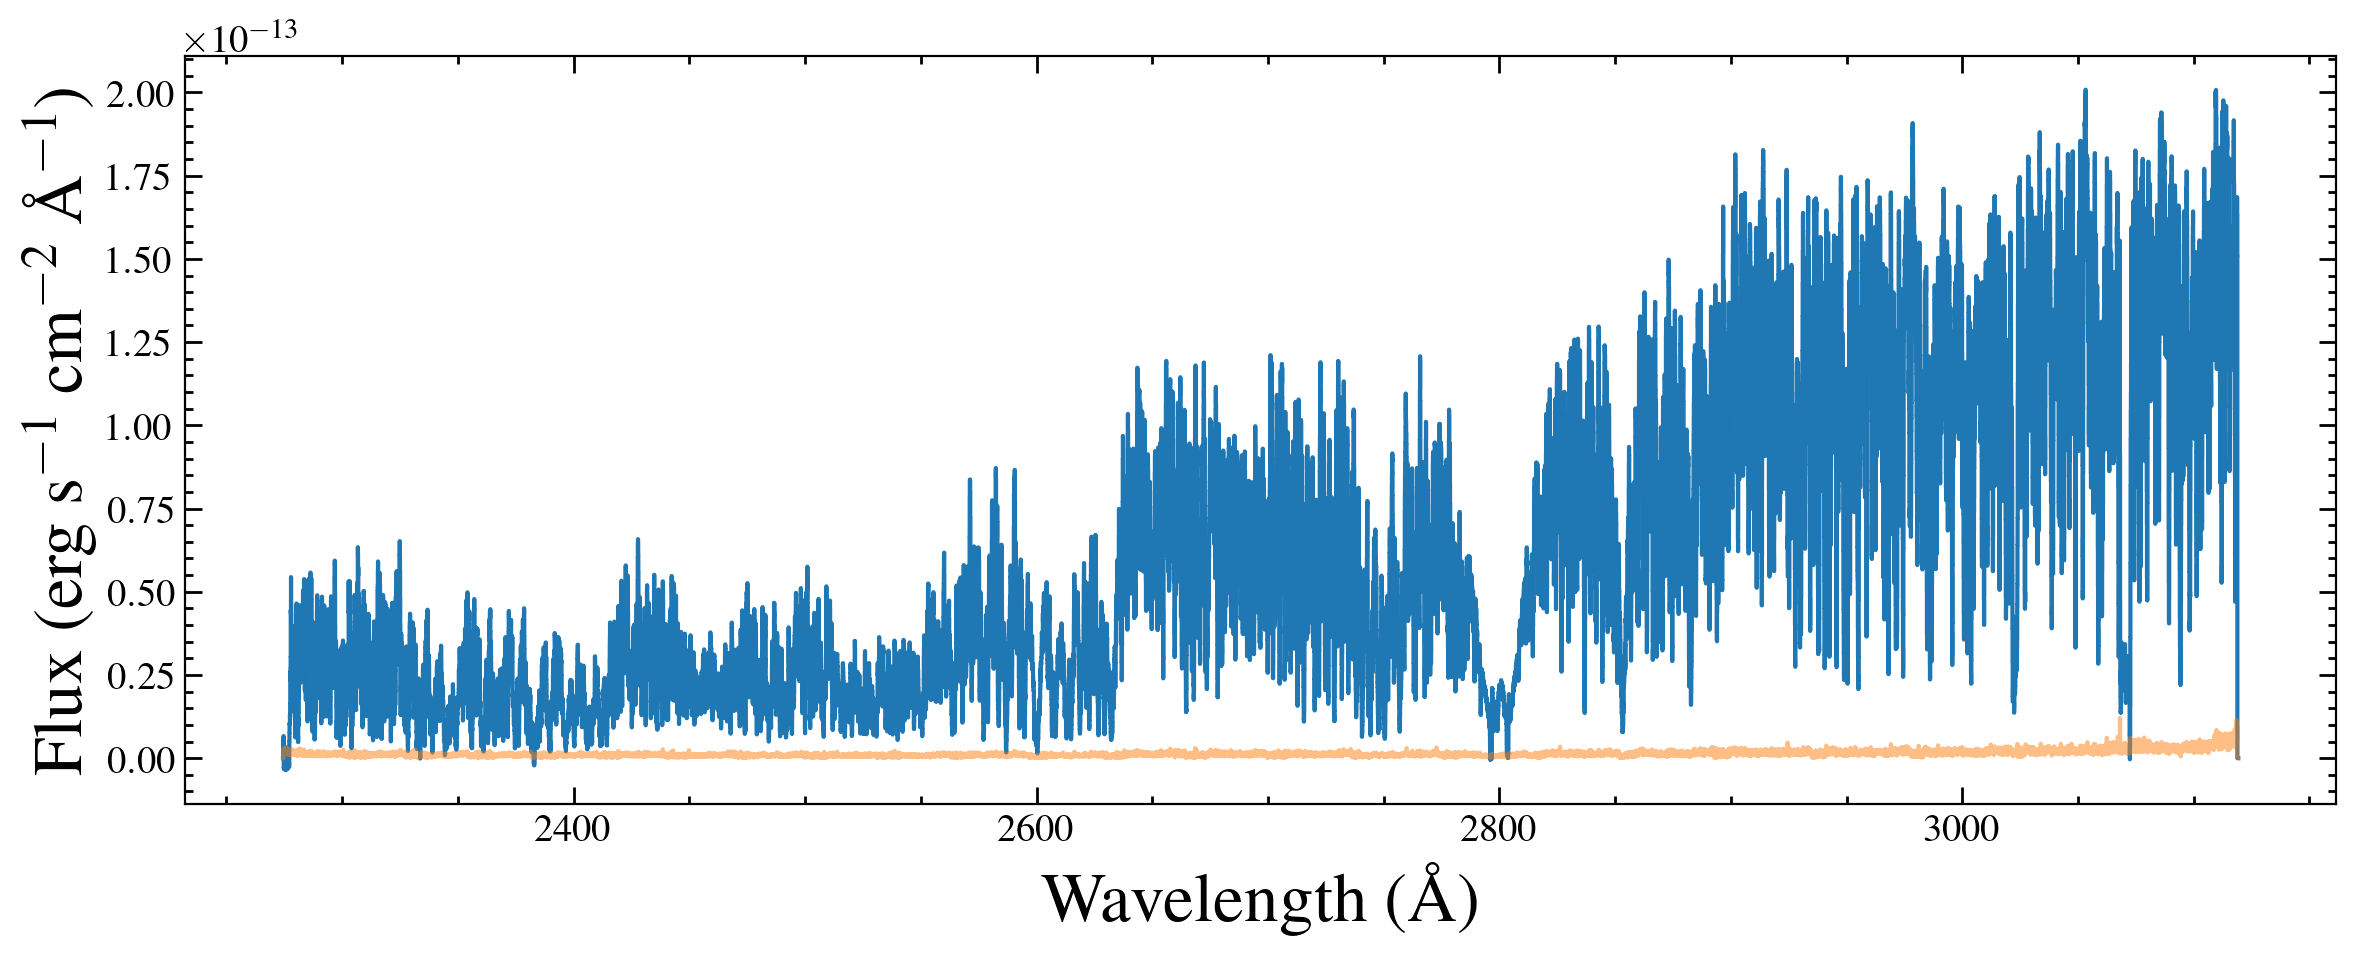

draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g750l_v1_component-spec.fits


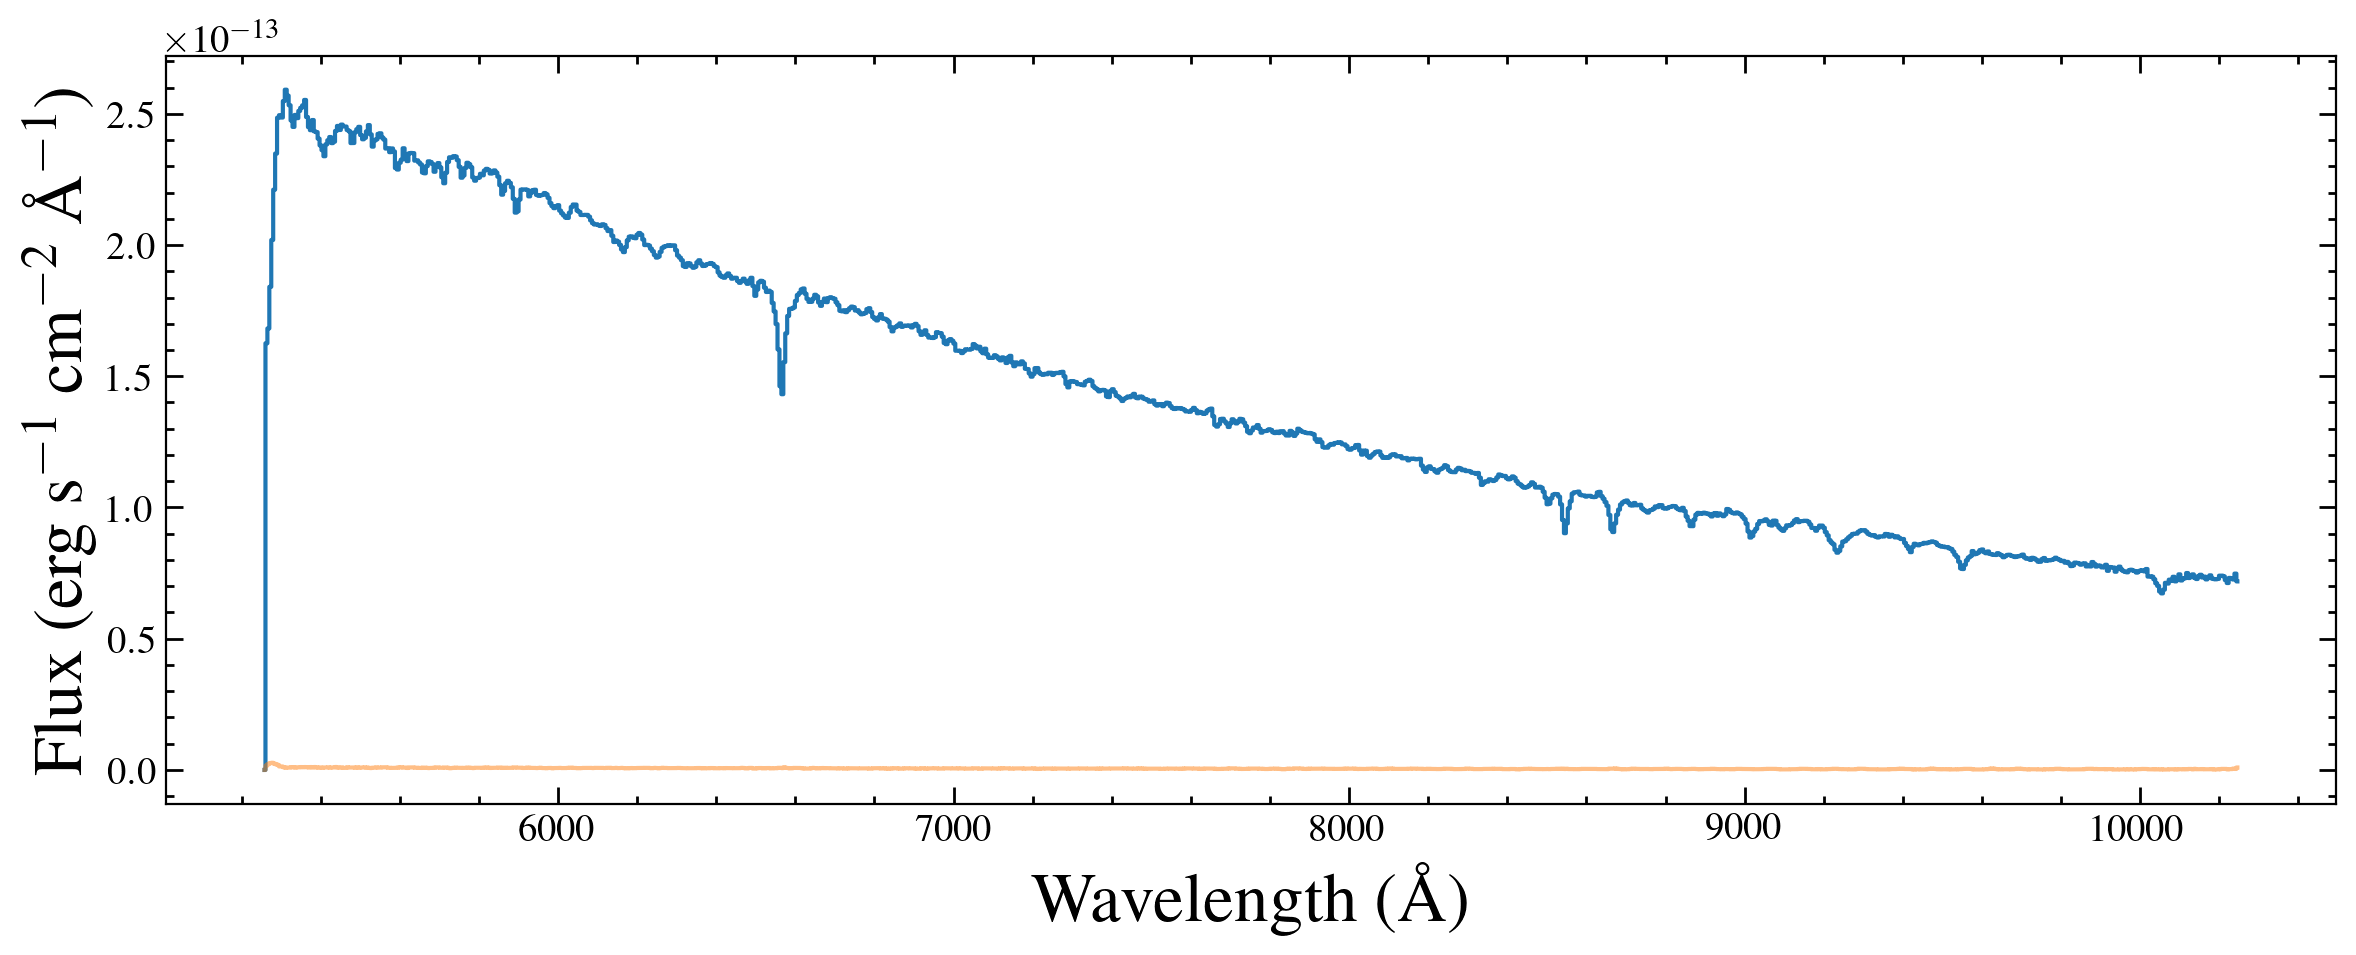

draft_hlsp/wasp-121/hlsp_muscles_model_apec_wasp-121_na_v1_component-spec.fits


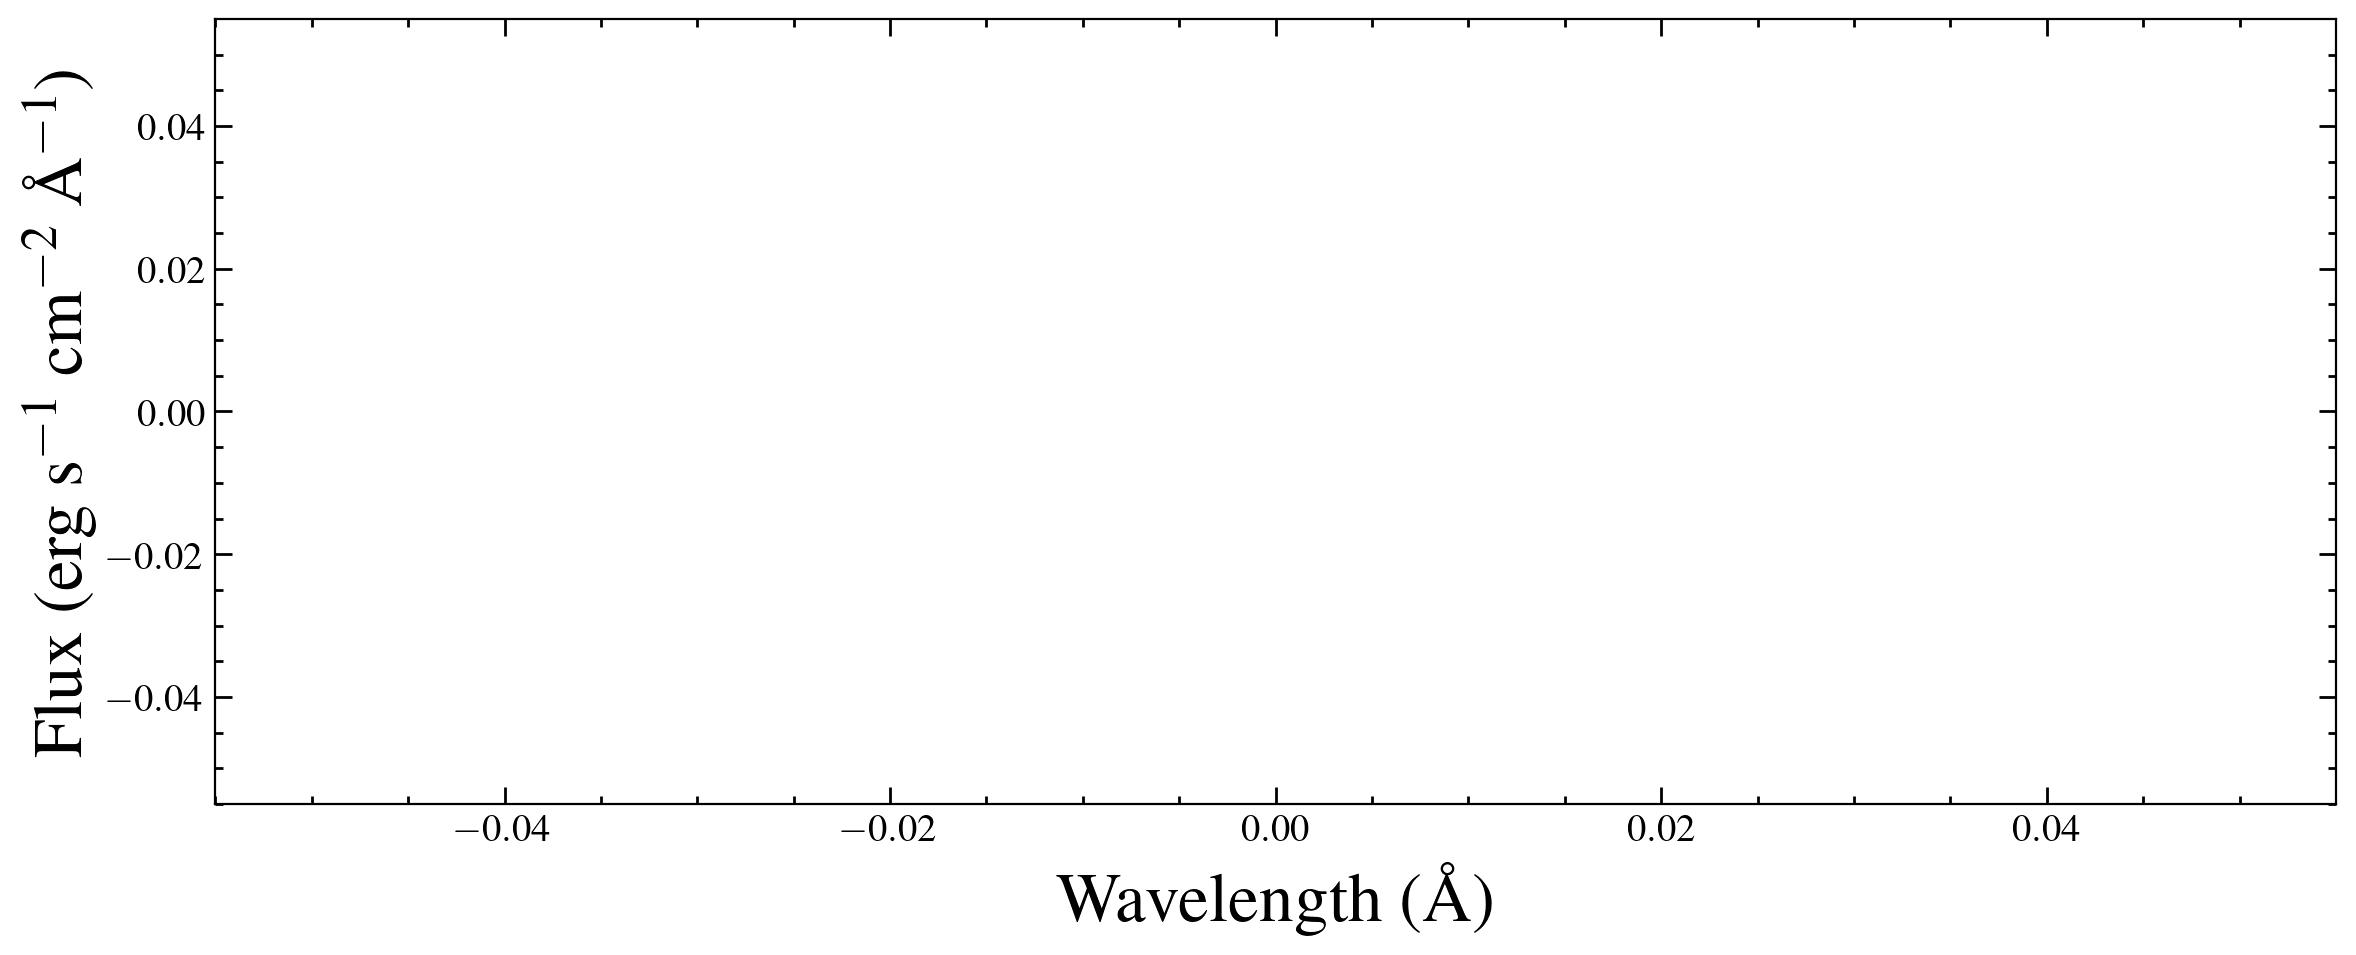

draft_hlsp/wasp-121/hlsp_muscles_model_phx_wasp-121_na_v1_component-spec.fits


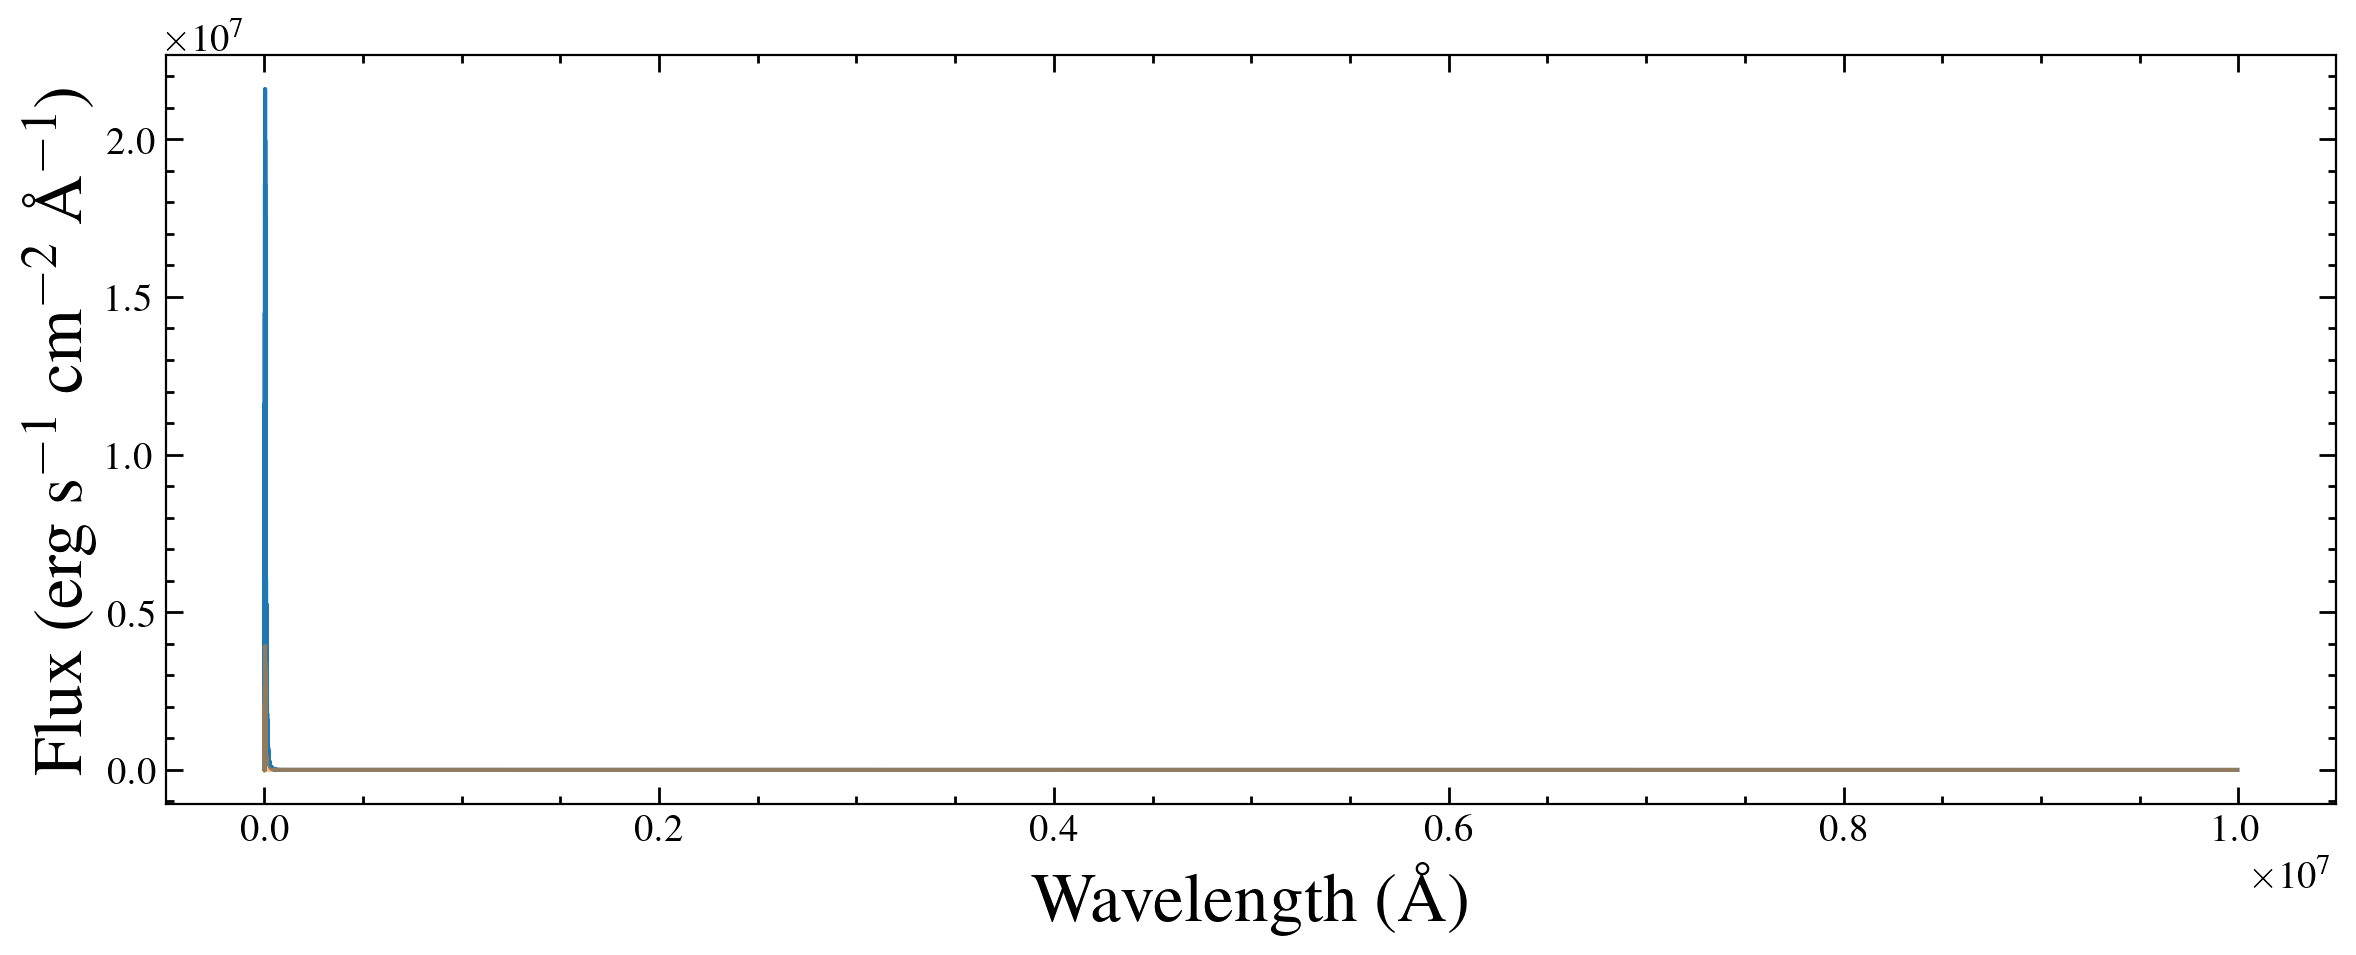

draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits


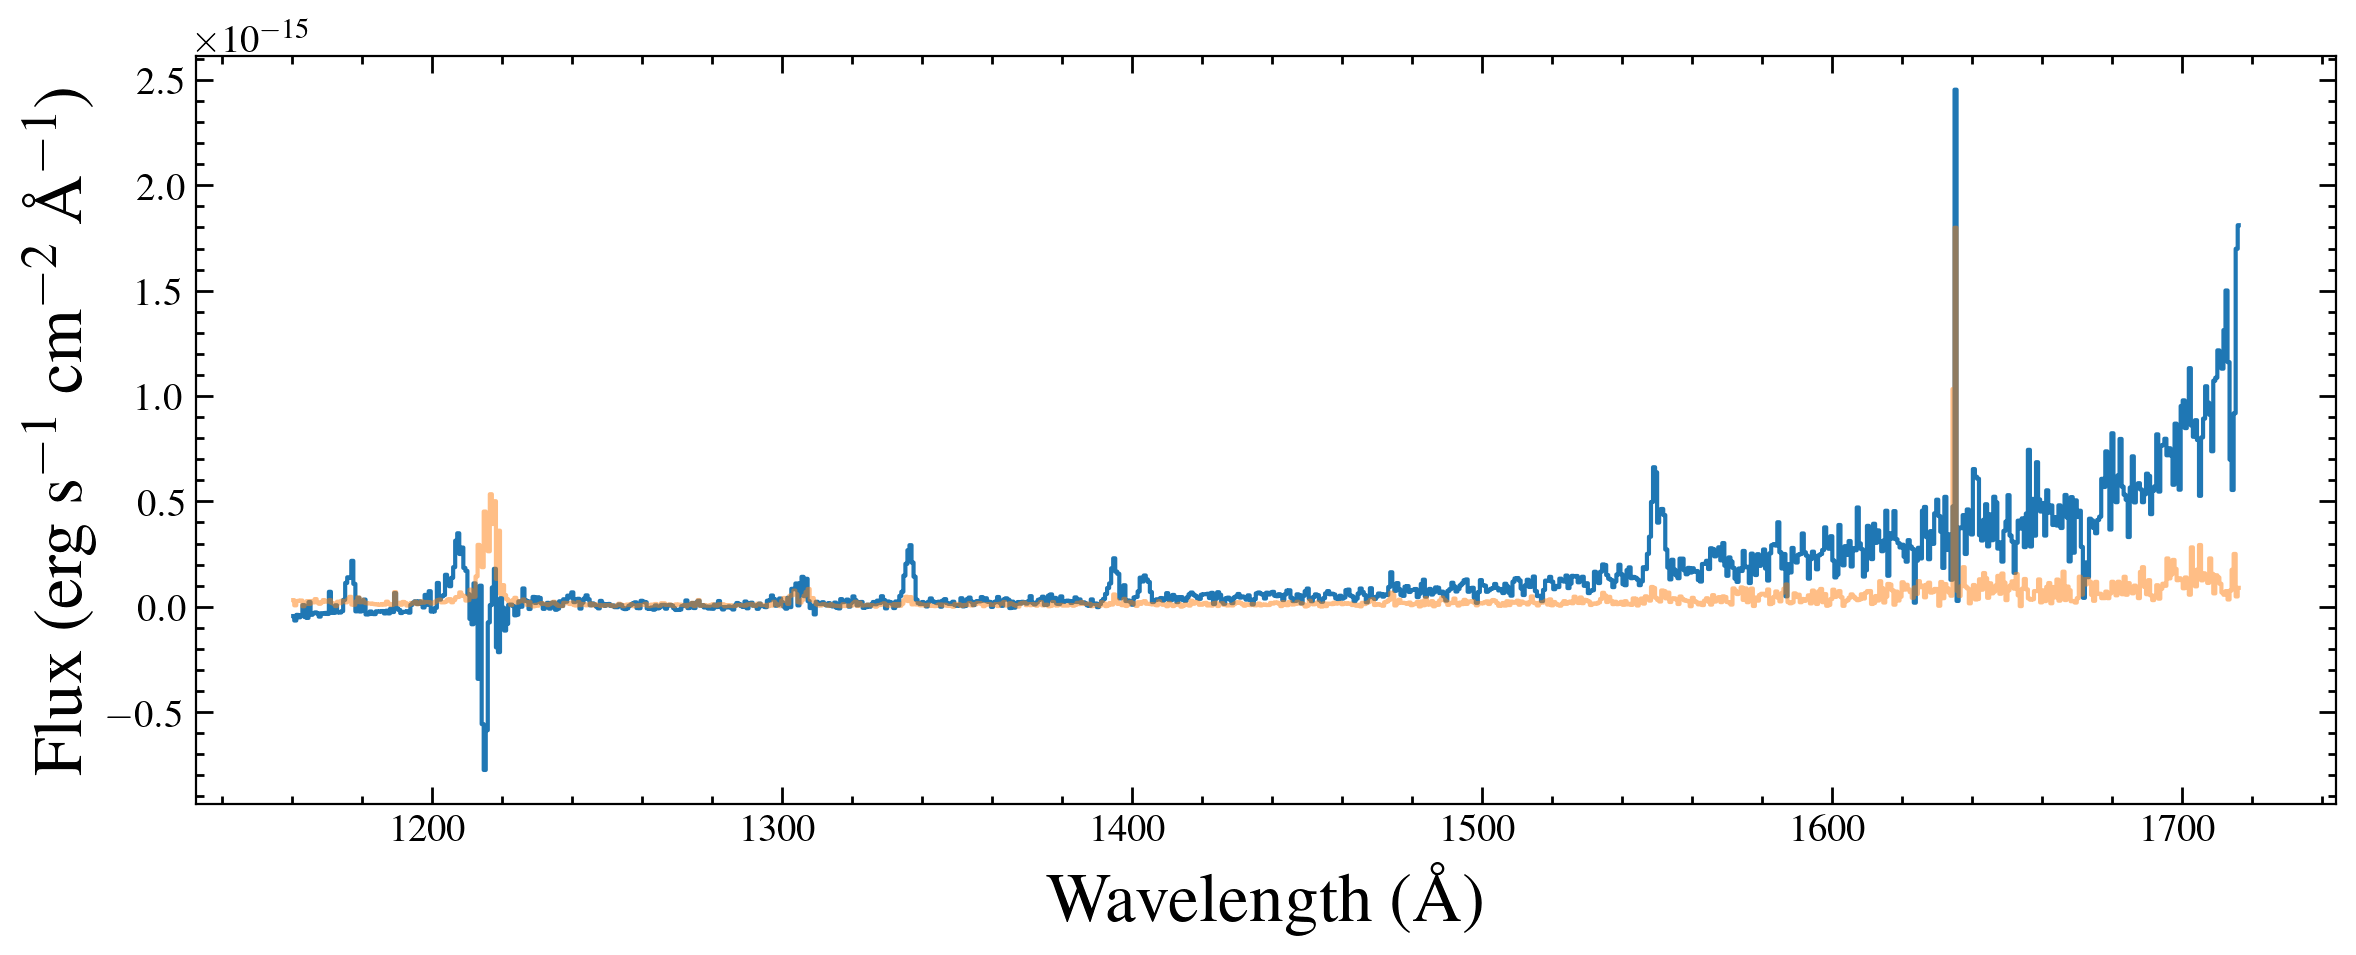

In [9]:
for x in hlsp[1:]:
    print(x)
    fig, ax = plt.subplots(figsize=(12, 5))
    grating = fits.getheader(x, 0)['GRATING'] 
    data = fits.getdata(x, 1)
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
   
    if grating == 'G430L':
        mask = w > 3000
    else:
        mask = w > 1160

    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='C0')
    plt.step(w, e, where='mid', c='C1', alpha=0.5)
    plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=25)
    plt.xlabel('Wavelength (\AA)', size=25)
    plt.tight_layout()
    plt.show()
    

draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g430l_v1_component-spec.fits
24420.0


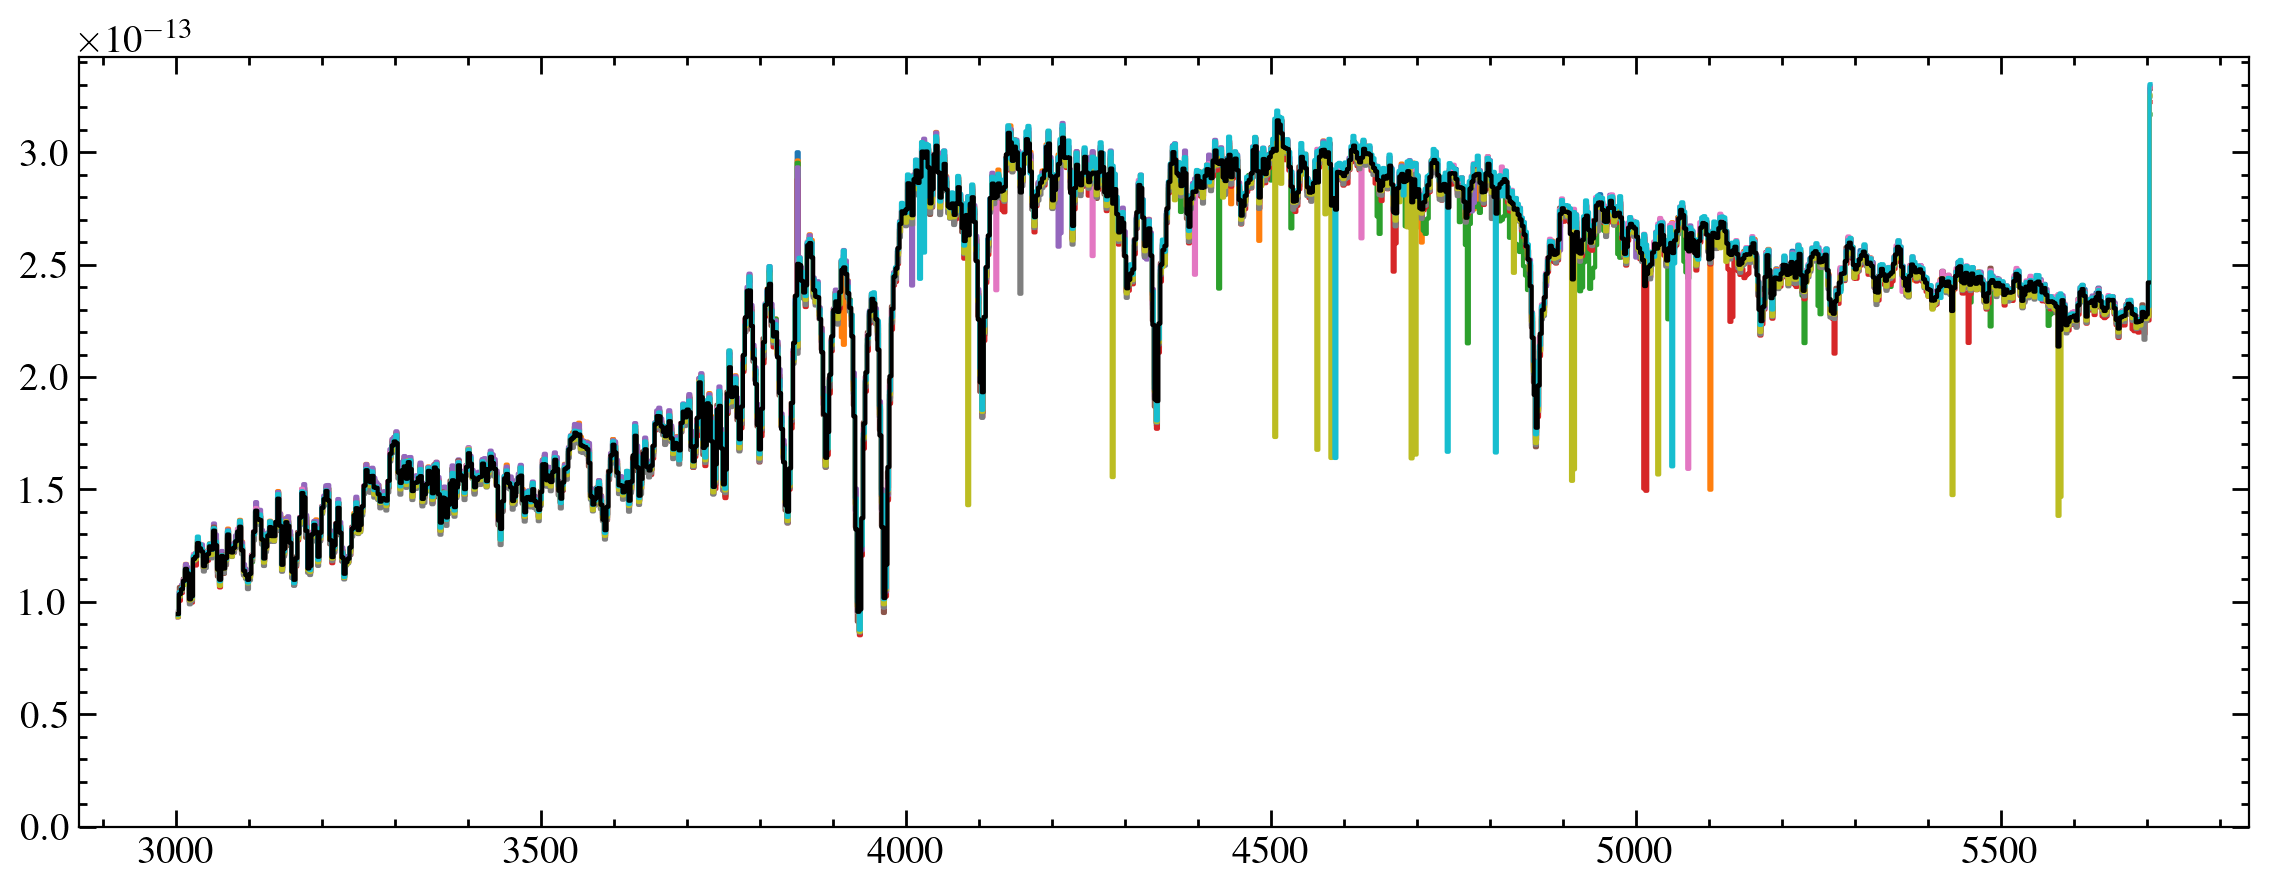

In [10]:
for x in x1ds:
    # print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    if grating in ['G430L']:#, 'G750L']:
        # print(fits.getheader(x, 0)['OPT_ELEM'])
        data = fits.getdata(x, 1)
#         print(fits.getheader(x, 0)['TEXPTIME'])
#         print(fits.getheader(x, 0)['APERTURE'])
        if fits.getheader(x, 0)['TEXPTIME'] > 2000:
            # print(data['A2Center'])
            # w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
            for dt in data:
                w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
                if grating == 'G430L':
                    mask = w > 3000
                else:
                    mask = w > 1160

                w, f, e = w[mask], f[mask], e[mask]
                plt.step(w, f, where='mid')
                # plt.step(w, e, where='mid', c='C1')
            # plt.show()

        # plt.yscale('log')
        # plt.xscale('log')
plt.ylim(0)

for x in hlsp[0:1]:
    print(x)
    # fig, ax = plt.subplots(figsize=(12, 5))
    grating = fits.getheader(x, 0)['GRATING'] 
    data = fits.getdata(x, 1)
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    print(data['EXPTIME'][30])
   
    if grating == 'G430L':
        mask = w > 3000
    else:
        mask = w > 1160

    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='k')
    # plt.step(w, e, where='mid', c='C1', alpha=0.5)
    # plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=25)
    # plt.xlabel('Wavelength (\AA)', size=25)
    # plt.tight_layout()
    plt.show()
    
w_opt, f_opt, e_opt =  w, f, e 

In [11]:
fits.getheader(x, 0)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'HST     '                                                            
INSTRUME= 'STIS    '                                                            
GRATING = 'G430L   '                                                            
APERTURE= '52X2    '                                                            
TARGNAME= 'WASP-121'                                                            
RA_TARG =       107.6002211607                                                  
DEC_TARG=      -39.09724066527                                                  
PROPOSID=                14767                                                  
HLSPNAME= 'MUSCLES Extension

In [12]:
x

'draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g430l_v1_component-spec.fits'

In [13]:
# for x in hlsp[1:]:
#     print(x)
#     fig, ax = plt.subplots(figsize=(12, 5))
#     grating = fits.getheader(x, 0)['GRATING'] 
#     data = fits.getdata(x, 1)
#     w, f, e, dq= data['WAVELENGTH'], data['FLUX'], data['ERROR'],data['DQ']
   
#     if grating == 'G430L':
#         mask = w > 3000
#     else:
#         mask = w > 1160

#     w, f, e, dq = w[mask], f[mask], e[mask], dq[mask]
#     # plt.step(w, f, where='mid', c='C0')
#     # plt.step(w, e, where='mid', c='C1', alpha=0.5)
#     plt.step(w, dq, where='mid')
#     plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=25)
#     plt.xlabel('Wavelength (\AA)', size=25)
#     plt.tight_layout()
#     plt.show()
    

In [14]:
# for x in hlsp[1:]:
#     print(x)
#     fig, ax = plt.subplots(figsize=(12, 5))
#     grating = fits.getheader(x, 0)['GRATING'] 
#     data = fits.getdata(x, 1)
#     w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
   
#     if grating == 'G430L':
#         mask = w > 3000
#     else:
#         mask = w > 1160

#     w, f, e = w[mask], f[mask], e[mask]
#     plt.step(w, f, where='mid', c='C0')
#     plt.step(w, e, where='mid', c='C1', alpha=0.5)
#     plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=25)
#     plt.xlabel('Wavelength (\AA)', size=25)
    
#     plt.xlim(1320, 1370)
#     plt.ylim(0, 0.5e-15)
#     plt.tight_layout()

    
#     plt.show()
    

Need to look at extinction

In [15]:
from dust_extinction.parameter_averages import F99


In [16]:



# ebv = 0.009 #from https://arxiv.org/pdf/1506.02471.pdf, +0.012 -0.007 not too help
# ebv_up = 0.012
# ebv_lo = 0.007
# ext = F99(Rv=3.1)

# fig, ax = plt.subplots(figsize=(12, 5))
# #
# data = fits.getdata(hlsp[1], 1)
# w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
# mask = (w > 1160) & (w <1212) | (w > 1220) & (w < 1635) | (w > 1640)
# w, f, e = w[mask], f[mask], e[mask]

# # plt.plot(w, f)
# red = ext.extinguish(w*u.AA, Ebv=ebv)
# red_up = ext.extinguish(w*u.AA, Ebv=ebv+ebv_up)
# red_lo = ext.extinguish(w*u.AA, Ebv=ebv-ebv_lo)

# # plt.plot(w, red)

# ax.plot(w, f, alpha =0.7, label='Uncorrected flux')
# # ax.step(w, f,where='mid', alpha =0.7, label='Uncorrected flux')
# # plt.plot(w, f*red_up, alpha =0.7)
# # plt.plot(w, f*red_lo, alpha =0.7)
# ax.fill_between(w, f/red_up,f/red_lo, color='C1', alpha=0.7, label = r'With E(B-V) = {}$^{{+{}}}_{{-{}}}$'.format(ebv, ebv_up, ebv_lo))

# ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
# ax.set_xlabel('Wavelength (\AA)')
# ax.legend()
# ax.set_xlim(1150, 1730)
# fig.tight_layout()
# # plt.yscale('log')

# # plt.show()
# # plt.plot(w, f/(f/red))


In [17]:
# w_all = np.arange(1000, 10000)*u.AA
# red = ext.extinguish(w_all, Ebv=ebv) 

# plt.plot(w_all, red)

Ok so we can probably ignore the reddening? Phoenix model next. DEM and X-ray are in hand, need to add x-ray error calculation to prepare-xmm if I can.

In [18]:
import importlib
import prepare_phoenix_svo as pp
importlib.reload(pp)

<module 'prepare_phoenix_svo' from '/home/david/work/meats/SEDs/prepare_phoenix_svo.py'>

In [19]:
G = const.G
M = const.M_sun.to(u.kg)
R = const.R_sun.to(u.m)
mass = 1.353

teff = 6459
teff_e = 140
radius = 1.458
distance = 272.01
save_path = 'models/'
star = 'wasp-121'
# g = ((G*mass*M)/(radius*R)**2).to(u.cm/u.s**2)
g = 4.242
# print(np.log10(g.value))
repo = '/media/david/2tb_ext_hd/hddata/mega_muscles/data-vacuum/'

star_params = {'Teff': teff, 'logg': g, 'FeH': 0.00, 'aM': 0, 'Radius':radius*u.R_sun, 'Distance':distance*u.pc, 'Teff_e':teff_e}
# pw, pf, pe = pp.make_phoenix_spectrum(star, save_path, repo, star_params, save_ecsv=True, plot=True, make_error=True)
normfac = ((radius*R)/(distance*u.pc.to(u.m)))**2

In [20]:
pdata = Table.read('models/wasp-121_phoenix_interpolated.ecsv')
pw, pf, pe = pdata['WAVELENGTH'], pdata['FLUX'], pdata['ERROR']


/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2010_x1d.fits


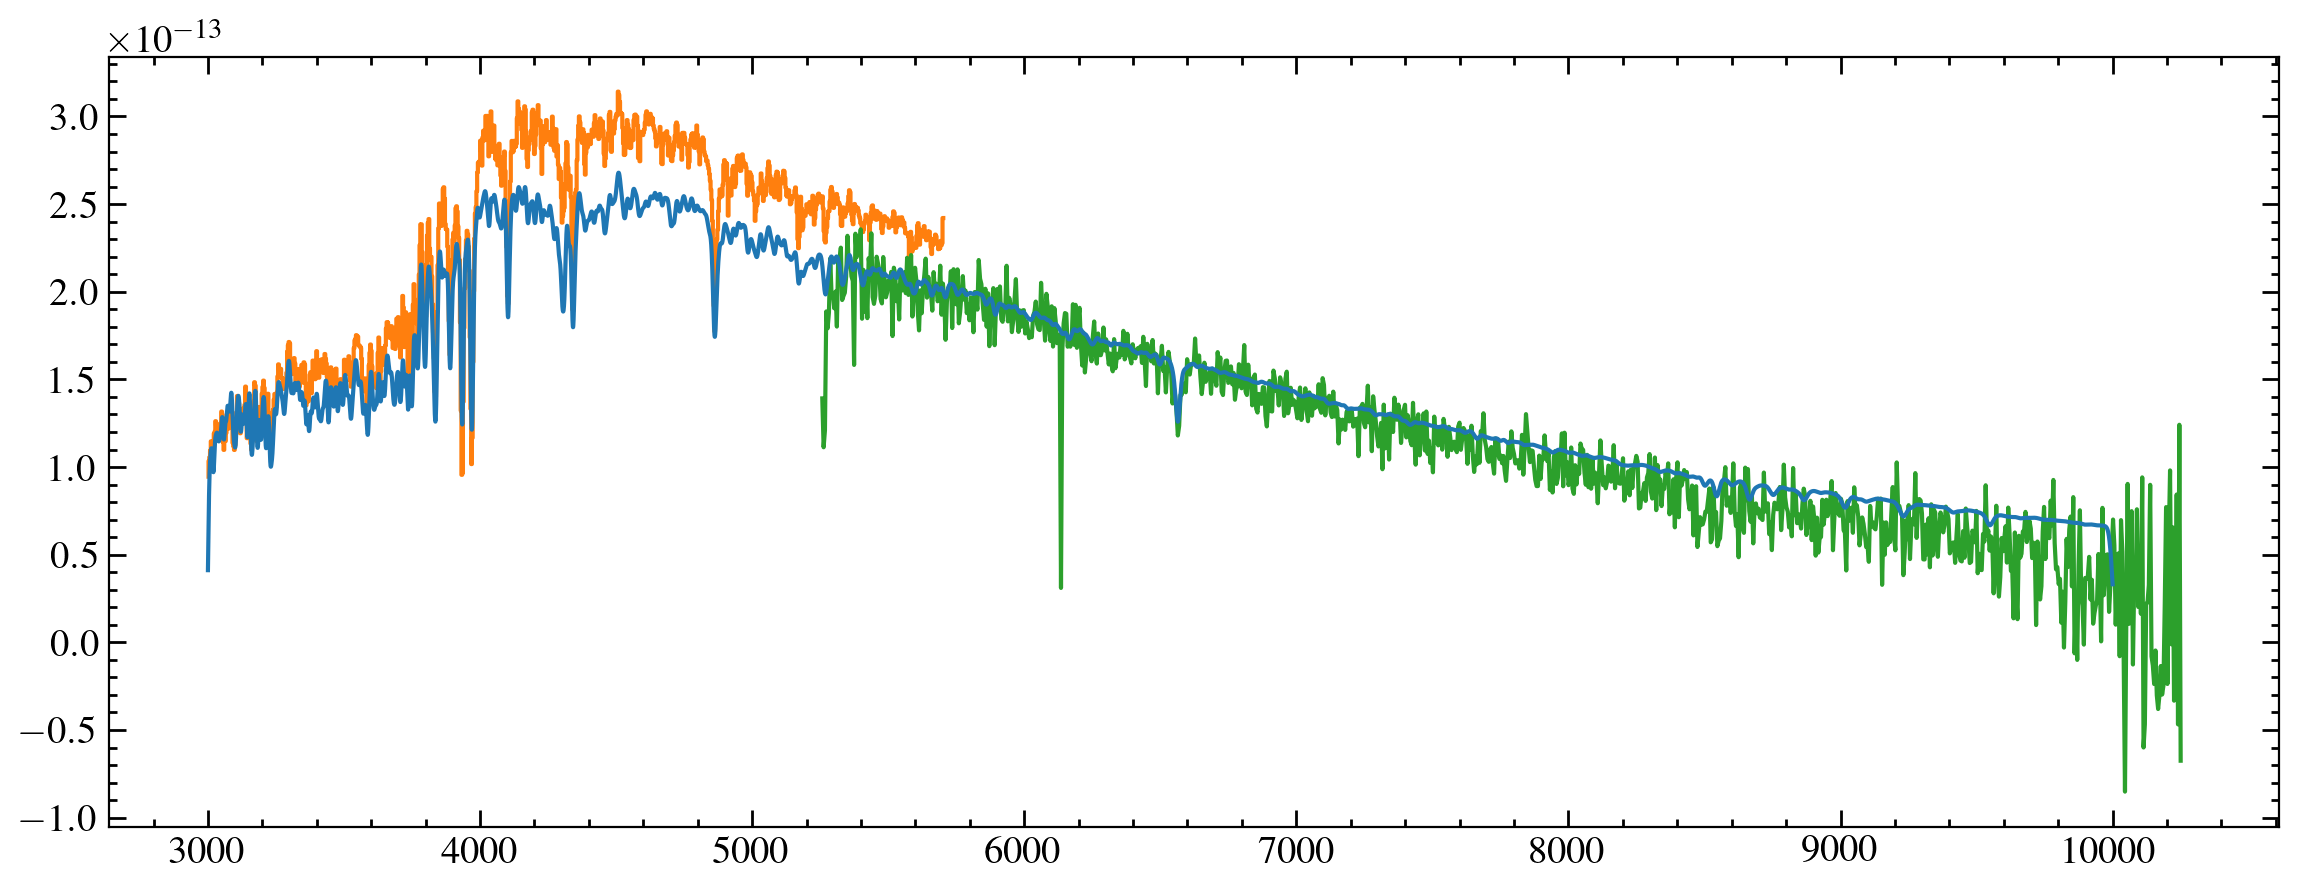

In [21]:

# plt.plot(pw, pf*normfac)
pmask = (pw > 3000) & (pw < 1e4)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = pp.smear(pwi, pfi, 1000)
plt.plot(pwi, pfi)
# plt.yscale('log')
# plt.xscale('log')
# plt.step(w_opt, f_opt, label='G430L')
# plt.step(w_nuv, f_nuv, label='G230L')
# plt.step(w_lya, f_lya, label='G140M')
# plt.step(w, f, where='mid')
plt.step(w_opt, f_opt, label='G430L', zorder=-1)
# plt.ylim(1e-18)

for x in x1ds:
    if fits.getheader(x, 0)['OPT_ELEM'] == 'G750L':
        print(x)
        data = fits.getdata(x, 1)[0]
        plt.plot(data['WAVELENGTH'], data['FLUX'], zorder=-1)
        break
    

/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2010_x1d.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2030_x1d.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2050_x1d.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2070_x1d.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2090_x1d.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2020_sx1.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2040_sx1.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2060_sx1.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2080_sx1.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma20a0_sx1.fits


(0.0, 3e-13)

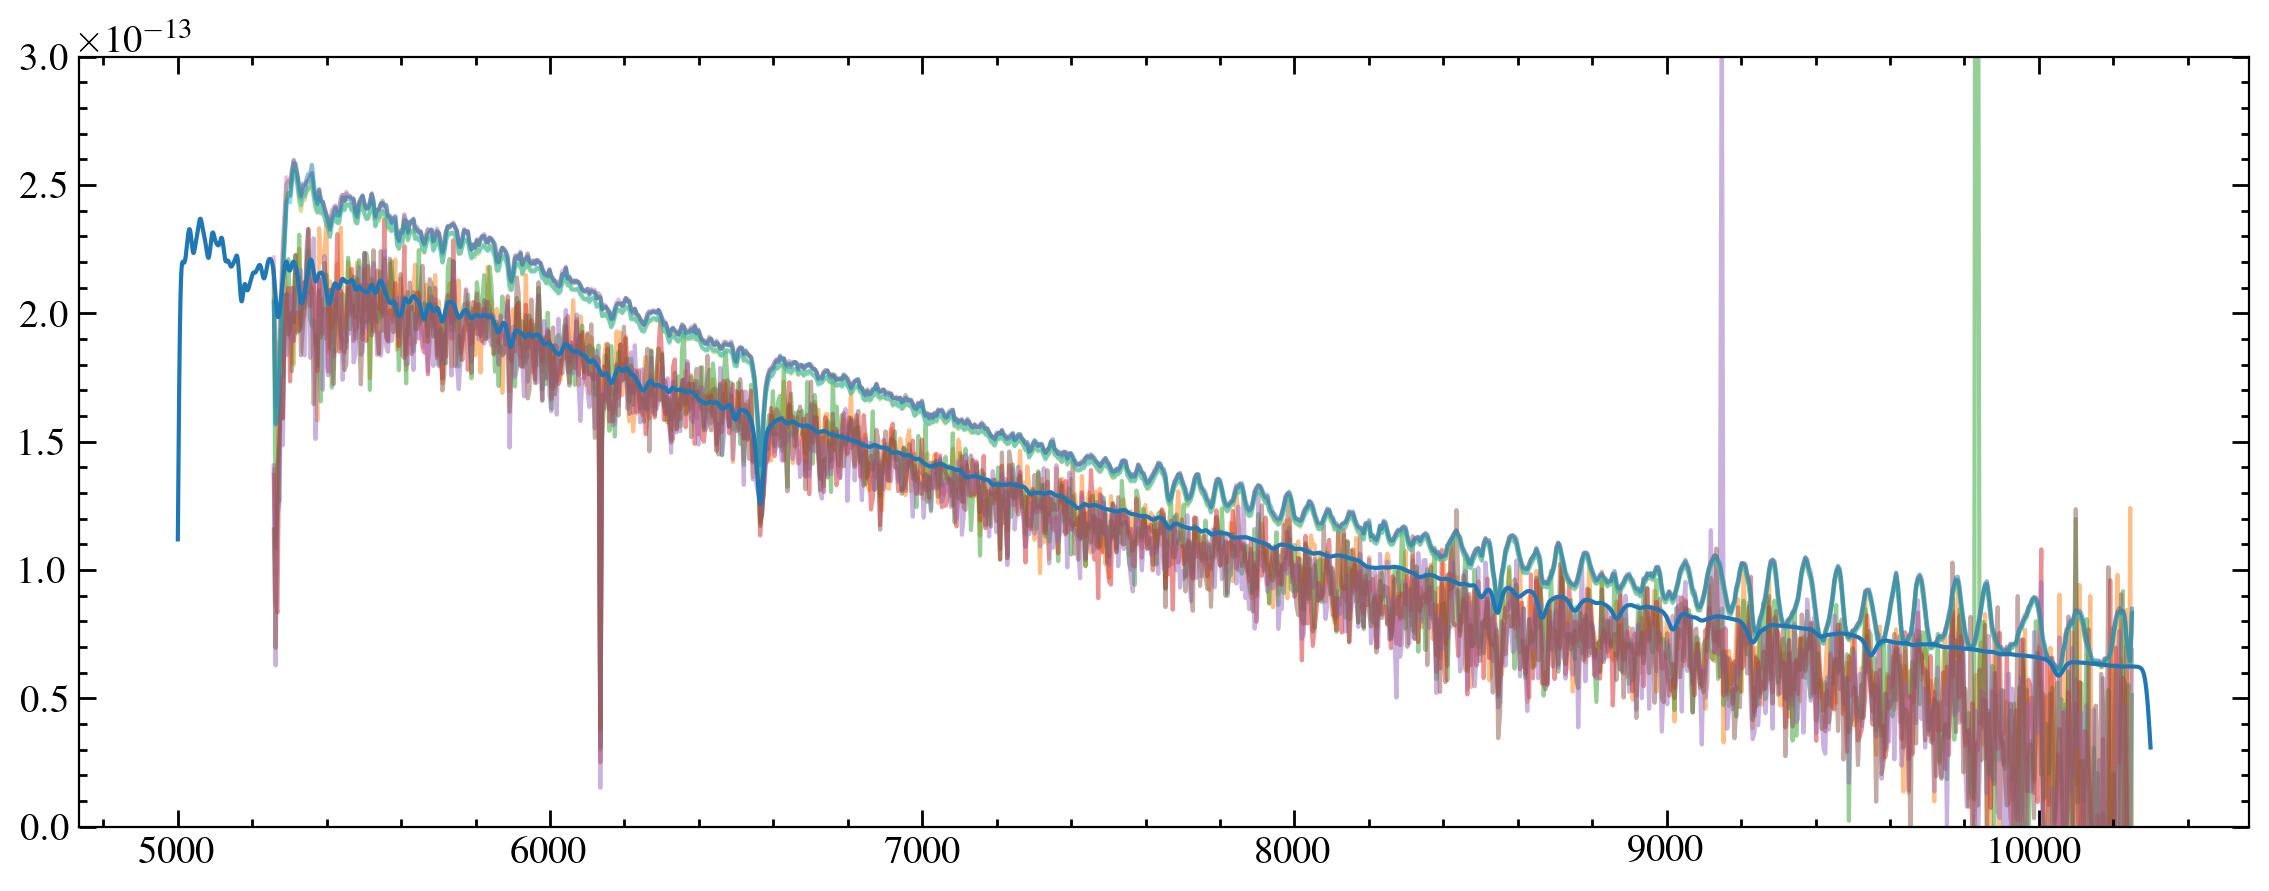

In [22]:
pmask = (pw > 5000) & (pw < 10300)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = pp.smear(pwi, pfi, 1000)
plt.plot(pwi, pfi)

for x in x1ds:
    if fits.getheader(x, 0)['OPT_ELEM'] == 'G750L':
        print(x)
        data = fits.getdata(x, 1)[0]
        plt.plot(data['WAVELENGTH'], data['FLUX'], zorder=-1, alpha=0.5)
        
plt.ylim(0, 3e-13)


In [23]:
# g750ls = []
# for x in x1ds:
#     if fits.getheader(x, 0)['OPT_ELEM'] == 'G750L':
#         g750ls.append(x)

# fig, ax = plt.subplots(figsize=(12, 15))

# for i, x in enumerate(g750ls):
#     hdr = fits.getheader(x, 0) 
#     data = fits.getdata(x, 1)[0]
#     w, f , e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
#     norm = np.median(f)
#     plt.plot(w, (f/norm)+i)
#     root, time = hdr['ROOTNAME'], hdr['TEXPTIME']
#     plt.annotate('{} ({:.0f}\,s)'.format(root, time), (10300, i), xycoords='data', va='bottom')
    
# ax.set_xlim(5100, 12000)


In [24]:
import stistools

The following tasks in the stistools package can be run with TEAL:
   basic2d      calstis     ocrreject     wavecal        x1d          x2d


/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/stsci/tools/nmpfit.py:8: UserWarning: NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.
  warnings.warn("NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.")
/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/stsci/tools/gfit.py:18: UserWarning: GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it.Use astropy.modeling instead.
  warnings.warn("GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it."


In [25]:
os.environ['oref'] = path

In [26]:
g750ls = []
for x in x1ds:
    if fits.getheader(x, 0)['OPT_ELEM'] == 'G750L' and fits.getheader(x, 0)['TEXPTIME'] > 10:
        g750ls.append(x)
g750ls

['/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2020_sx1.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2040_sx1.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2060_sx1.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2080_sx1.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma20a0_sx1.fits']

In [27]:


# for i, x in enumerate(g750ls):
#     hdr = fits.getheader(x, 0)
#     root = hdr['ROOTNAME']
#     flat = hdr['FRNGFLAT']
#     print(hdr['ROOTNAME'], hdr['FRNGFLAT'])
#     flatpath = '{}{}'.format(path, flat.lower())
#     scipath = '{}{}'.format(path, root)
#     stistools.defringe.normspflat('{}_raw.fits'.format(flatpath),
#                               '{}_nsp.fits'.format(flatpath), do_cal=True,
#                               wavecal='{}_wav.fits'.format(scipath))
#     with fits.open('{}_nsp.fits'.format(flatpath), mode='update') as hdulist:
#         hdulist[1].data[:,:250] = 1
#     mode = fits.getheader('{}_raw.fits'.format(scipath),0)['OPT_ELEM']
#     if mode == "G750L":
#         prod_type = "crj"
#     elif mode == "G750M":
#         prod_type = "sx2"
        
#     if os.path.exists('{}_frr.fits'.format(flatpath)):
#         os.remove('{}_frr.fits'.format(flatpath))

#     stistools.defringe.mkfringeflat('{}_{}.fits'.format(scipath, prod_type), '{}_nsp.fits'.format(flatpath),
#                                     '{}_frr.fits'.format(flatpath), beg_shift=-0.5, end_shift=2, shift_step=0.1,
#                                     beg_scale=0.8, end_scale=1.7, scale_step=0.04)
    
#     stistools.defringe.defringe('{}_{}.fits'.format(scipath, prod_type), '{}_frr.fits'.format(flatpath), overwrite=True)
    
#     outpath = '{}defringed/'.format(path)
#     outname = '{}{}_defringed_x1d.fits'.format(outpath, root)
         
#     if os.path.exists(outname):
#         os.remove(outname)
    
#     drj = '{}_drj.fits'.format(scipath)
#     trl = '{}{}.trl'.format(outpath, root)
#     stistools.x1d.x1d(drj, output = outname, trailer=trl)
    
#     fig, ax = plt.subplots()
#     olddata = fits.getdata(x, 1)[0]
#     w0, f0 , e0 = olddata['WAVELENGTH'], olddata['FLUX'], olddata['ERROR']
    
#     newdata = fits.getdata(outname, 1)[0]
#     w1, f1 , e1 = newdata['WAVELENGTH'], newdata['FLUX'], newdata['ERROR']
    
#     plt.plot(w0, f0)
#     plt.plot(w0, e0)
#     plt.plot(w1, f1)
#     plt.plot(w1, e1)
#     plt.show()
    
    


In [28]:
x1dpath = '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/defringed/'
savepath = 'draft_hlsp/wasp-121/'
hlsp = 'meats_hlsp_info.csv'
version = 1
# prepare_stis.make_stis_spectrum(x1dpath, version, hlsp, savepath = savepath, plot=True, save_fits=True, normfac=1.0, star = 'WASP-121')

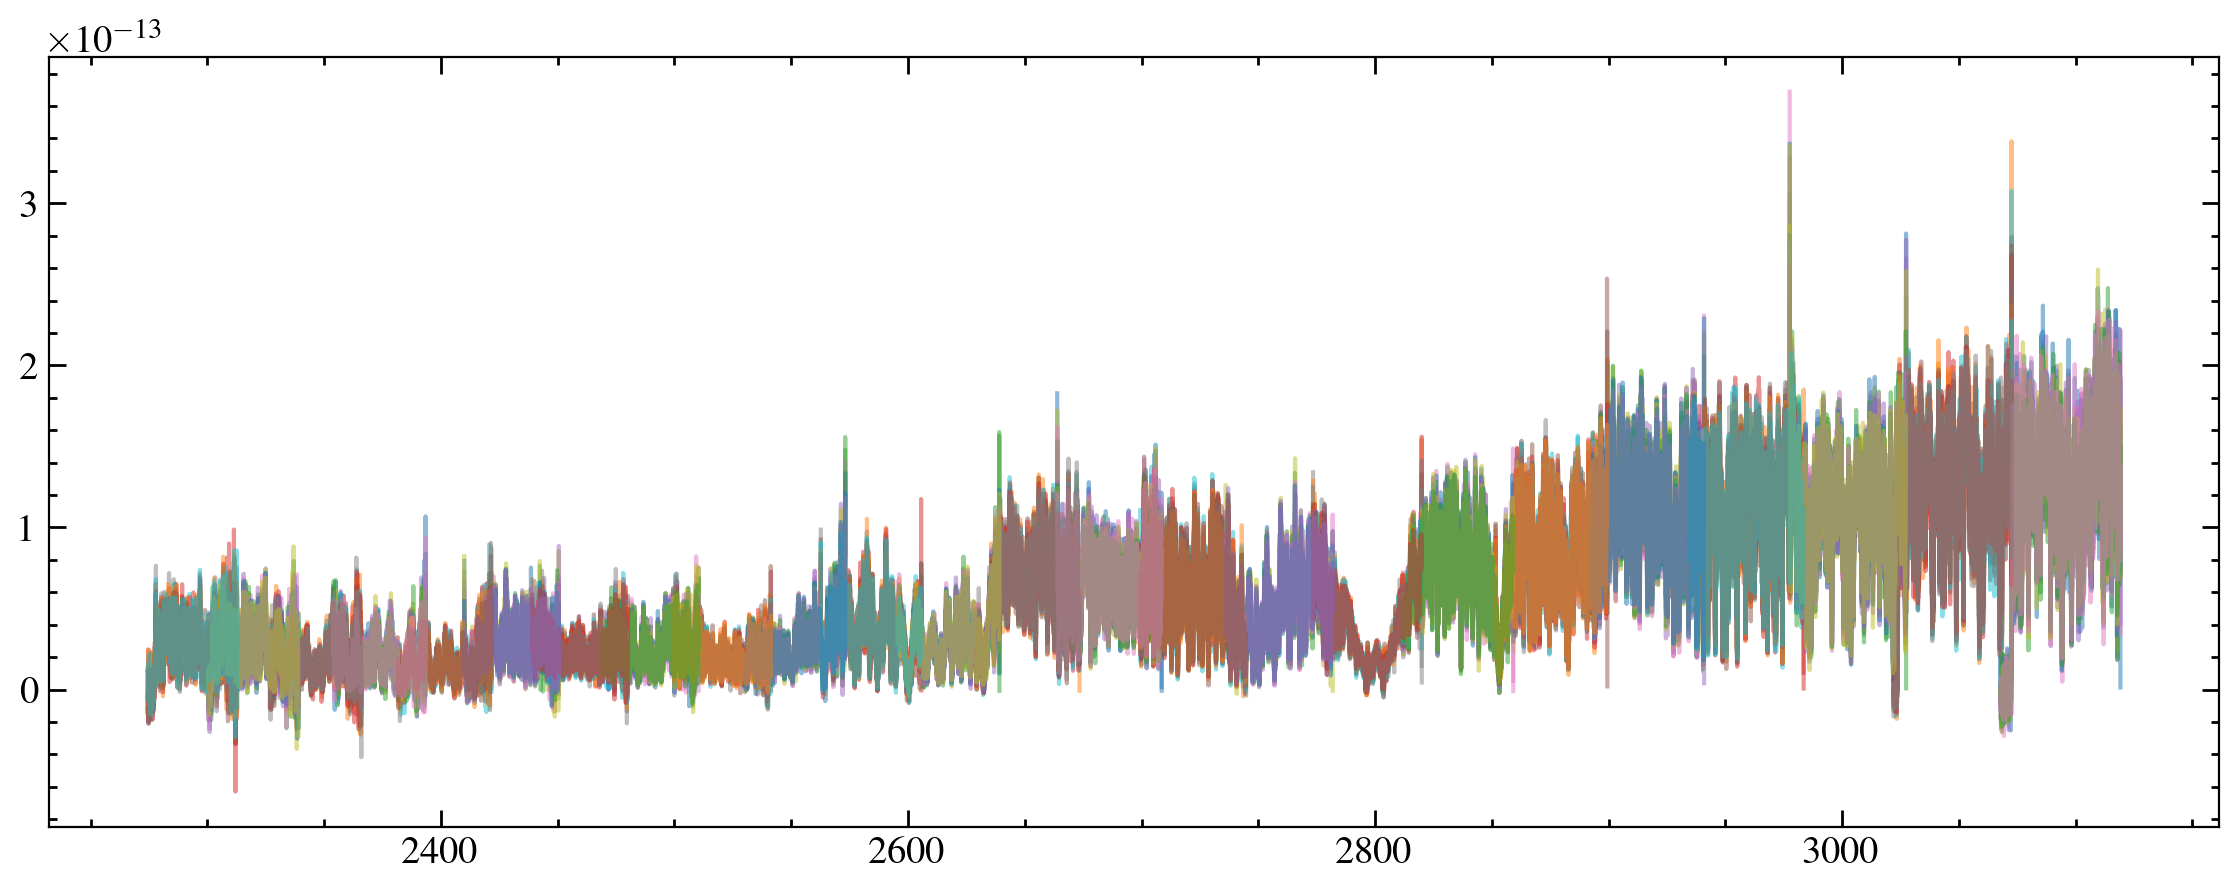

In [29]:
e230m = []

for x in x1ds:
    if fits.getheader(x, 0)['OPT_ELEM'] == 'E230M':
        e230m.append(x)
        dt = fits.getdata(x, 1)
        for data in dt:
            w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
            plt.plot(w, f , alpha =0.5)
   
            

In [30]:
x1dpath = '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/nuv/'
savepath = 'draft_hlsp/wasp-121/'
hlsp = 'meats_hlsp_info.csv'
version = 1
# prepare_stis.make_stis_spectrum(x1dpath, version, hlsp, savepath = savepath, plot=True, save_fits=True, normfac=1.0, star = 'WASP-121')

In [31]:
ls draft_hlsp/wasp-121/

hlsp_muscles_hst_stis_wasp-121_e230m_v1_component-spec.fits
hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits
hlsp_muscles_hst_stis_wasp-121_g430l_v1_component-spec.fits
hlsp_muscles_hst_stis_wasp-121_g750l_v1_component-spec.fits
hlsp_muscles_model_apec_wasp-121_na_v1_component-spec.fits
hlsp_muscles_model_dem_wasp-121_na_v1_component-spec.fits
hlsp_muscles_model_lya_wasp-121_na_v1_component-spec.fits
hlsp_muscles_model_phx_wasp-121_na_v1_component-spec.fits
hlsp_muscles_multi_multi_wasp-121_broadband_v1_adapt-const-res-sed.fits
hlsp_muscles_multi_multi_wasp-121_broadband_v1_adapt-var-res-sed.fits
hlsp_muscles_multi_multi_wasp-121_broadband_v1_const-res-sed.fits
hlsp_muscles_multi_multi_wasp-121_broadband_v1_var-res-sed.fits
hlsp_muscles_xmm_epic_wasp-121_na_v1_component-spec.fits


G430L
E230M
G750L
G140L


/tmp/ipykernel_287584/1946993940.py:23: RuntimeWarning: invalid value encountered in divide
  mask = (f/e > 1)


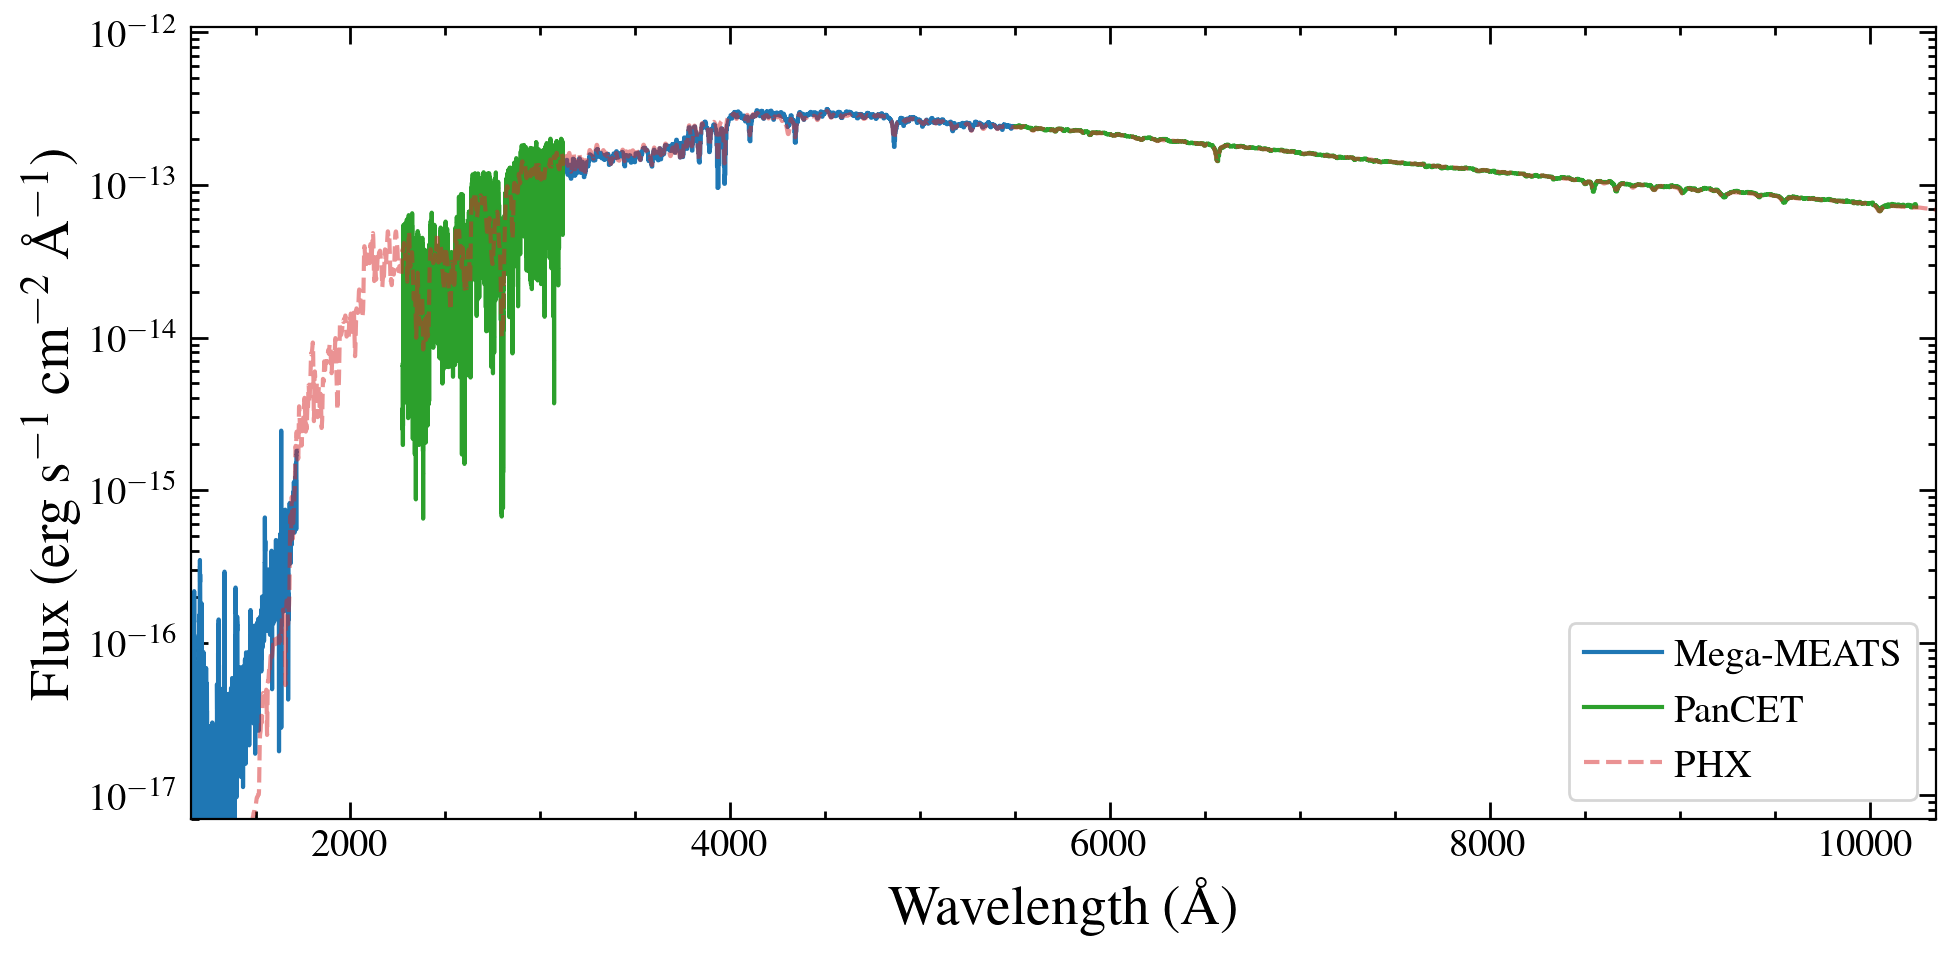

In [32]:
hlsp_x1ds = glob.glob('draft_hlsp/wasp-121/*stis*')

fig, ax = plt.subplots(figsize=(10, 5))

for x in hlsp_x1ds:
    grating = fits.getheader(x, 0)['GRATING']
    print(grating)
    data = fits.getdata(x, 1)
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating == 'G140L':
        mask = (w > 1160)
        c = 'C0'
        label = 'Mega-MEATS'
    if grating == 'G430L':
        mask = (w > 3000) & (w < 5500)
        label = 'Mega-MEATS'
        c = 'C0'
    if grating == 'G750L':
        mask = (w > 5500) 
        c = 'C2'
        label = 'PanCET'
    if grating == 'E230M':
        mask = (f/e > 1) 
        c= 'C2'
        label = 'PanCET'
    w, f, e = w[mask], f[mask], e[mask]
    
    ax.step(w, f, where='mid', c=c, label=label)

pmask = (pw > 1000) & (pw < 10500)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = pp.smear(pwi, pfi, 1000)
plt.plot(pwi[pwi < 10400], pfi[pwi < 10400]*1.14, c='C3', label = 'PHX', alpha=0.5, ls='--')

ax.set_yscale('log')

ax.set_ylim(7e-18)
ax.set_xlim(1160, 10350)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=True)

ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
ax.set_xlabel('Wavelength (\AA)', size=20)
fig.tight_layout()

# fig.savefig('plots/wasp-121_stis.pdf')

/tmp/ipykernel_287584/880186105.py:21: RuntimeWarning: invalid value encountered in divide
  mask = (f/e > 1)


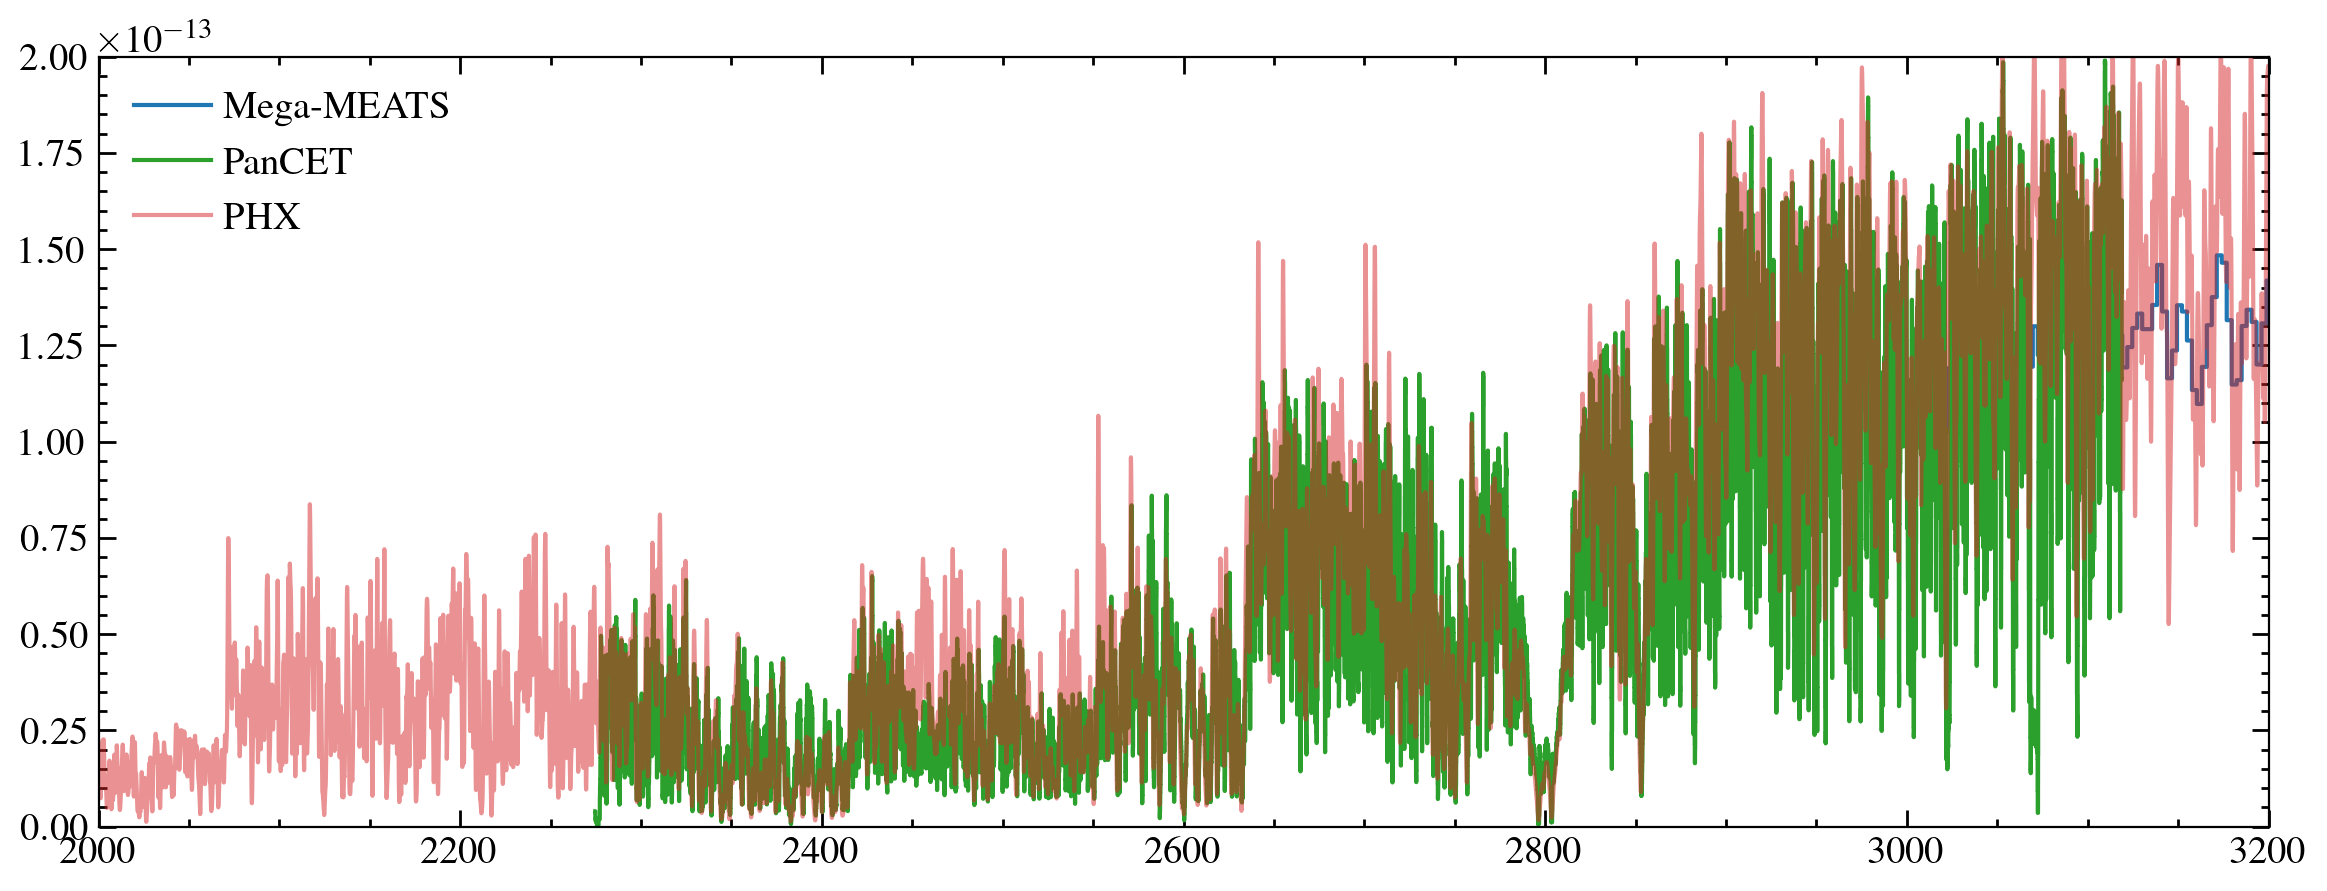

In [33]:
hlsp_x1ds = glob.glob('draft_hlsp/wasp-121/*stis*')

fig, ax = plt.subplots()

for x in hlsp_x1ds:
    grating = fits.getheader(x, 0)['GRATING']
    data = fits.getdata(x, 1)
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating == 'G140L':
        mask = (w > 1160)
        c = 'C0'
        label = 'Mega-MEATS'
    if grating == 'G430L':
        mask = (w > 3000) & (w < 5500)
        label = 'Mega-MEATS'
    if grating == 'G750L':
        mask = (w > 5500) 
        c = 'C2'
        label = 'PanCET'
    if grating == 'E230M':
        mask = (f/e > 1) 
        f = convolve(f,Box1DKernel(2))
        
        c= 'C2'
        label = 'PanCET'
    w, f, e = w[mask], f[mask], e[mask]
    
    ax.step(w, f, where='mid', c=c, label=label)

pmask = (pw > 1000) & (pw < 1e4)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = pp.smear(pwi, pfi, 10000)
plt.plot(pwi, pfi*1.14, c='C3', label = 'PHX', alpha=0.5)

# ax.set_yscale('log')

ax.set_ylim(0, 2e-13)
ax.set_xlim(2000, 3200)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

/tmp/ipykernel_287584/1184671045.py:19: RuntimeWarning: invalid value encountered in divide
  mask = (f/e > 1)


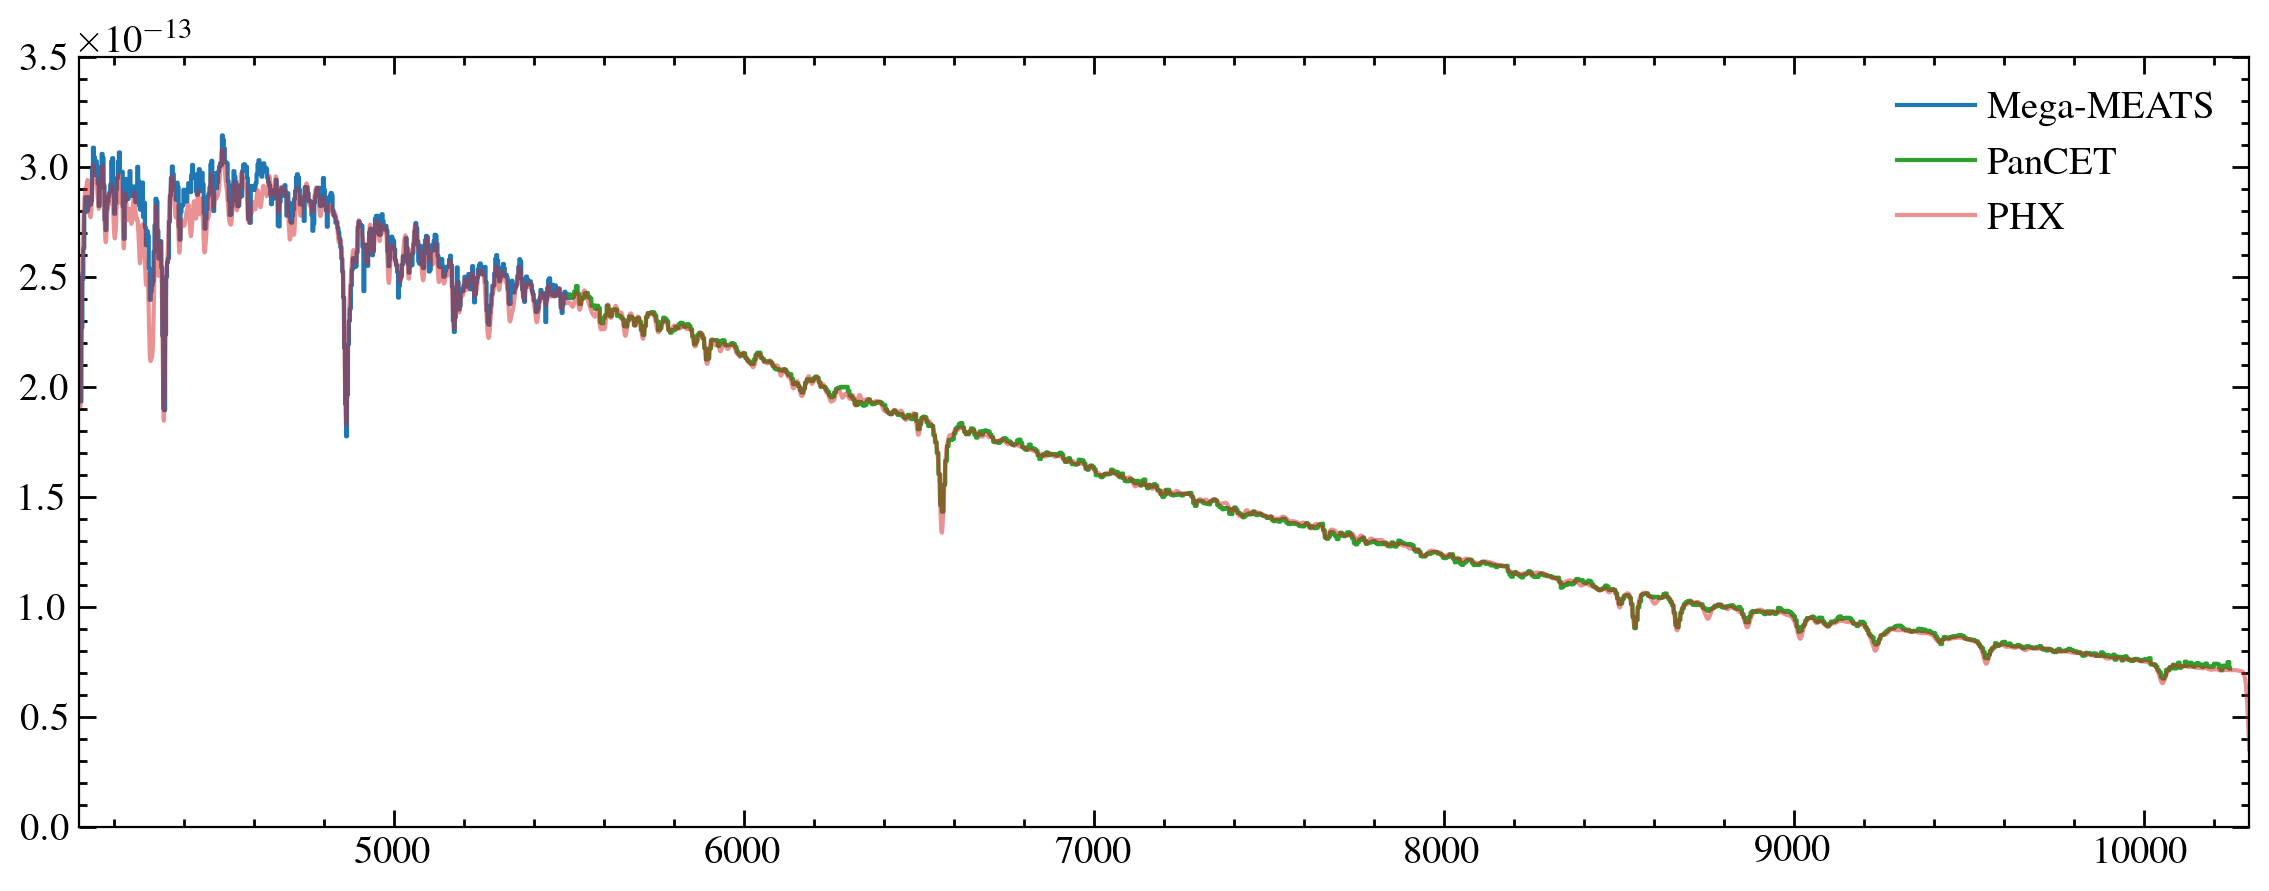

In [34]:

fig, ax = plt.subplots()

for x in hlsp_x1ds:
    grating = fits.getheader(x, 0)['GRATING']
    data = fits.getdata(x, 1)
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating == 'G140L':
        mask = (w > 1160)
        c = 'C0'
        label = 'Mega-MEATS'
    if grating == 'G430L':
        mask = (w > 3000) & (w < 5500)
        label = 'Mega-MEATS'
    if grating == 'G750L':
        mask = (w > 5500) 
        c = 'C2'
        label = 'PanCET'
    if grating == 'E230M':
        mask = (f/e > 1) 
        f = convolve(f,Box1DKernel(2))
        
        c= 'C2'
        label = 'PanCET'
    w, f, e = w[mask], f[mask], e[mask]
    
    ax.step(w, f, where='mid', c=c, label=label)

pmask = (pw > 1000) & (pw <10300)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = pp.smear(pwi, pfi*1.14, 1500)
plt.plot(pwi, pfi, c='C3', label = 'PHX', alpha=0.5)

# ax.set_yscale('log')

ax.set_ylim(0, 3.5e-13)
ax.set_xlim(4100, 10300)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

/tmp/ipykernel_287584/1710734608.py:19: RuntimeWarning: invalid value encountered in divide
  mask = (f/e > 1)


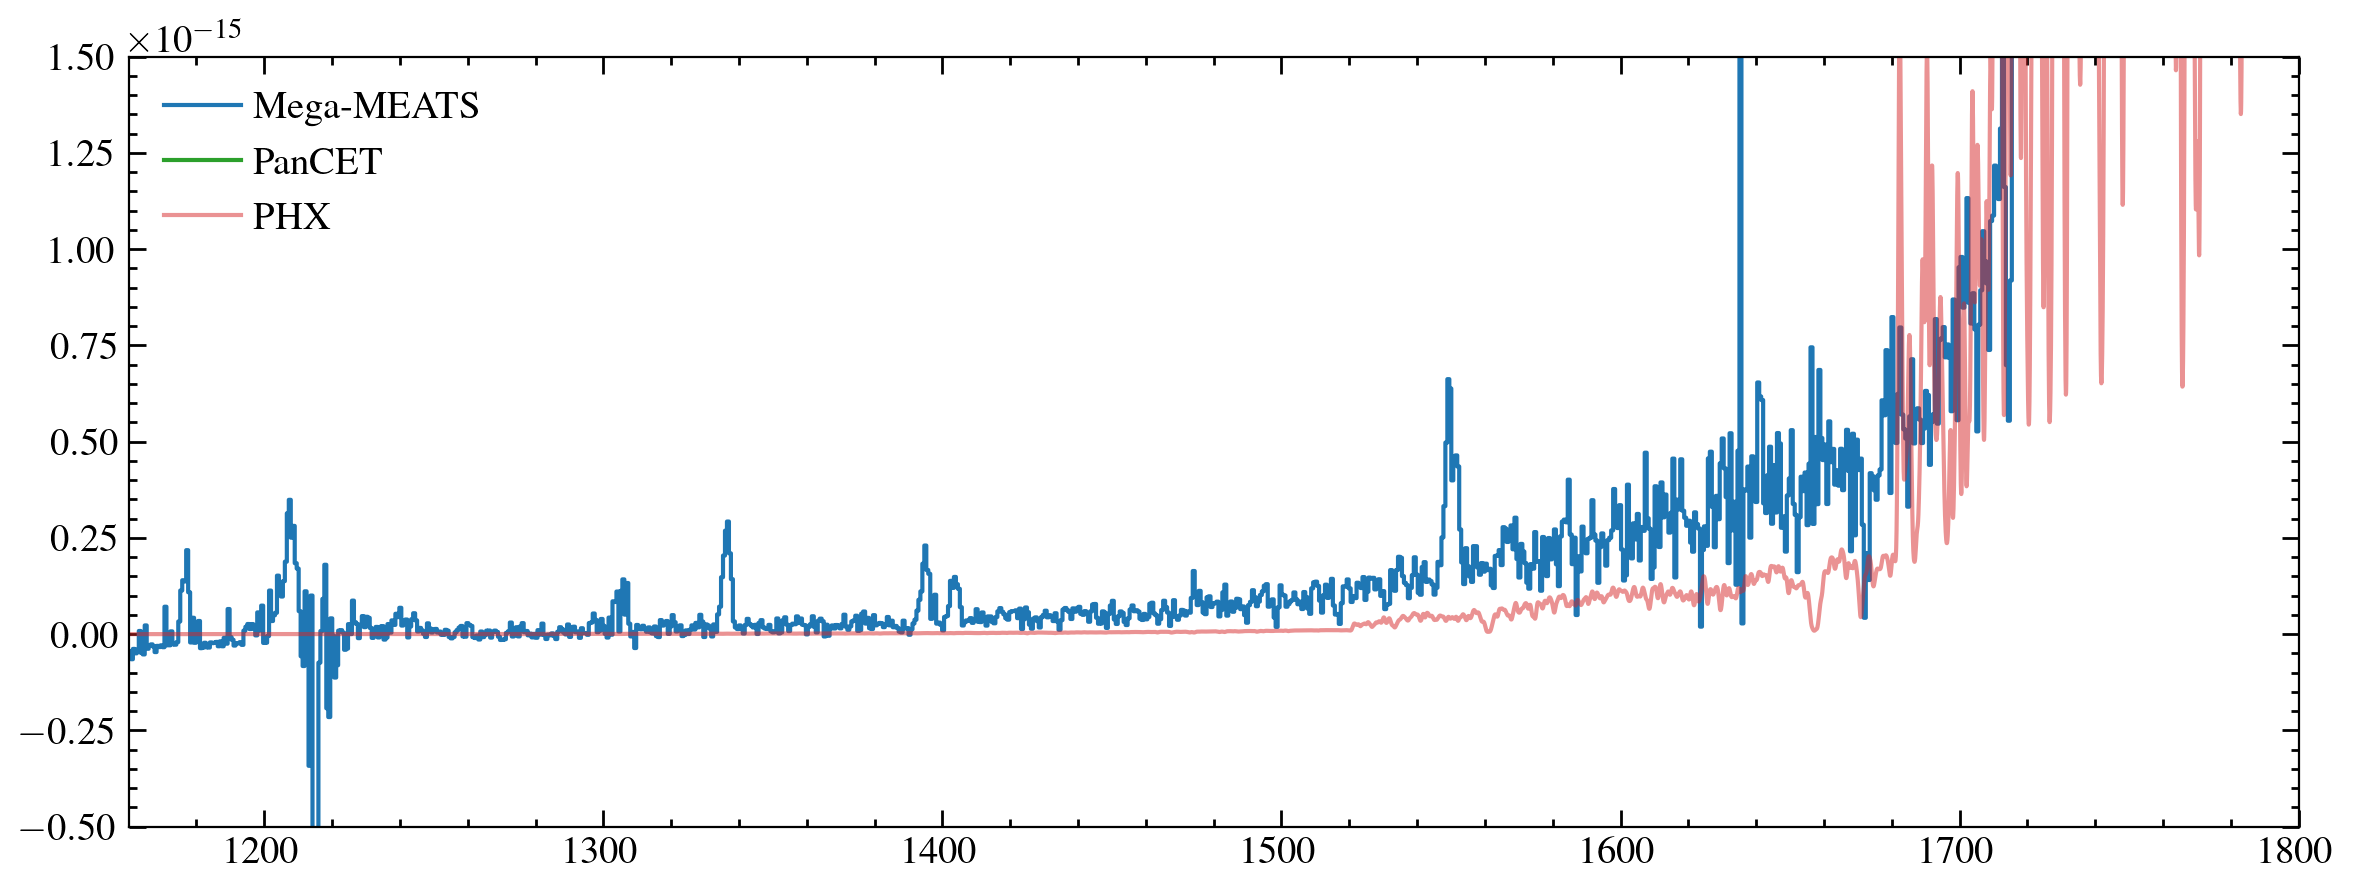

In [35]:

fig, ax = plt.subplots()

for x in hlsp_x1ds:
    grating = fits.getheader(x, 0)['GRATING']
    data = fits.getdata(x, 1)
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating == 'G140L':
        mask = (w > 1160)
        c = 'C0'
        label = 'Mega-MEATS'
    if grating == 'G430L':
        mask = (w > 3000) & (w < 5500)
        label = 'Mega-MEATS'
    if grating == 'G750L':
        mask = (w > 5500) 
        c = 'C2'
        label = 'PanCET'
    if grating == 'E230M':
        mask = (f/e > 1) 
        f = convolve(f,Box1DKernel(2))
        
        c= 'C2'
        label = 'PanCET'
    w, f, e = w[mask], f[mask], e[mask]
    
    ax.step(w, f, where='mid', c=c, label=label)

pmask = (pw > 1000) & (pw <10300)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = pp.smear(pwi, pfi, 5000)
plt.plot(pwi, pfi*1.14, c='C3', label = 'PHX', alpha=0.5)

# ax.set_yscale('log')

ax.set_ylim(-0.5e-15, 1.5e-15)
ax.set_xlim(1160, 1800)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

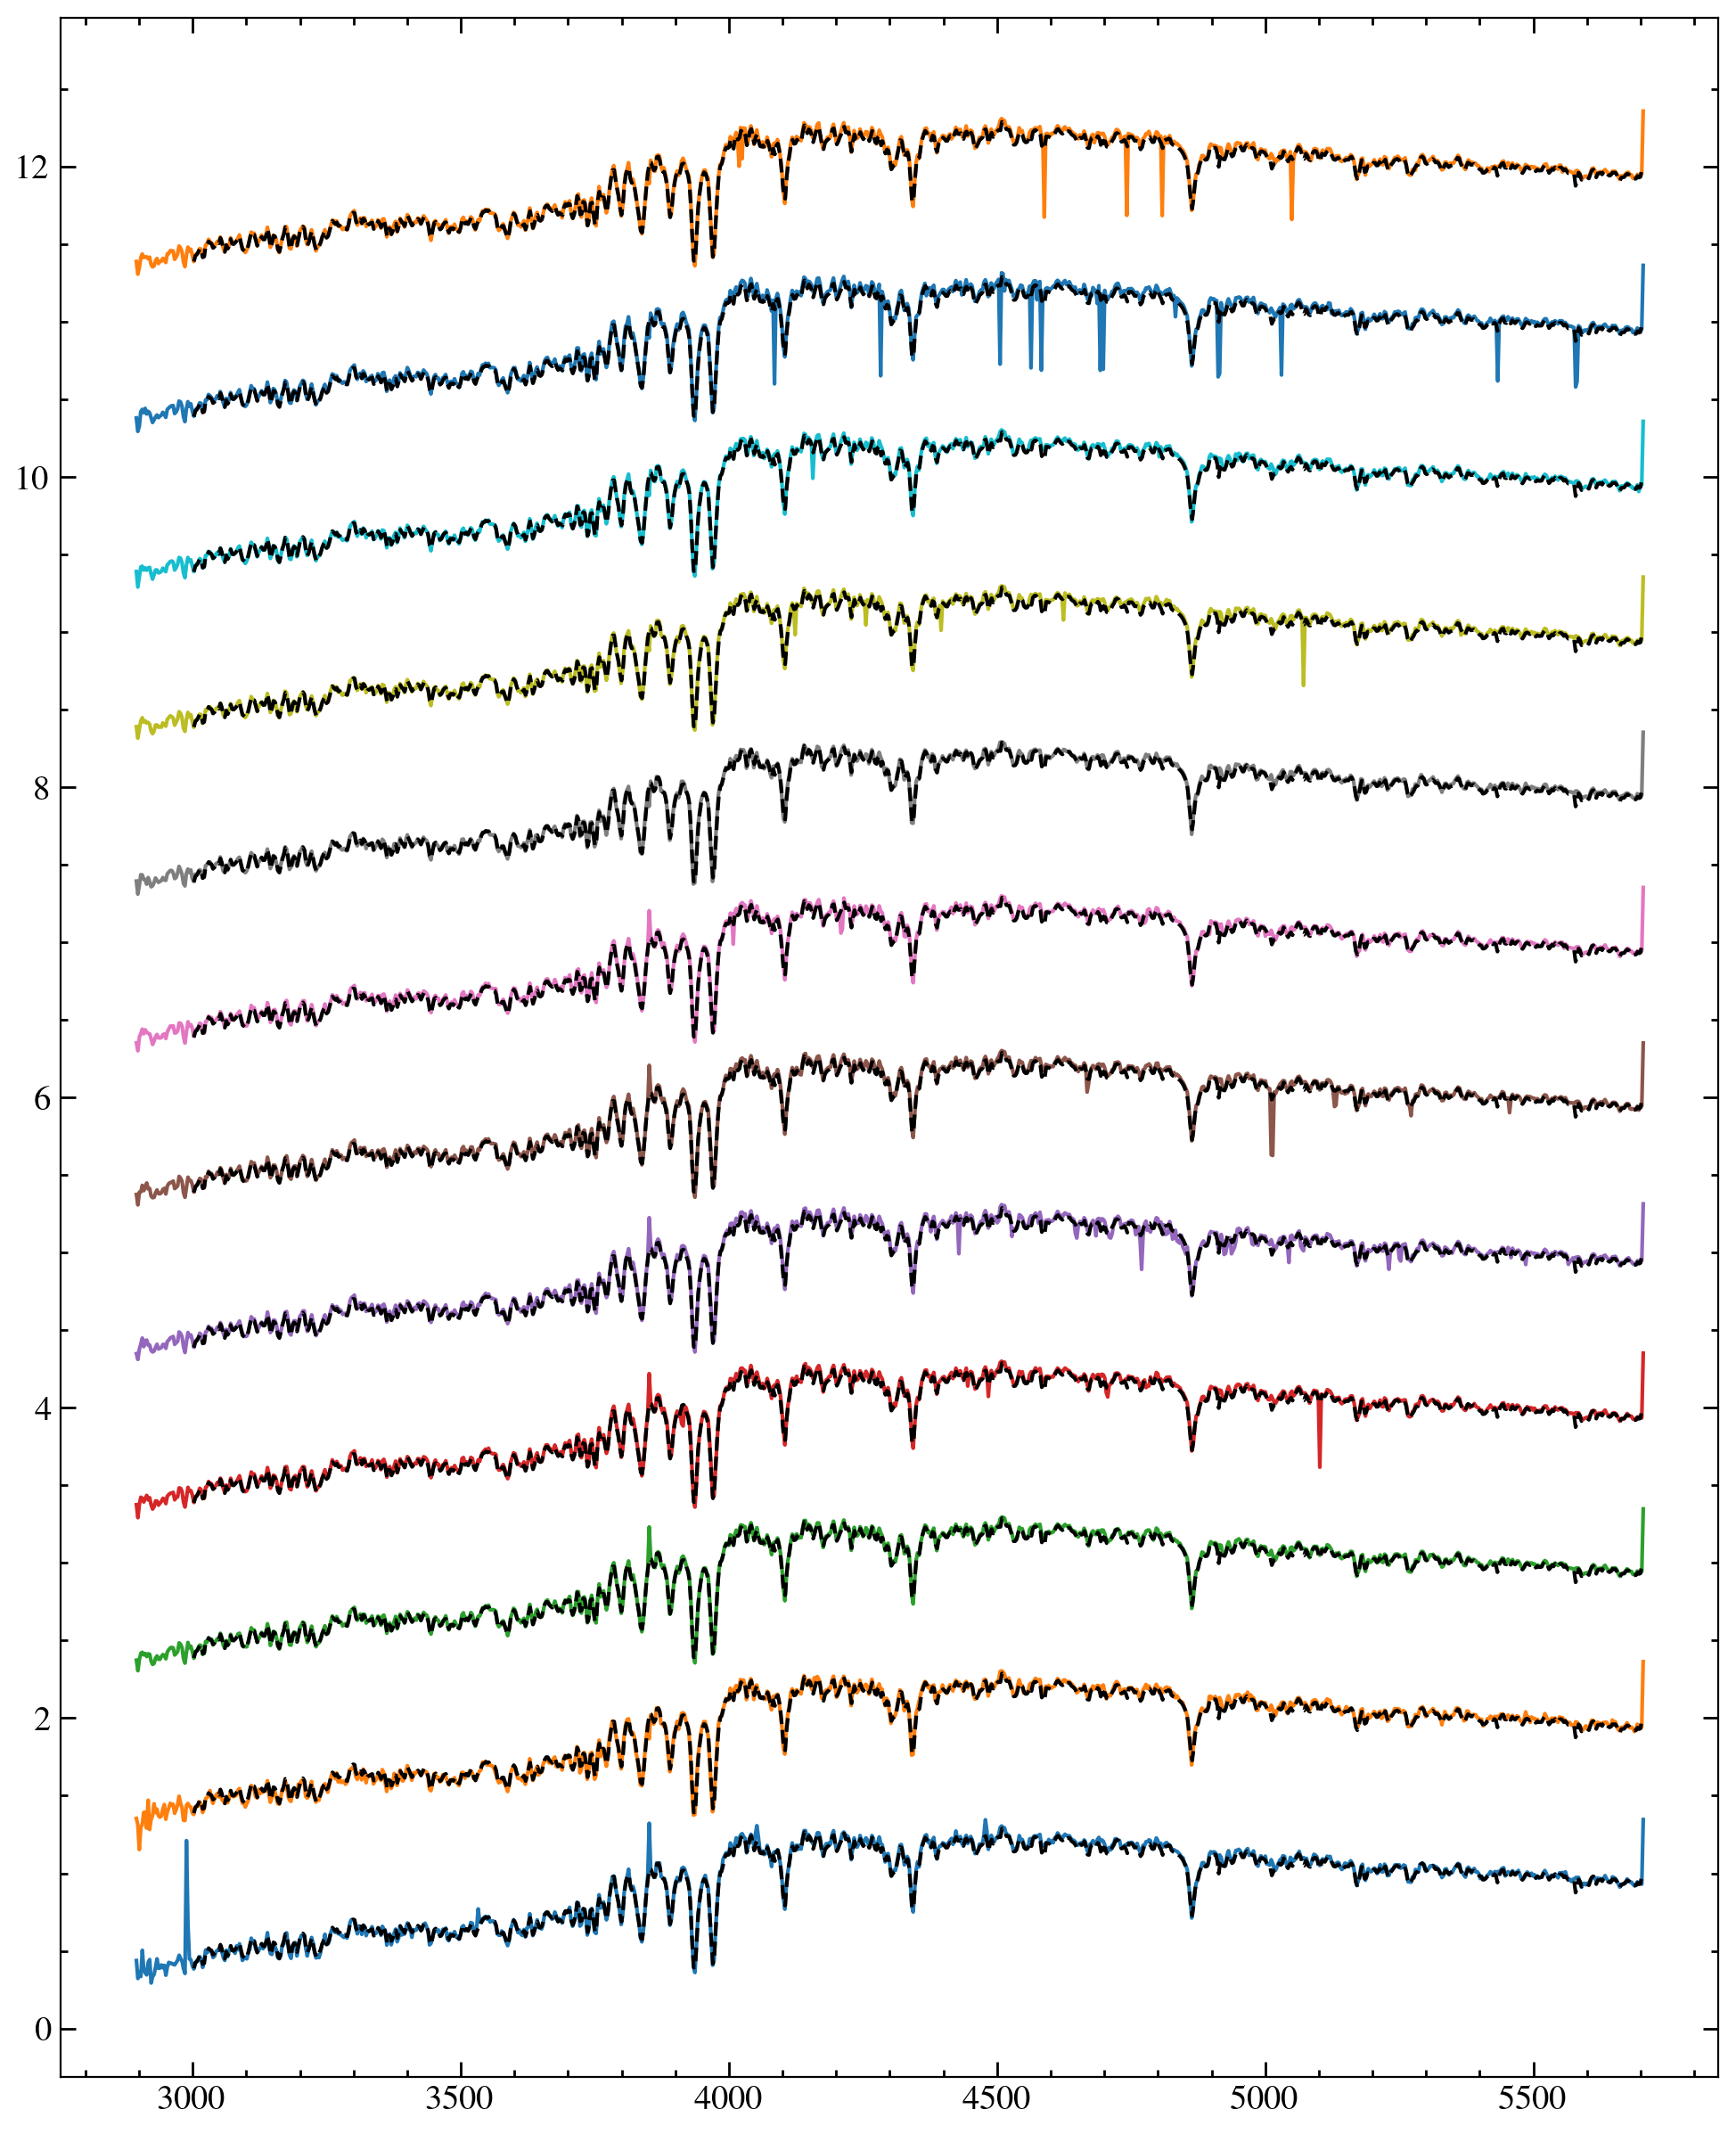

In [36]:
g430ls = []
for x in x1ds:
    if fits.getheader(x, 0)['OPT_ELEM'] == 'G430L' and fits.getheader(x, 0)['TEXPTIME'] > 10:
        g430ls.append(x)

fig, ax = plt.subplots(figsize=(12, 15))

norm_opt = np.median(f_opt)

for i, x in enumerate(g430ls):
    hdr = fits.getheader(x, 0) 
    data = fits.getdata(x, 1)[0]
    w, f , e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
    norm = np.median(f)
    plt.plot(w, (f/norm)+i)
    plt.plot(w_opt, (f_opt/norm_opt)+i, c='k', ls='--')
    root, time = hdr['ROOTNAME'], hdr['TEXPTIME']
    plt.annotate('{} ({:.0f}\,s)'.format(root, time), (10300, i), xycoords='data', va='bottom')
    
# ax.set_xlim(5100, 12000)

In [37]:
x1dpath = '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/opt/'
savepath = 'draft_hlsp/wasp-121/'
hlsp = 'meats_hlsp_info.csv'
version = 2
# prepare_stis.make_stis_spectrum(x1dpath, version, hlsp, savepath = savepath, plot=True, save_fits=True, normfac=1.0, star = 'WASP-121')

/tmp/ipykernel_287584/4022290269.py:7: RuntimeWarning: invalid value encountered in divide
  plt.plot(data['WAVELENGTH'], data['FLUX']/data['ERROR'])


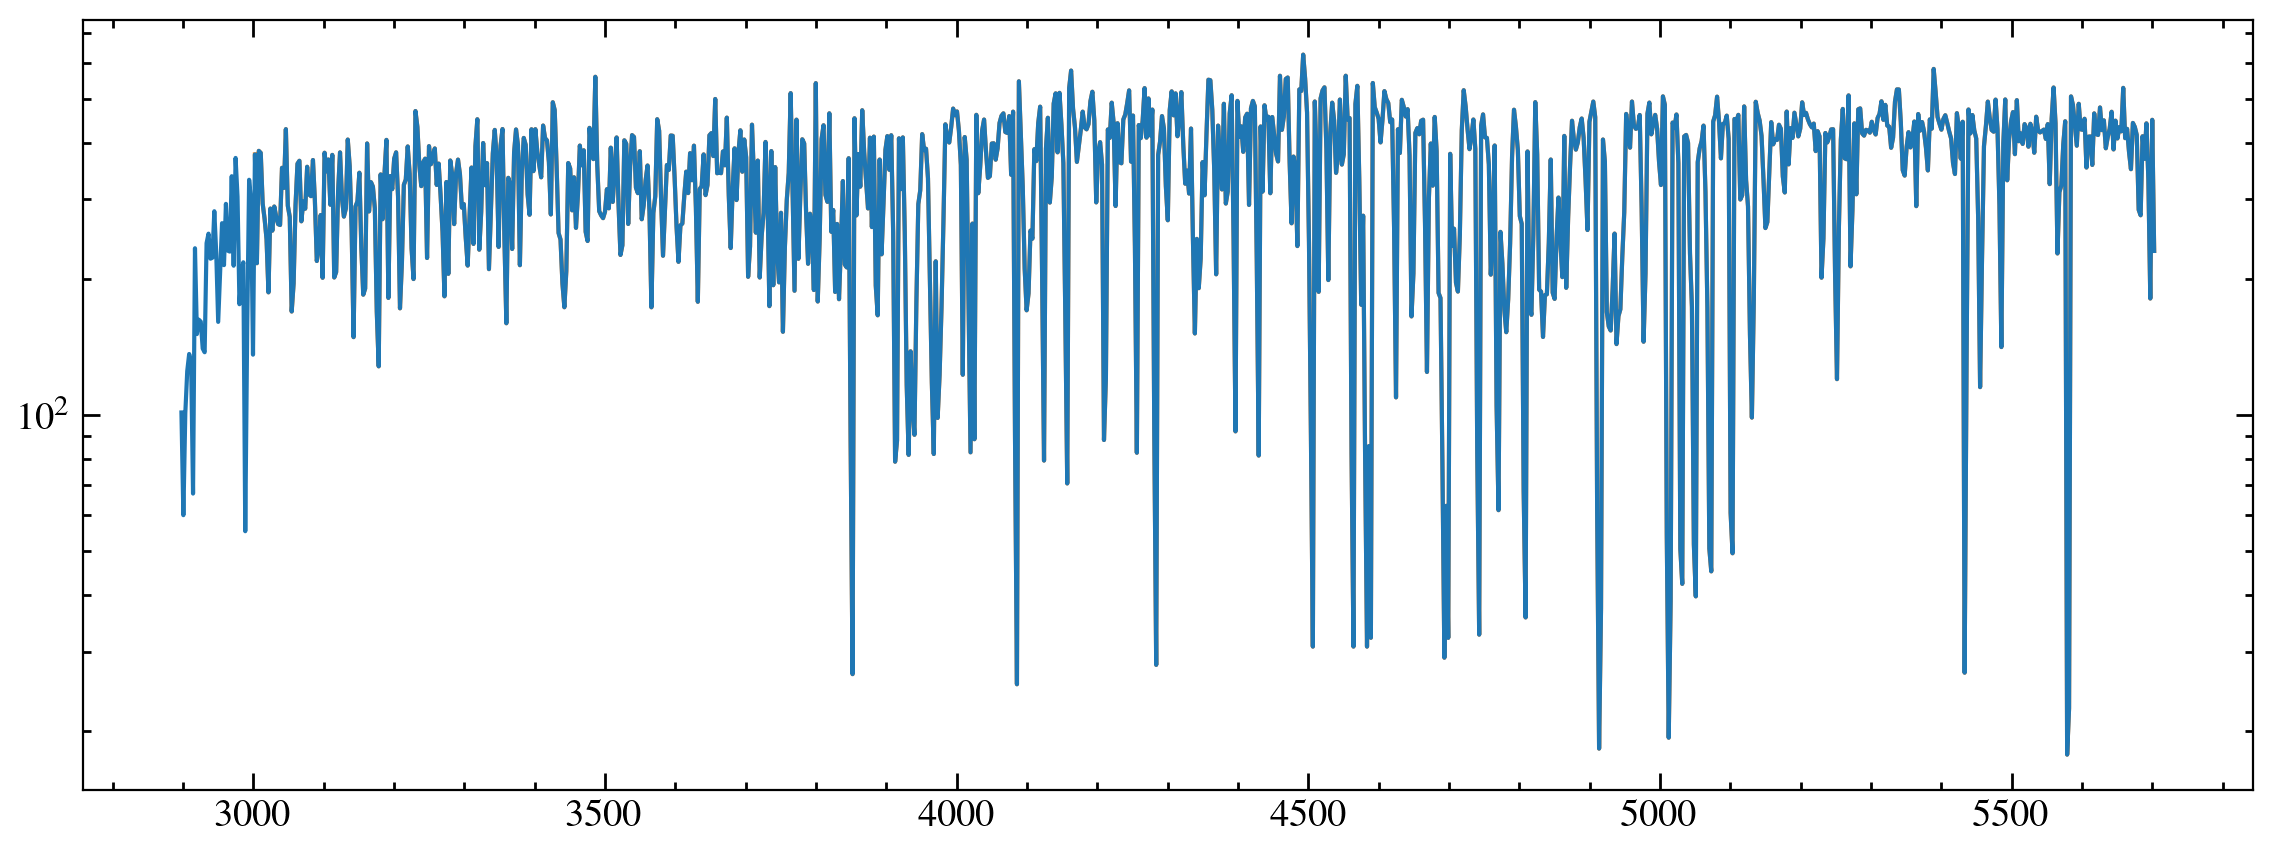

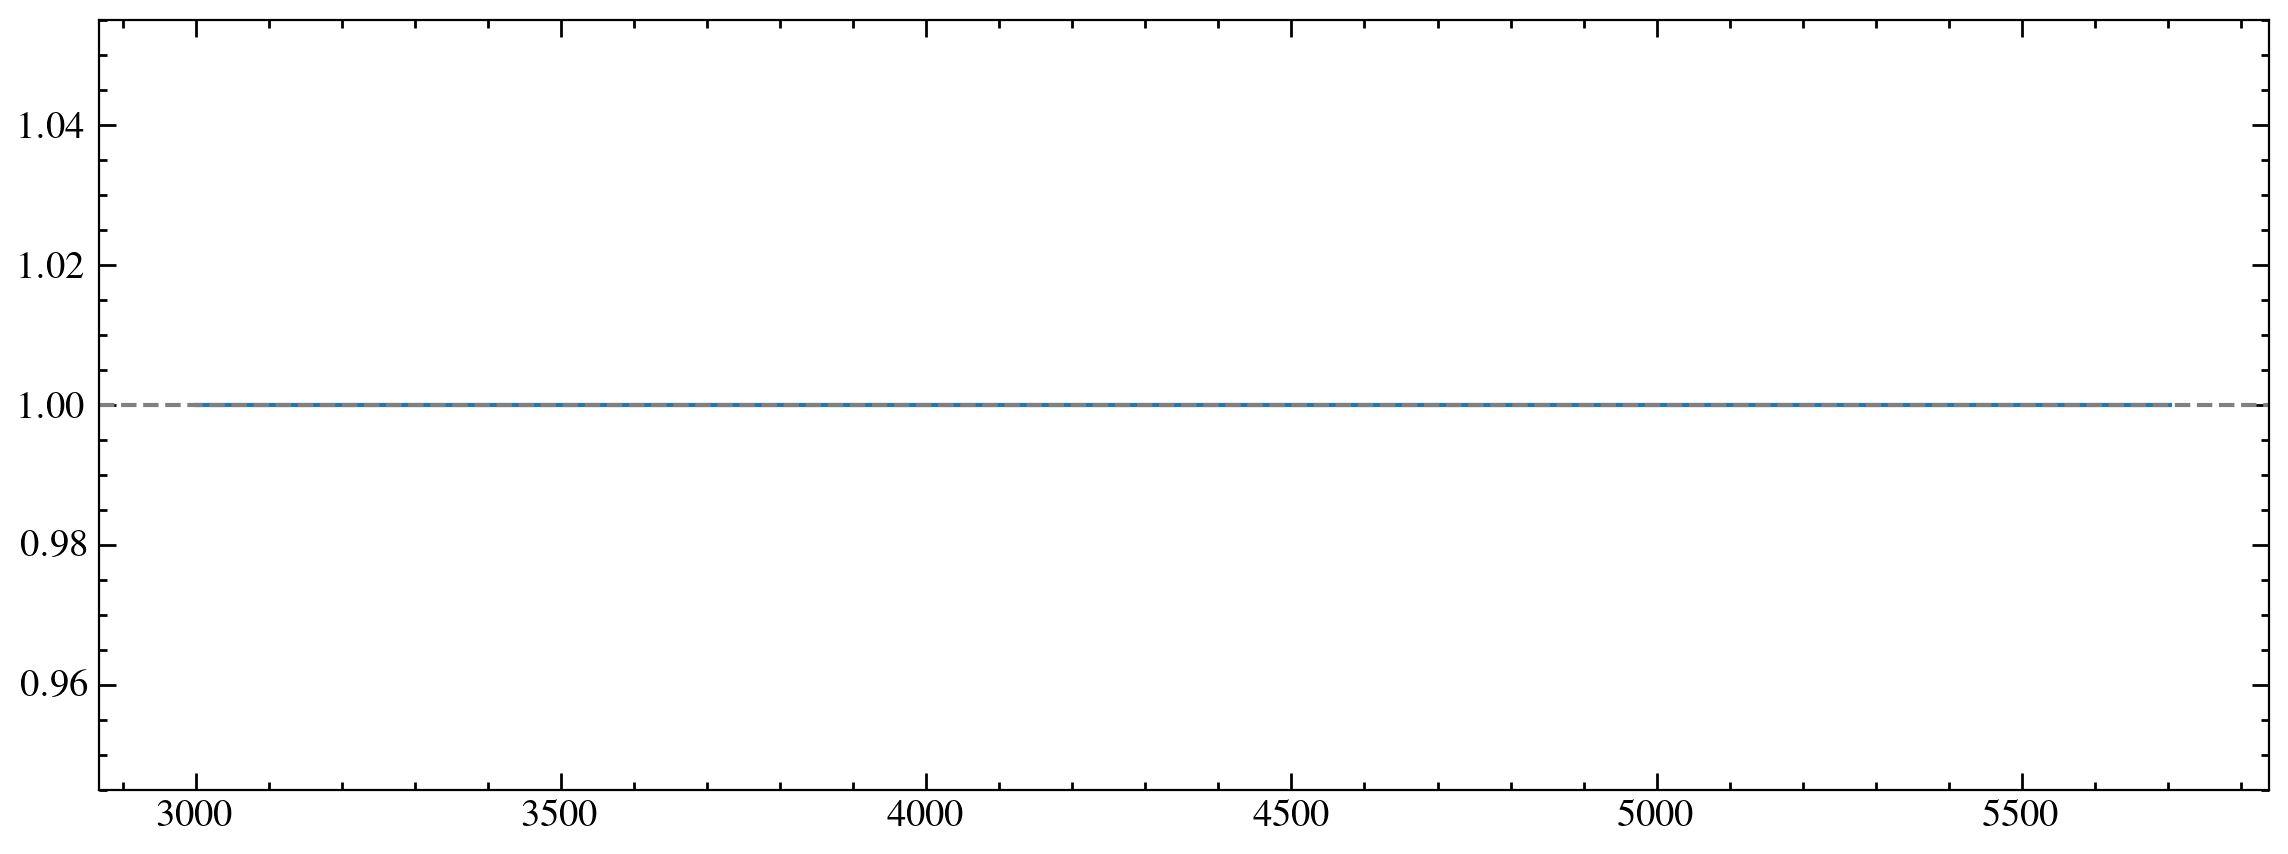

In [38]:
data = fits.getdata('draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g430l_v1_component-spec.fits', 1)
# plt.plot(data['WAVELENGTH'], data['FLUX'])
# plt.plot(data['WAVELENGTH'], data['ERROR'])
# plt.plot(w_opt, f_opt, zorder=-1)
# plt.plot(w_opt, e_opt, zorder=-1)
w_opt2, f_opt2, e_opt2 = data['WAVELENGTH'], data['FLUX'], data['ERROR']
plt.plot(data['WAVELENGTH'], data['FLUX']/data['ERROR'])
plt.plot(w_opt, f_opt/e_opt, zorder=-1)

plt.yscale('log')

plt.show()

fi = interp1d(data['WAVELENGTH'], data['FLUX'])(w_opt)

plt.plot(w_opt, fi/f_opt)
plt.axhline(1, ls ='--', c='0.5')

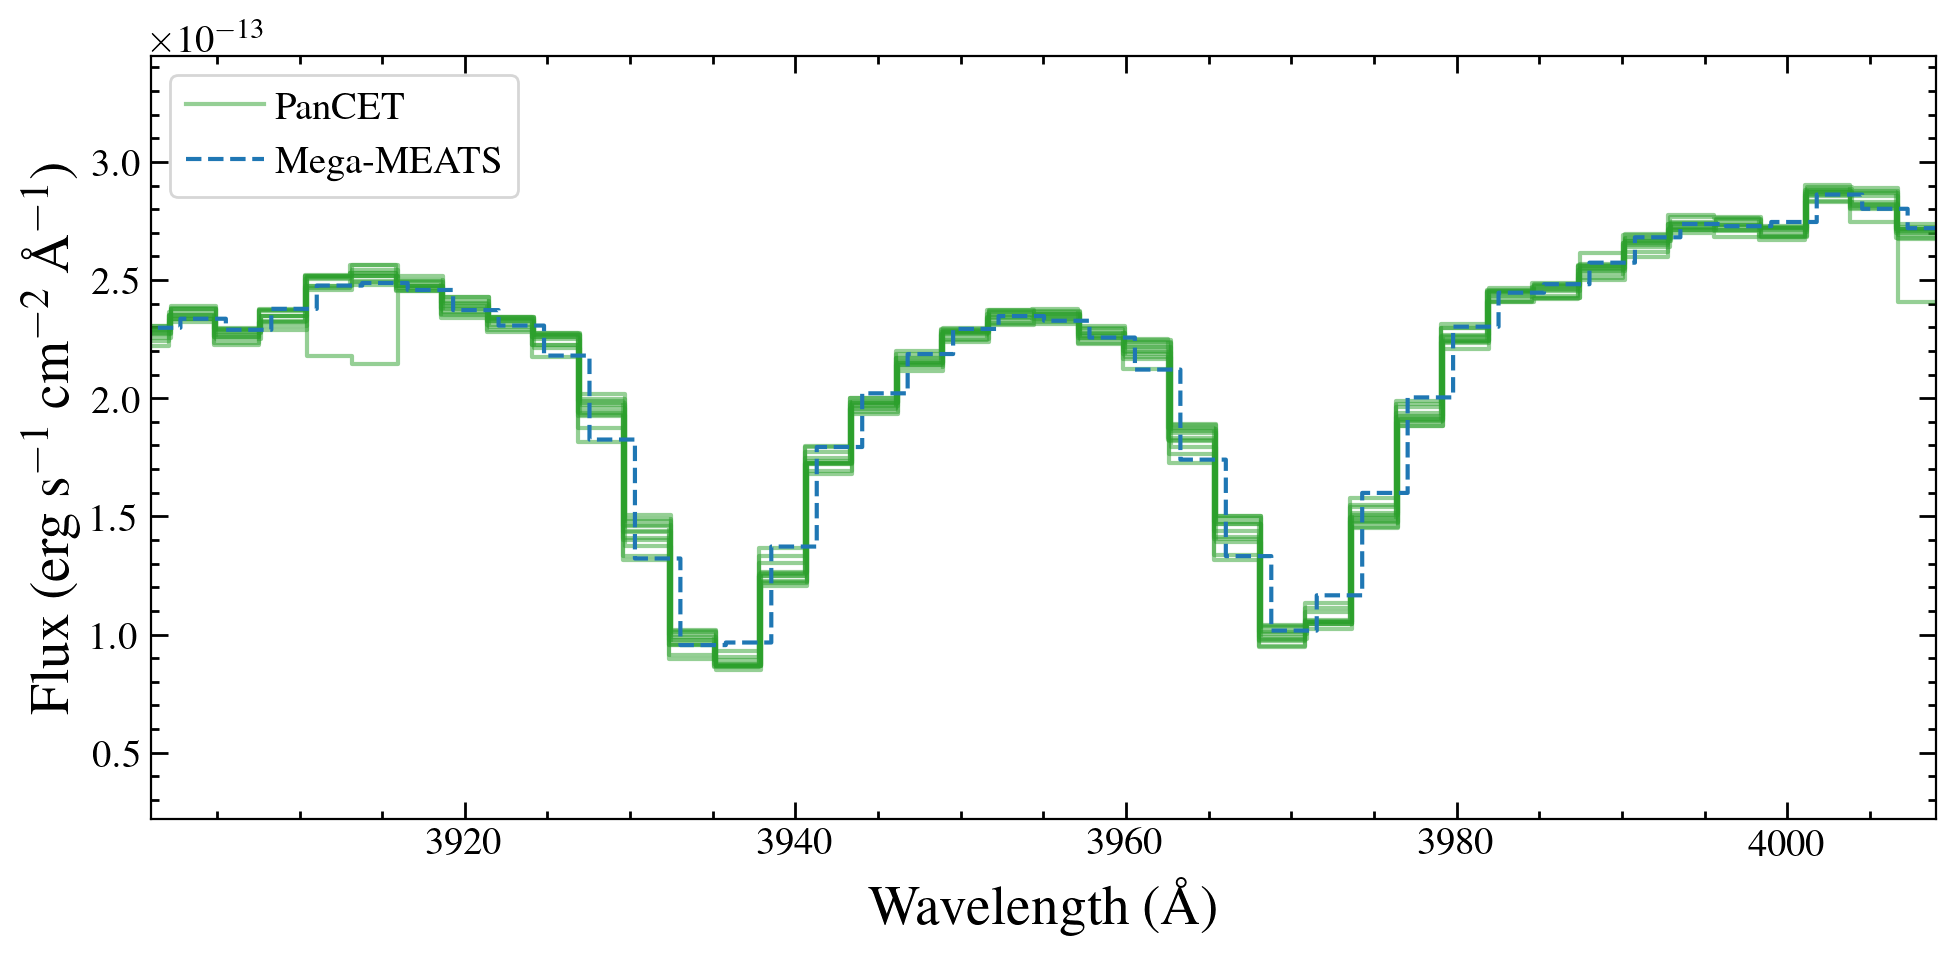

In [39]:
g430ls = []
for x in x1ds:
    if fits.getheader(x, 0)['OPT_ELEM'] == 'G430L' and fits.getheader(x, 0)['TEXPTIME'] > 10:
        g430ls.append(x)

fig, ax = plt.subplots(figsize=(10, 5))

norm_opt = np.median(f_opt)

for i, x in enumerate(g430ls):
    hdr = fits.getheader(x, 0) 
    data = fits.getdata(x, 1)[0]
    w, f , e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
    norm = np.median(f)
    plt.step(w, f, where='mid', c='C2', label='PanCET', alpha =0.5)
#     plt.plot(w_opt, (f_opt/norm_opt), c='k', ls='--')
    root, time = hdr['ROOTNAME'], hdr['TEXPTIME']
#     plt.annotate('{} ({:.0f}\,s)'.format(root, time), (10300, i), xycoords='data', va='bottom')

plt.step(w_opt, f_opt, c='C0', ls='--', where='mid', label='Mega-MEATS')
# plt.step(w_opt2, f_opt2, c='r', ls='--', where='mid')

ax.set_xlim(3901, 4009)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=True)

ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
ax.set_xlabel('Wavelength (\AA)', size=20)
fig.tight_layout()

In [40]:
(3970*u.AA).to(u.km/u.s, equivalencies = u.doppler_optical(3975*u.AA))

<Quantity -377.09743145 km / s>

In [41]:
hlsp_x1ds

['draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g430l_v1_component-spec.fits',
 'draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_e230m_v1_component-spec.fits',
 'draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g750l_v1_component-spec.fits',
 'draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits']

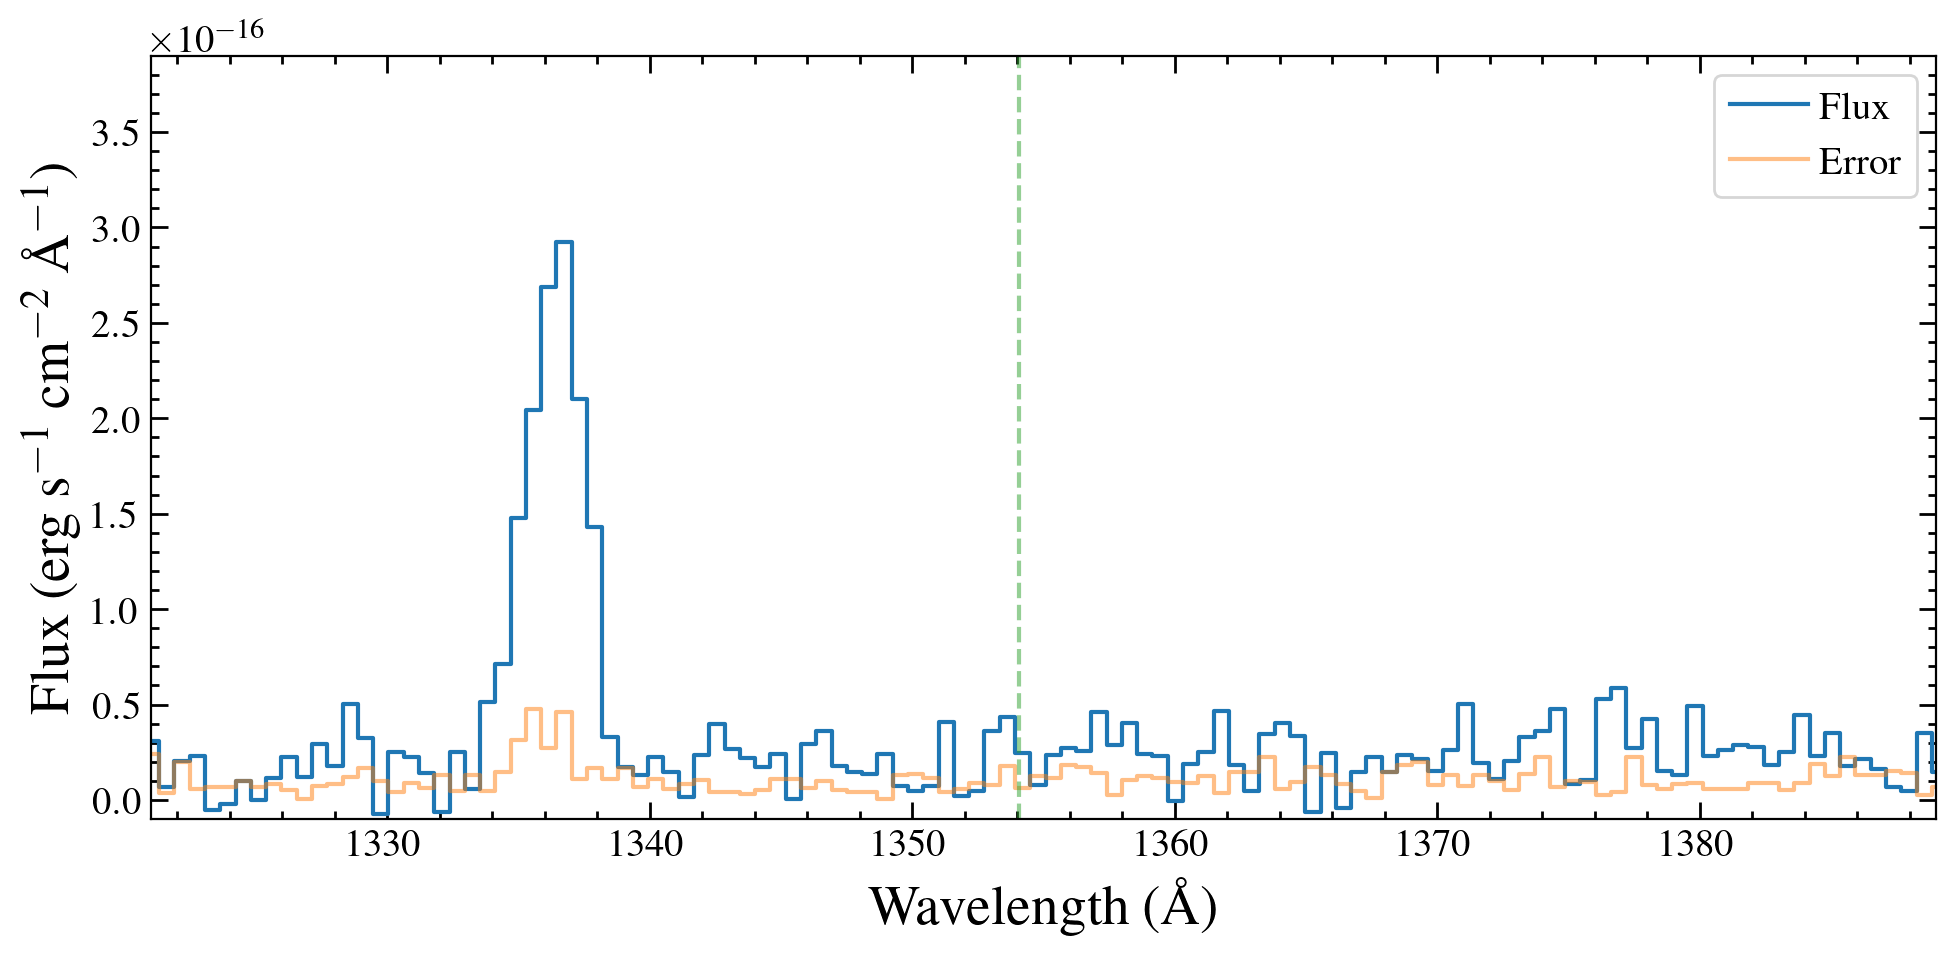

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))

x = hlsp_x1ds[3]

data = fits.getdata(x, 1)
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']

ax.step(w, f, where='mid', label='Flux')
ax.step(w, e, where='mid', label='Error', alpha=0.5)


# ax.set_yscale('log')

ax.axvline(1354.08, c='C2', ls='--', alpha=0.5)

ax.set_ylim(-0.1e-16, 0.39e-15)
ax.set_xlim(1321, 1389)
#
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=True)

ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
ax.set_xlabel('Wavelength (\AA)', size=20)
fig.tight_layout()
fig.savefig('plots/wasp-121_fexxi1354.pdf')

In [43]:
upath = '/media/david/2tb_ext_hd/hddata/meats/misc_data/wasp-121/uves/'
uspecs = glob.glob('{}*.fits'.format(upath))
uspecs

['/media/david/2tb_ext_hd/hddata/meats/misc_data/wasp-121/uves/ADP.2020-06-09T14ː14ː34.198.fits',
 '/media/david/2tb_ext_hd/hddata/meats/misc_data/wasp-121/uves/ADP.2020-06-12T12ː20ː59.323.fits',
 '/media/david/2tb_ext_hd/hddata/meats/misc_data/wasp-121/uves/ADP.2020-06-12T12ː20ː59.628.fits',
 '/media/david/2tb_ext_hd/hddata/meats/misc_data/wasp-121/uves/ADP.2020-06-12T12ː20ː59.759.fits',
 '/media/david/2tb_ext_hd/hddata/meats/misc_data/wasp-121/uves/ADP.2020-06-12T12ː20ː59.847.fits',
 '/media/david/2tb_ext_hd/hddata/meats/misc_data/wasp-121/uves/ADP.2021-09-24T07ː16ː38.181.fits',
 '/media/david/2tb_ext_hd/hddata/meats/misc_data/wasp-121/uves/ADP.2021-09-24T07ː16ː38.869.fits']

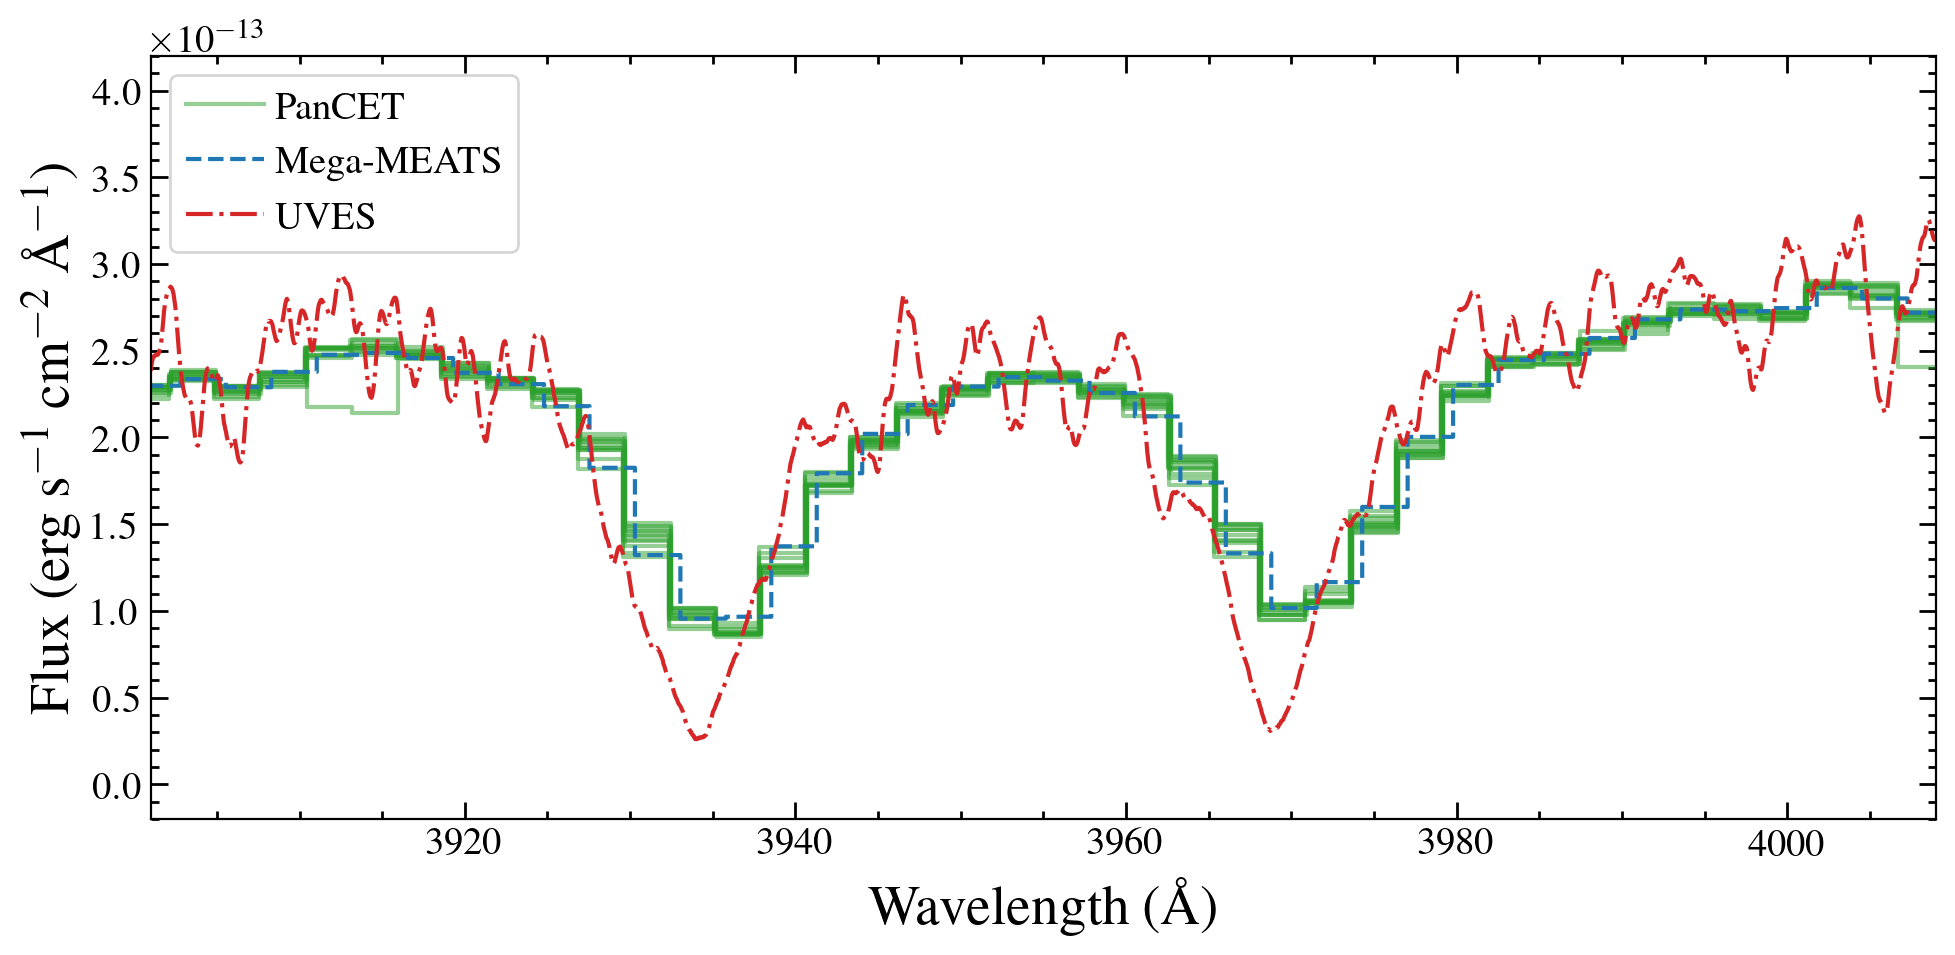

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))

norm_opt = np.median(f_opt)

for i, x in enumerate(g430ls):
    hdr = fits.getheader(x, 0) 
    data = fits.getdata(x, 1)[0]
    w, f , e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
    norm = np.median(f)
    plt.step(w, f, where='mid', c='C2', label='PanCET', alpha =0.5)
#     plt.plot(w_opt, (f_opt/norm_opt), c='k', ls='--')
    root, time = hdr['ROOTNAME'], hdr['TEXPTIME']
#     plt.annotate('{} ({:.0f}\,s)'.format(root, time), (10300, i), xycoords='data', va='bottom')

plt.step(w_opt, f_opt, c='C0', ls='--', where='mid', label='Mega-MEATS')
# plt.step(w_opt2, f_opt2, c='r', ls='--', where='mid')

ax.set_xlim(3901, 4009)


for spec in uspecs[3:4]:
    data =fits.getdata(spec, 1)
    if 'FLUX' in data.names:
        w, f, e= data[0]['WAVE'], data[0]['FLUX']*1e-16, data[0]['ERR']*1e-16
        f = convolve(f,Box1DKernel(100))
        ax.plot(w, f*2.5, c='C3', ls='-.', label='UVES')
    
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
ax.set_xlabel('Wavelength (\AA)', size=20)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=True)


fig.tight_layout()




Lya -scale procyon to distance.

In [45]:
print(hlsp_x1ds)

['draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g430l_v1_component-spec.fits', 'draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_e230m_v1_component-spec.fits', 'draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g750l_v1_component-spec.fits', 'draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits']


Voigt
293.3189866097778 km / s 61.8125504092783
1.8469773113589515e-16


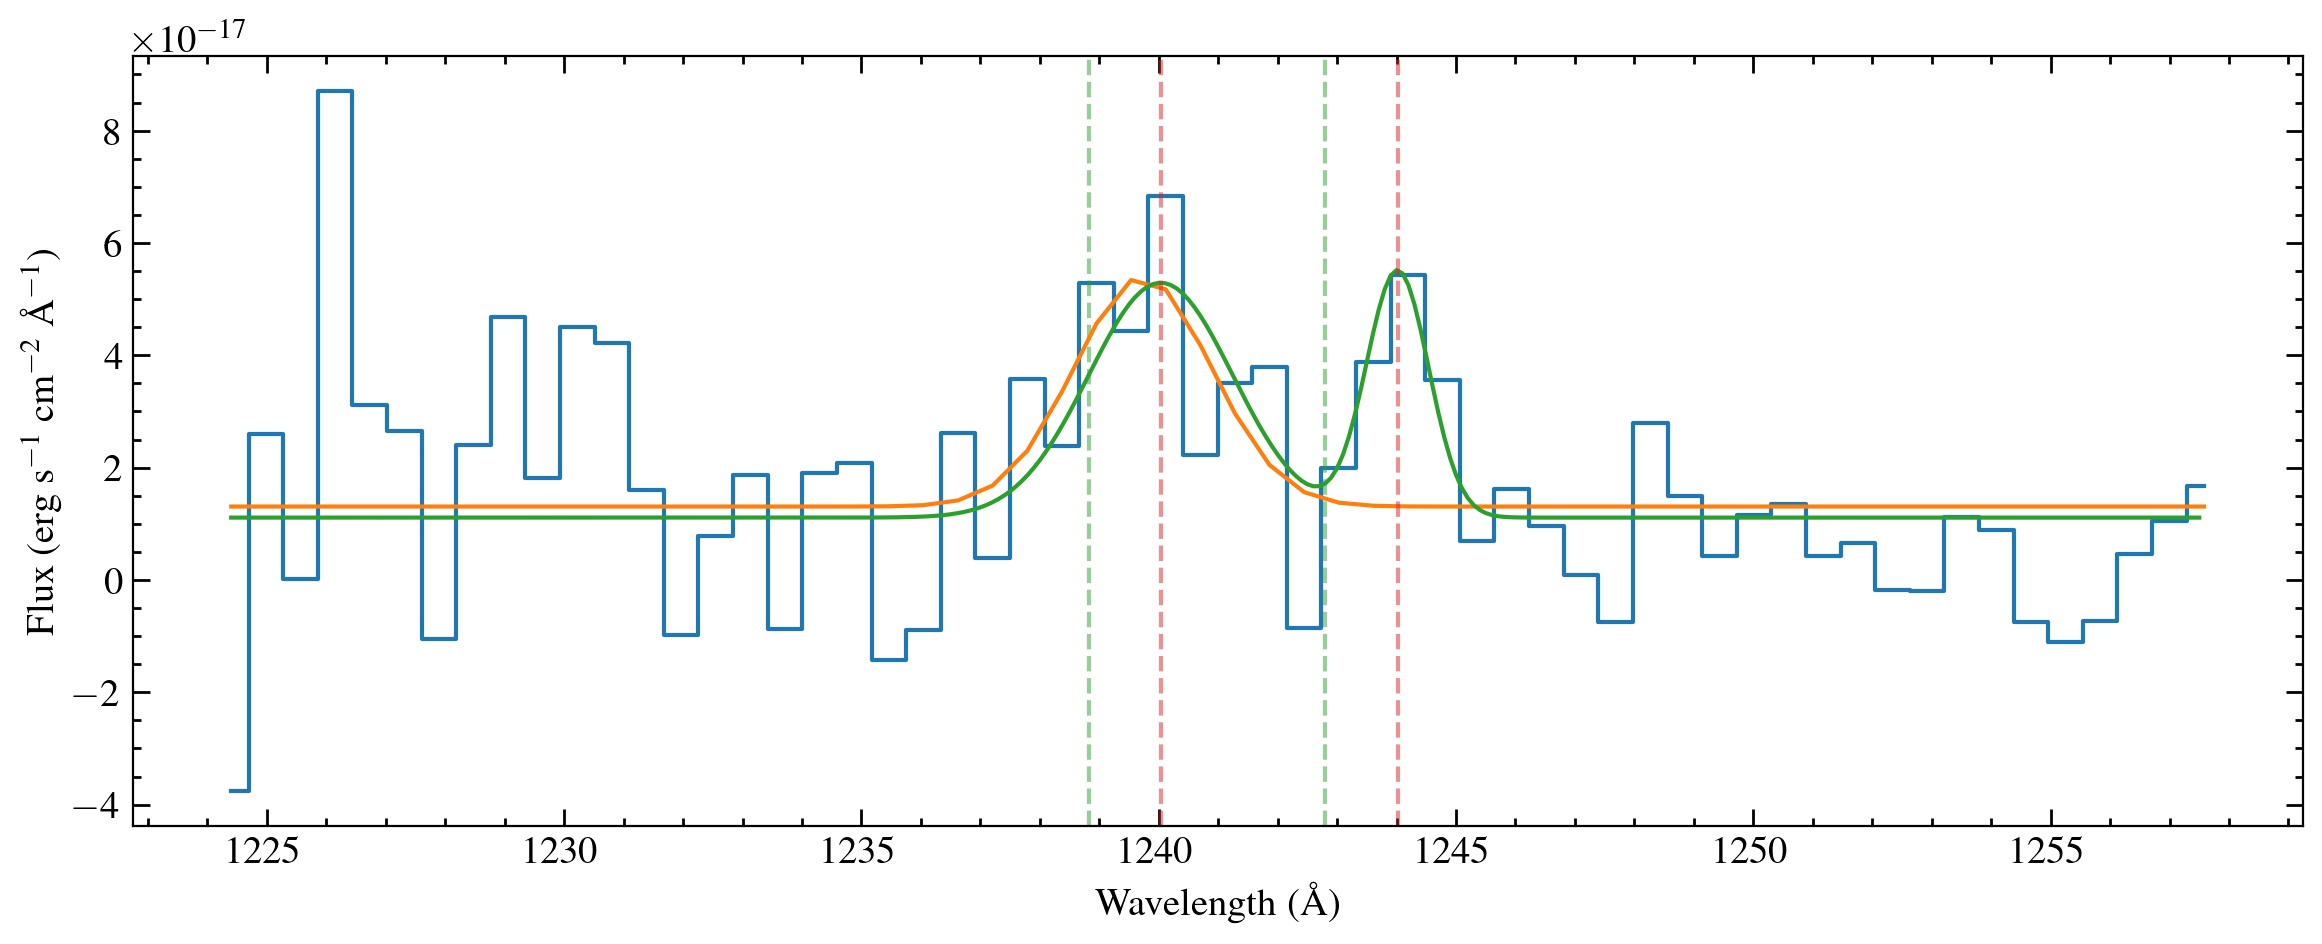

Voigt
267.9343067141248 km / s 51.74099669534458
6.739966249082025e-16


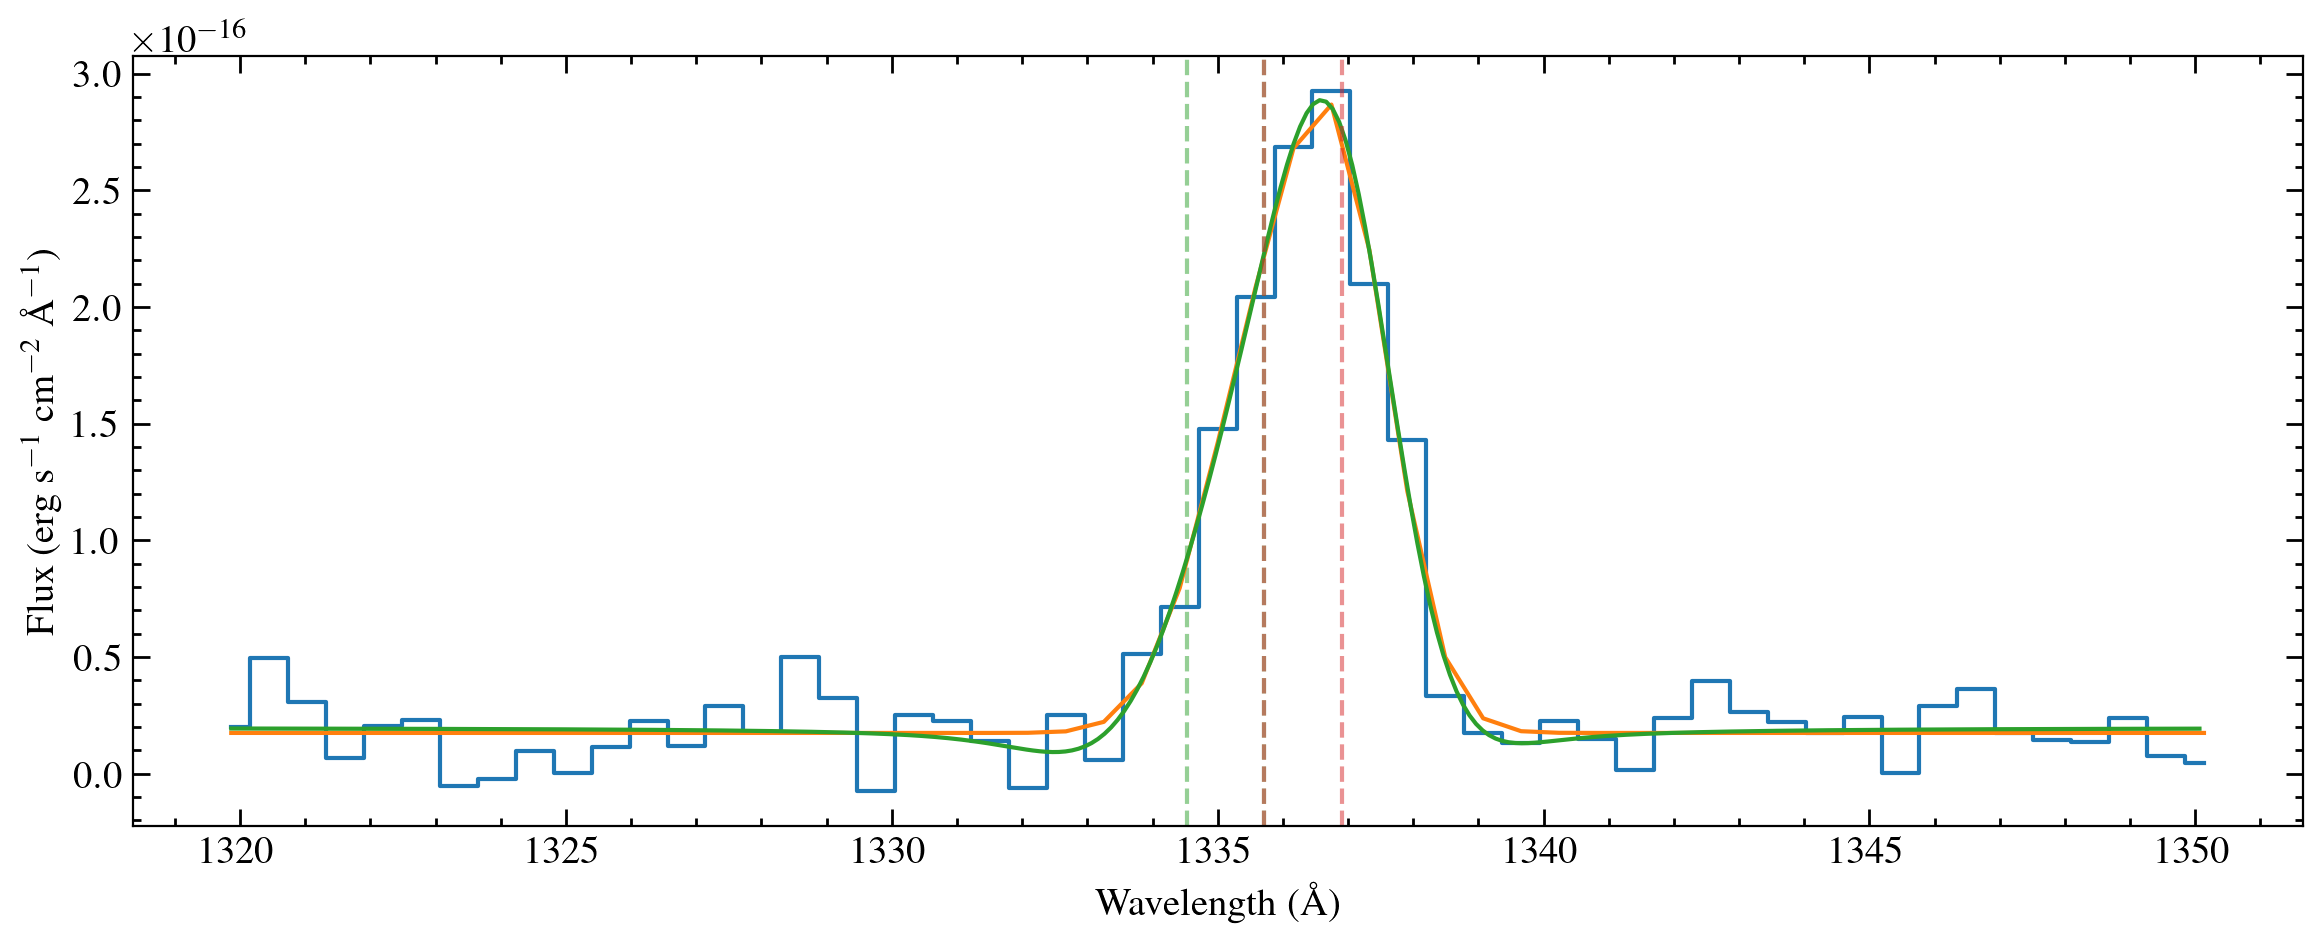

Voigt
239.5133344638659 km / s 17.623966143209913
8.630619580294849e-16


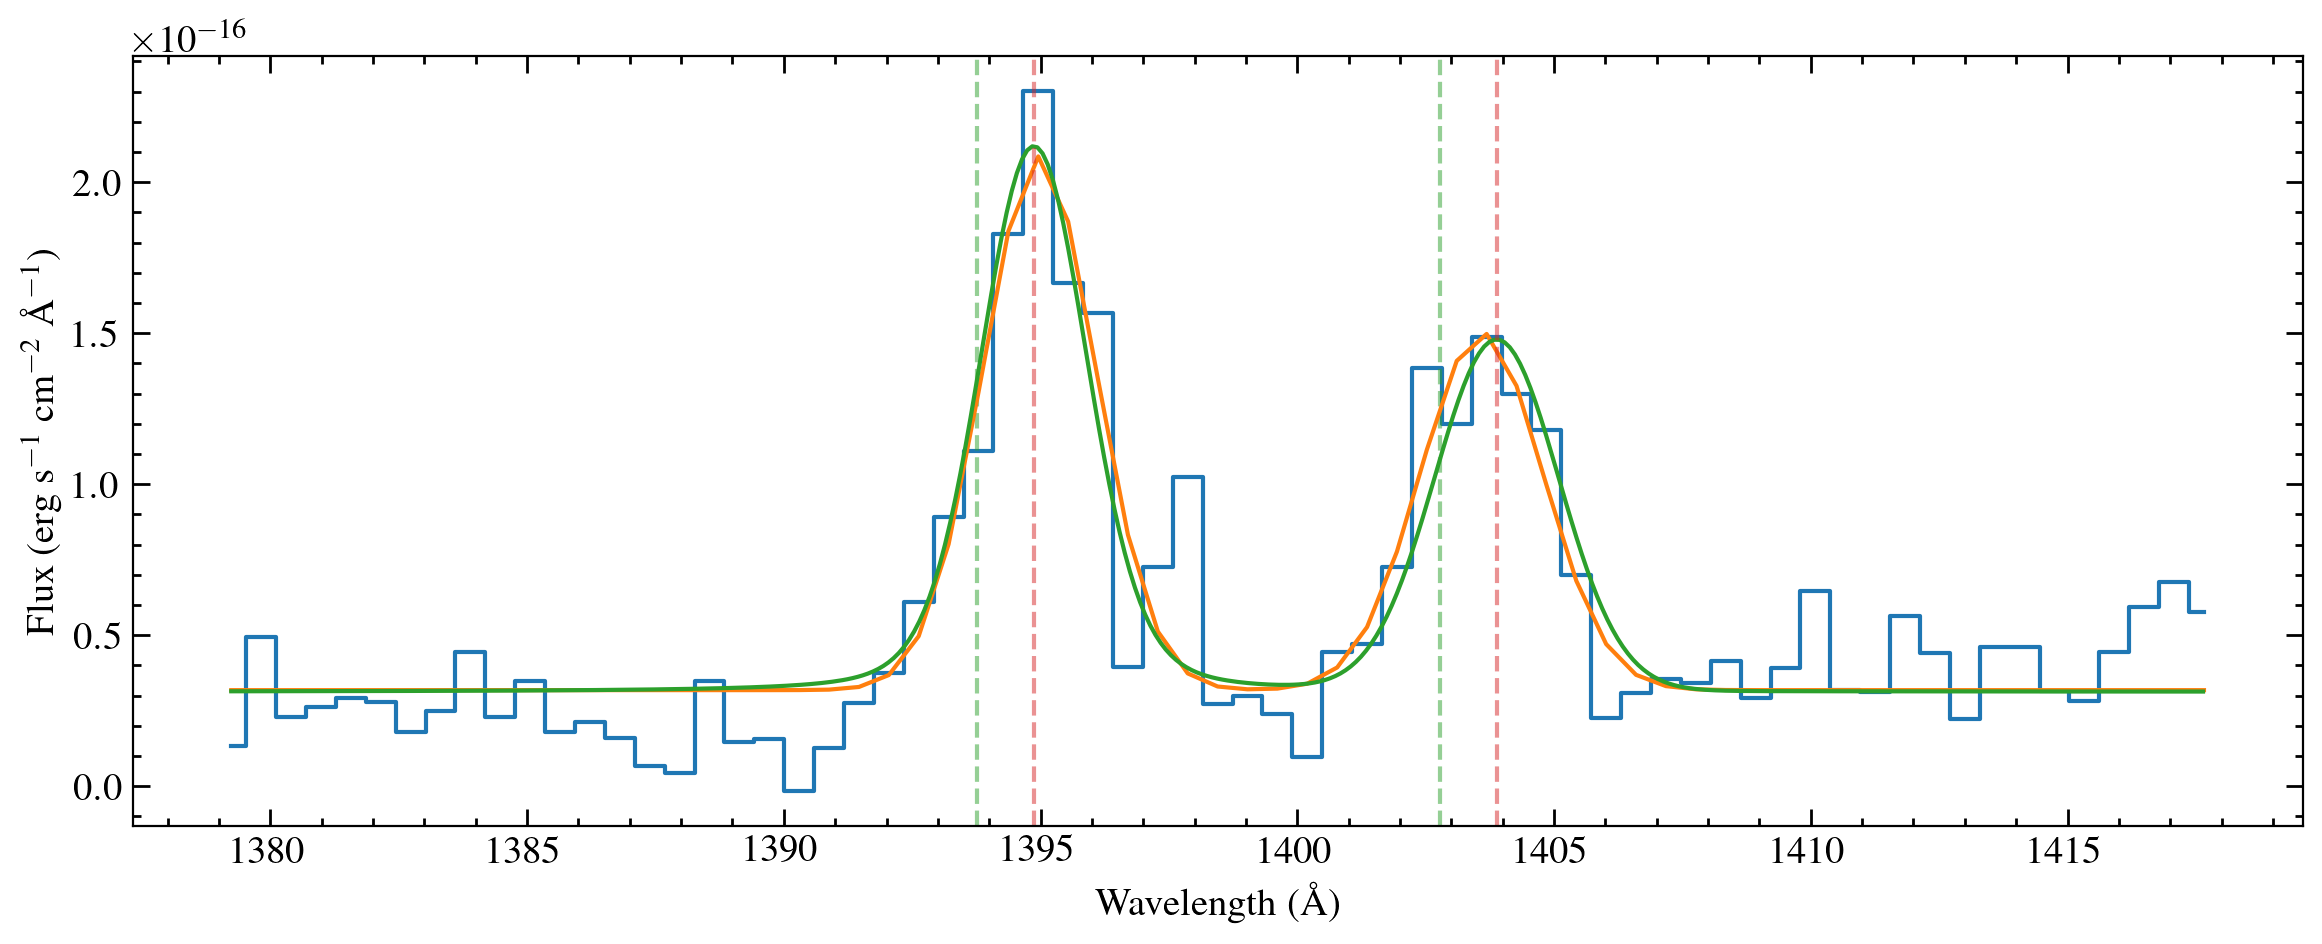

Voigt
213.38645790195451 km / s 18.813251484316396
1.6744774089083435e-15


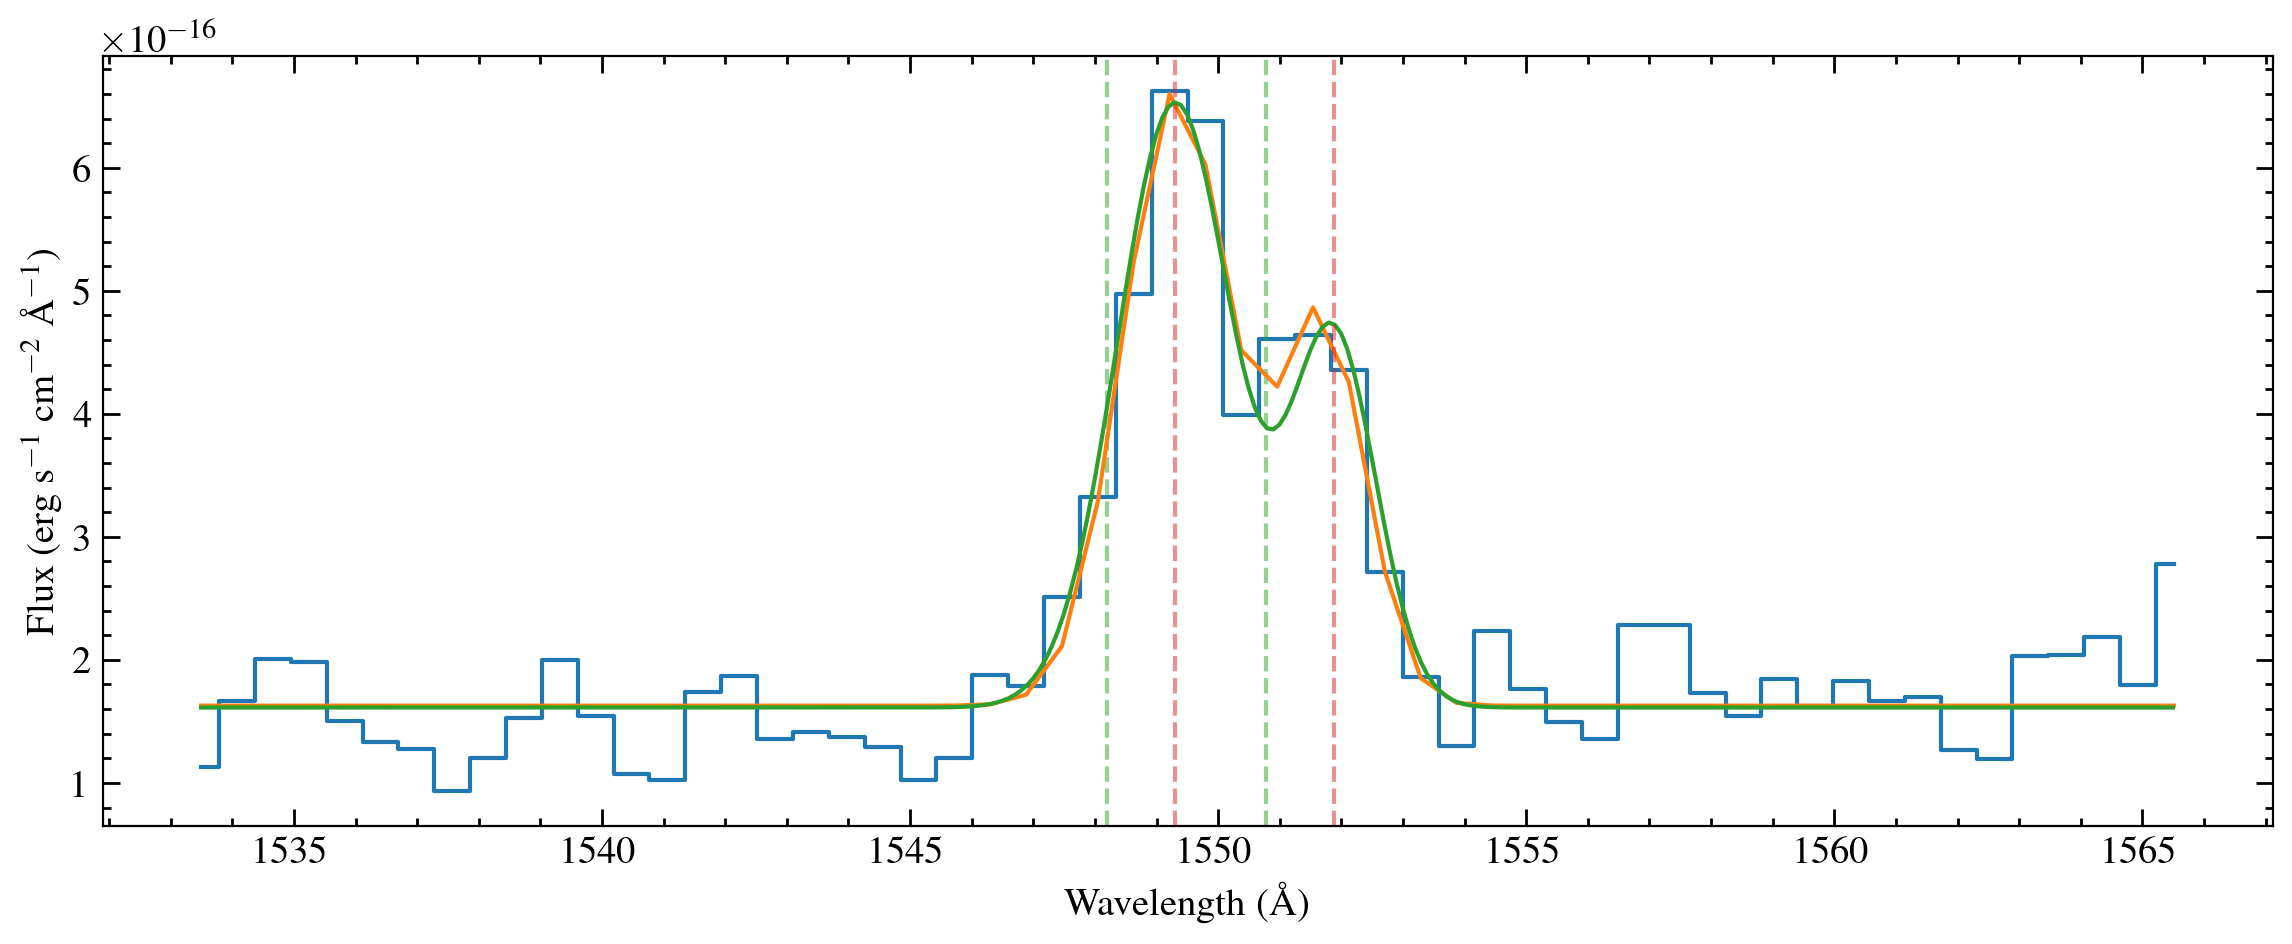

[293.3189866097778, 267.9343067141248, 239.5133344638659, 213.38645790195451] 253.53827142243077 29.99424160822933


In [46]:
#measuring the RV

# import astropy.io.fits as fits
# import matplotlib.pyplot as plt
fitter = fitting.LevMarLSQFitter()

def wavelength_edges(w):
    """
    Calulates w0 and w1
    """
    diff = np.diff(w)
    diff0 = np.concatenate((np.array([diff[0]]), diff)) 
    diff1 = np.concatenate((diff, np.array([diff[-1]]))) 
    w0 = w - diff0/2.
    w1 = w + diff1/2.
    return w0, w1


# lines = [1548.201,1550.772]
space = 15

doublets = np.array([[1238.821, 1242.804],[1334.524,1335.709],[1393.755,1402.77],[1548.201,1550.772]])


data = fits.getdata(hlsp_x1ds[3], 1)
w1, f1 , e1 = data['WAVELENGTH'], data['FLUX'], data['ERROR']

dvs = []

for lines in doublets:

    mask = (w1 > lines[0]-space) & (w1 < lines[-1]+space)
    w, f, e = w1[mask], f1[mask], e1[mask]
    plt.step(w, f, where='mid')
    plt.xlabel('Wavelength (\AA)')
    plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')


    [plt.axvline(line, c = 'C2', ls='--', alpha=0.5) for line in lines]

    gg_init = models.Gaussian1D(2e-13, lines[0], 0.5)+models.Gaussian1D(2e-13, lines[1], 0.5)+models.Const1D(0)
    v_init = models.Voigt1D(x_0=lines[0], amplitude_L=2e-16, fwhm_L=0.5, fwhm_G=0.5)+ \
    models.Voigt1D(x_0=lines[1], amplitude_L=2e-16, fwhm_L=0.5, fwhm_G=0.5)+models.Const1D(0)#, fixed = dict(amplitude=True))

    def tiedfunc1(mod):
            x_0 = mod.x_0_0.value+np.diff(lines)
            # fwhm_G = mod.fwhm_G_1.value
            return x_0

    v_init.x_0_1.tied=tiedfunc1

    gg_fit = fitter(gg_init, w, f, maxiter=100000)
    v_fit = fitter(v_init, w, f, maxiter=100000)
    v_fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
    # print(gg_fit)
    # print(v_fit)
    # print(v_fit_e)

    # print('Gaussian')
    # obs_lam = np.array([gg_fit[0].mean.value, gg_fit[1].mean.value])
    # dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines*u.AA))
    # print(dv)
    # print(np.mean(dv))


    print('Voigt')
    # obs_lam = np.array([v_fit[0].x_0.value, v_fit[1].x_0.value])
    # print(np.diff(obs_lam), np.diff(lines))
    obs_lam = v_fit[0].x_0.value
    dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA))

    dv_e =  np.mean([abs(dv.value -((obs_lam+v_fit_e[0])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value),
                    abs(dv.value -((obs_lam-v_fit_e[0])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value)])

    print(dv, dv_e)
    
    dvs.append(dv.value)


    # print(np.mean(dv))

    plt.plot(w, gg_fit(w))
    w_plot = np.arange(w[0], w[-1],0.1)
    plt.plot(w_plot, v_fit(w_plot))    

    line_width = 3
    for line in lines:
        obs_line = dv.to(u.AA,  equivalencies=u.doppler_optical(line*u.AA)).value
        plt.axvline(obs_line, c='C3', ls='--', alpha=0.5)
        
    linef = np.trapz(v_fit(w_plot), w_plot)
    contf = np.trapz(v_fit[2](w_plot), w_plot)
    print(linef-contf)




    plt.show()

# print(v_fit)

print(dvs, np.mean(dvs), np.std(dvs))

8.378493825105031e-05


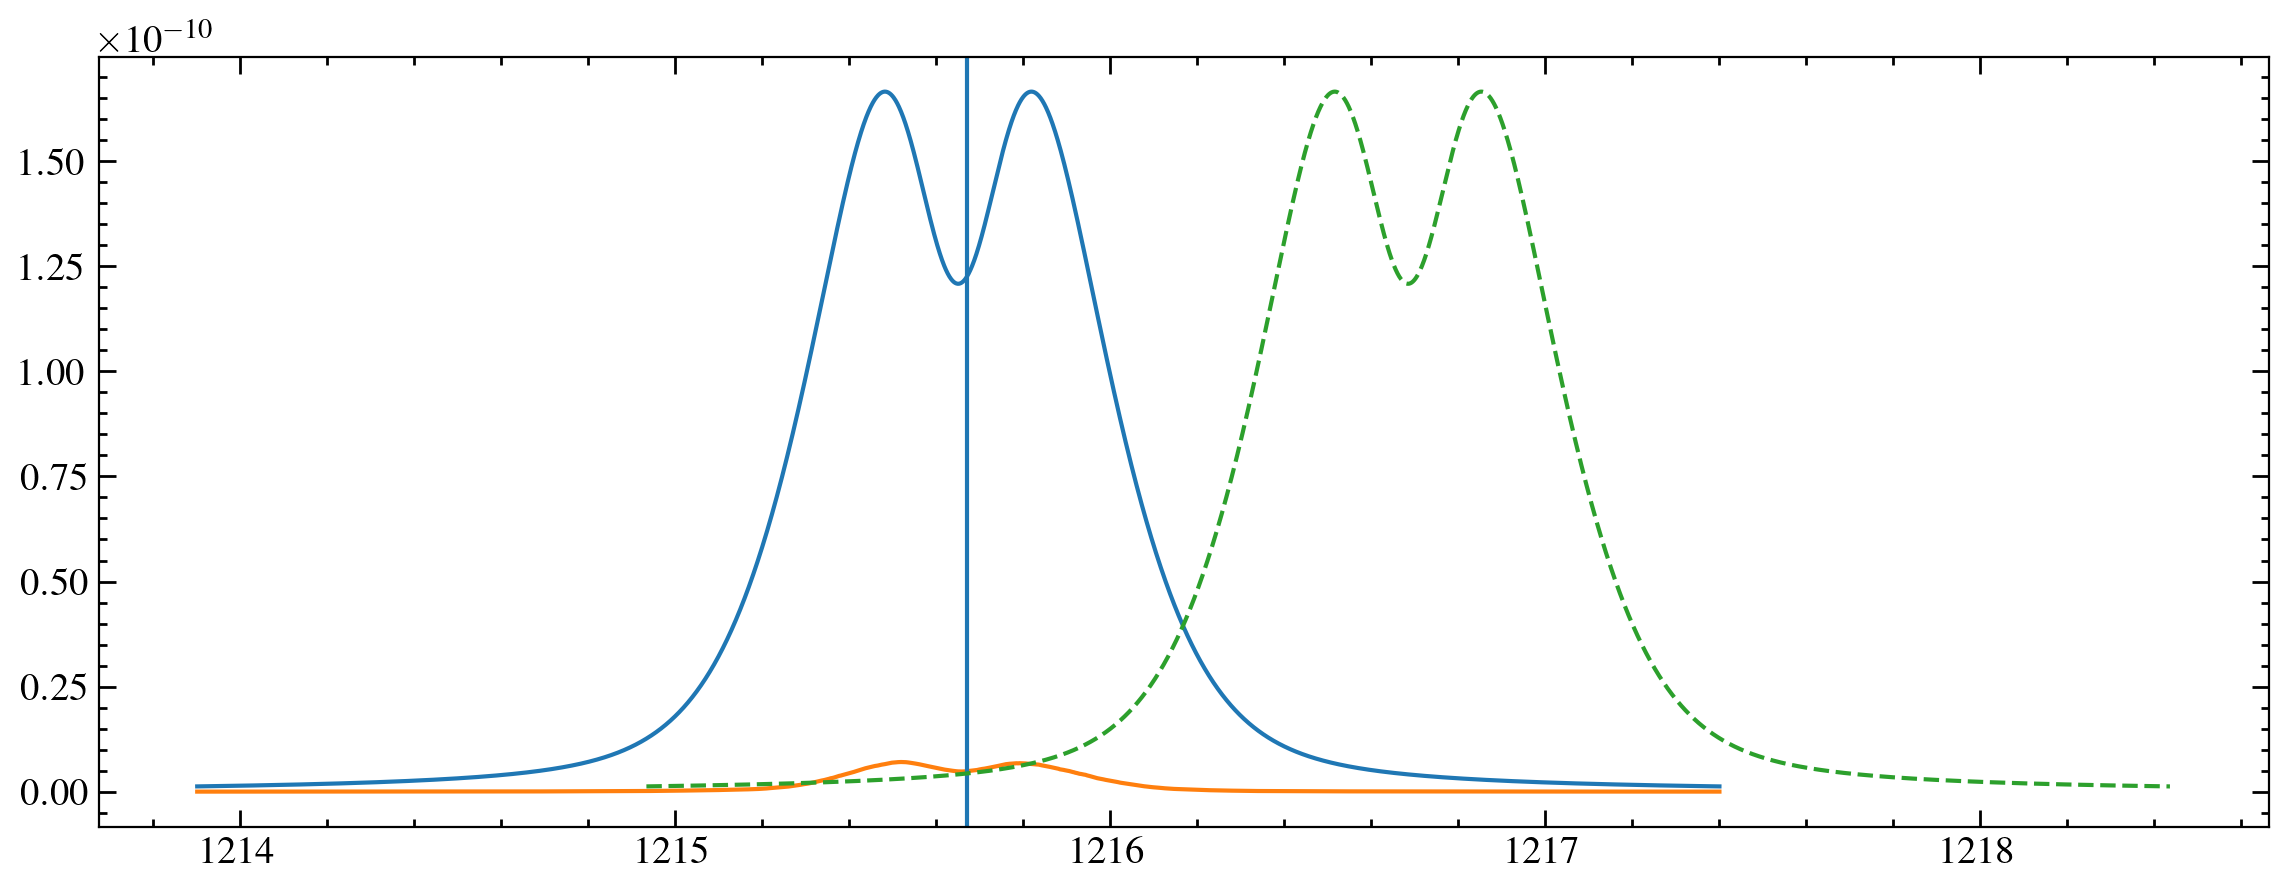

(-1e-15, 1e-15)

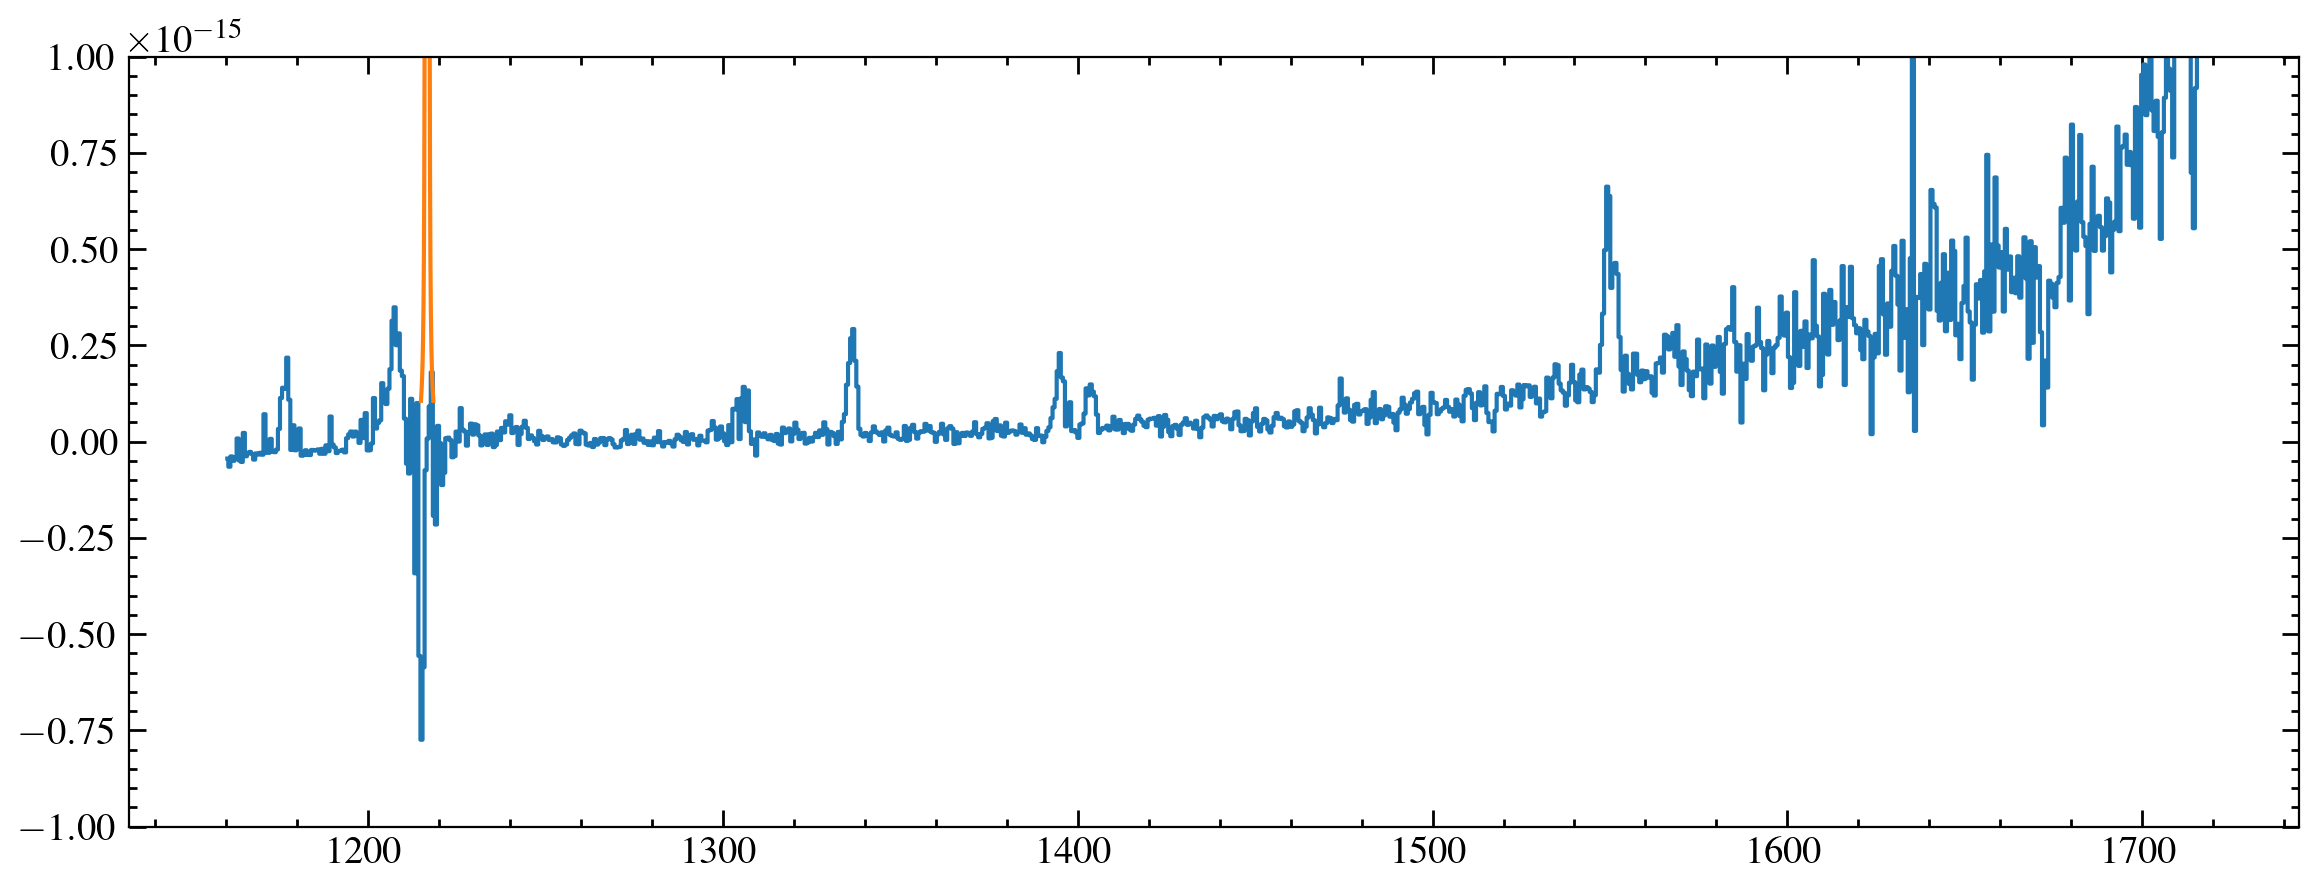

In [47]:
lyapath = '/media/david/2tb_ext_hd/hddata/meats/lya/wasp-121/'
lya_pro =np.load('{}STIS_LyAR_Update.npz'.format(lyapath))
wp, fp, ep = lya_pro['WAV'], lya_pro['FLX'],  lya_pro['ERR']
plt.plot(wp, fp, wp, ep)
plt.axvline(1215.67)

dp = 1000/285.93
rp = 2.048
radius = 1.458
distance = 272.01
scale = ((radius/rp)**2) * ((dp/distance)**2)
print(scale)

v_121 = 250
v_p = -5
v_shift = v_121 - v_p 

wn = (v_shift*u.km/u.s).to(u.AA,  equivalencies=u.doppler_optical(wp*u.AA))
plt.plot(wn, fp, ls='--')

plt.show()

data = fits.getdata(hlsp_x1ds[3], 1)
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']

mask = w > 1160
plt.step(w[mask], f[mask], where='mid')
        
plt.plot(wn, fp*scale)

# plt.xlim(1200, 1230)
plt.ylim(-1e-15, 1e-15)


In [48]:
# savdat = Table([wn, fp*scale, ep*scale], names=['WAVELENGTH', 'FLUX', 'ERROR'])
# savdat.write('models/wasp-121_lya.ecsv', format='ascii.ecsv', overwrite=True)

In [49]:
import prepare_model
importlib.reload(prepare_model)

<module 'prepare_model' from '/home/david/work/meats/SEDs/prepare_model.py'>

In [50]:
savepath

'draft_hlsp/wasp-121/'

In [51]:
# hdr = fits.getheader(hlsp_x1ds[4])
# sed_data = Table(meta=hdr)
# prepare_model.make_model_spectrum('models/wasp-121_lya.ecsv', 1, sed_data ,savepath = savepath, save_ecsv=False, save_fits=True, normfac=1.0, model_name='LYA')


In [52]:
#scaling phx model by 1.14 as better fit to data 

# prepare_model.make_model_spectrum('models/wasp-121_phoenix_interpolated.ecsv', 1, sed_data ,
#                                   savepath = savepath, save_ecsv=False, save_fits=True, normfac=normfac.value*1.14, model_name='PHX')


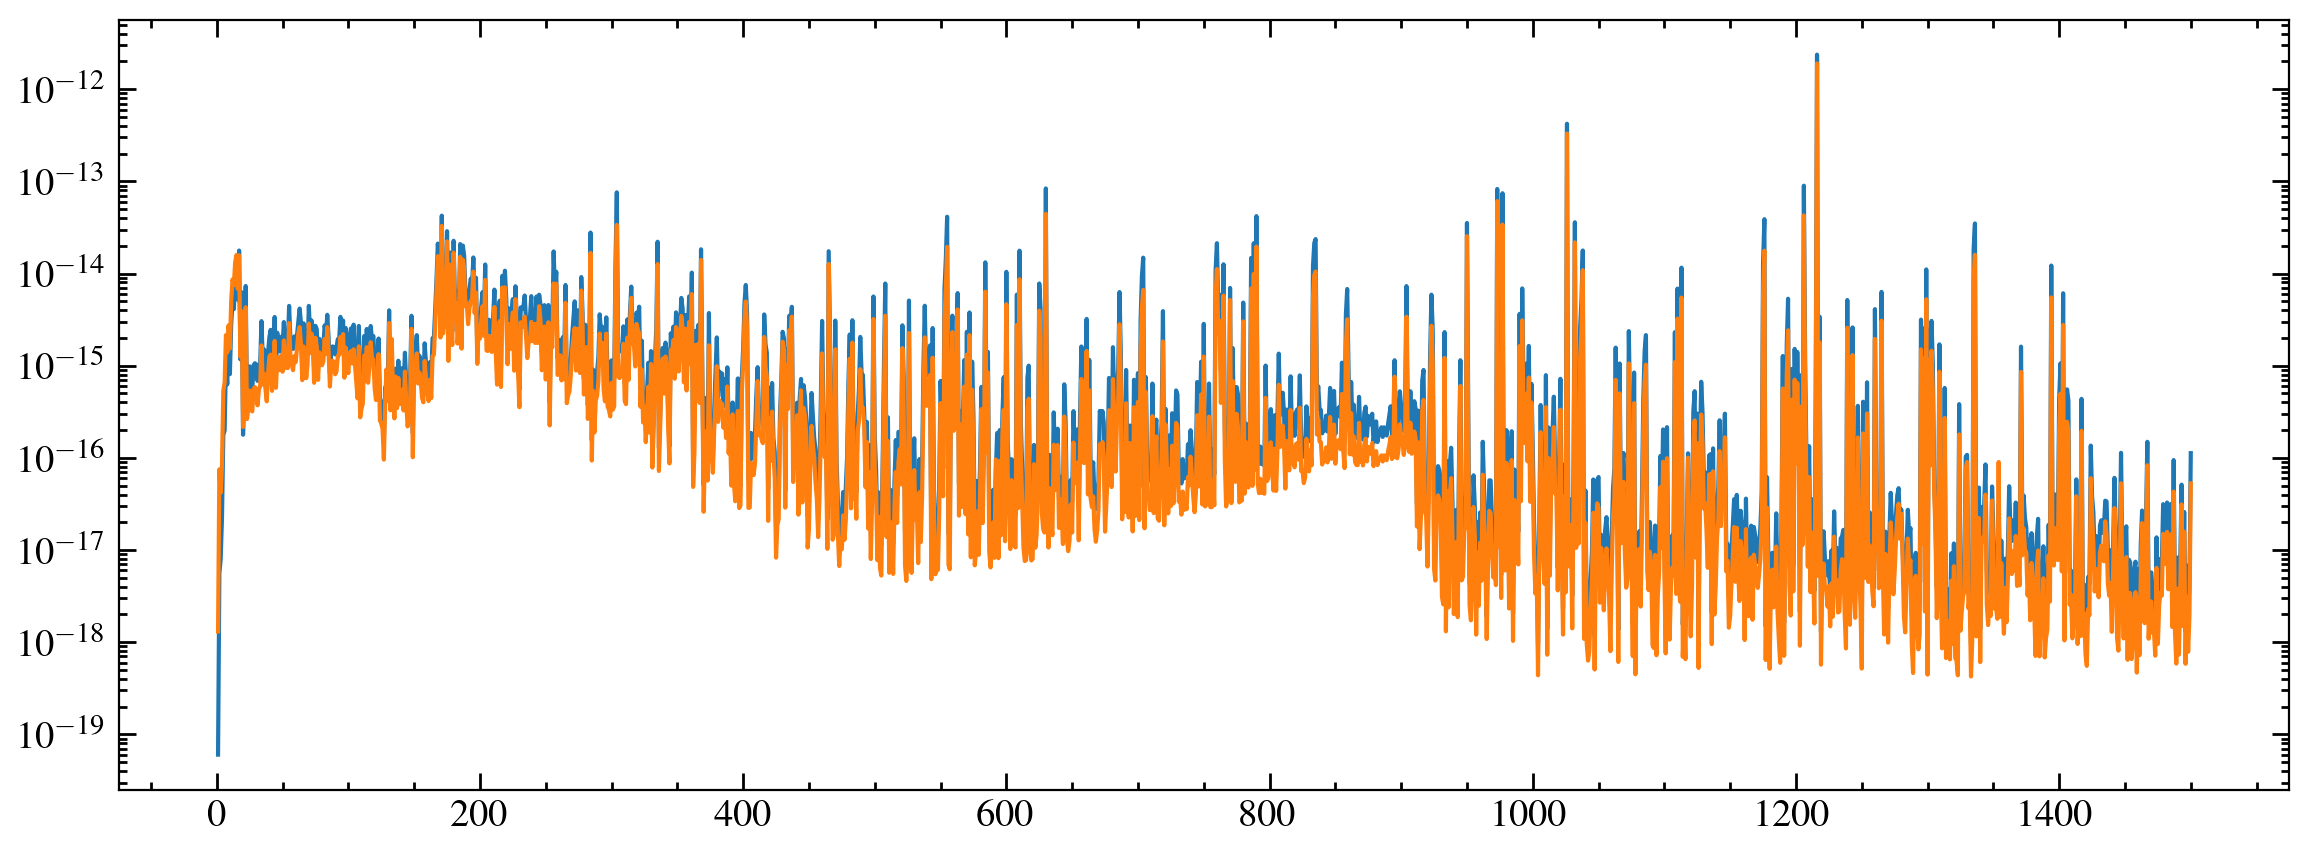

In [53]:
#dem
dempath = '/media/david/2tb_ext_hd/hddata/meats/dems/wasp-121/fifth_nofe21.fits'
dem = fits.getdata(dempath, 1)

dw, df= dem['Wavelength'], dem['Flux_density']
eu, el = dem['Upper_Error_84'], dem['Lower_Error_16']


mean_e = np.mean([eu, el], axis=0)
# plt.plot(dw, mean_e)
# plt.yscale('log')

log_mean_e = (eu - el) / (np.log(eu)- np.log(el))

plt.plot(dw, df)
plt.plot(dw, log_mean_e)
# plt.plot(dw, mean_e)

plt.yscale('log')

demtab = Table([dw, df, log_mean_e], names=['WAVELENGTH', 'FLUX', 'ERROR'])
demtab.write('models/wasp-121_dem.ecsv', overwrite=True)

In [54]:
# prepare_model.make_model_spectrum('models/wasp-121_dem.ecsv', 1, sed_data ,savepath = savepath, save_ecsv=False, save_fits=True, normfac=1, model_name='dem')


In [55]:
import prepare_xmm
# importlib.reload(prepare_xmm)

In [56]:
# xpath = '/media/david/2tb_ext_hd/hddata/meats/xmm/wasp-121/Wasp-121.fits'

# xfits = fits.open(xpath)
# hdr = xfits[0].header
# hdr

In [57]:
# hdr.append(('mos1_FILTER', 'Medium'))
# hdr.append(('mos2_FILTER', 'Medium'))
# hdr.append(('pn_FILTER', 'Medium'))
# hdr.append(('pn_DURATION', 9000))
# hdr.append(('pn_DATE-OBS', '2017-04-06T04:23:45'))
# hdr.append(('pn_DATE-END','2017-04-06T06:53:45' ))
# hdr.append(('OBS_ID', '0804790601'))

In [58]:
# hdr

In [59]:
# xfits.writeto('/media/david/2tb_ext_hd/hddata/meats/xmm/wasp-121/wasp-121_corr_djw.fits', overwrite=True)

In [60]:

# xmm_path = '/media/david/2tb_ext_hd/hddata/meats/xmm/wasp-121/wasp-121_corr_djw.fits'

# hlsp = dict(Table.read('meats_hlsp_info.csv'))
# # hlsp = np.genfromtxt('meats_hlsp_info.csv', delimiter=',', dtype=None, names=True)
# # xmm_path = xpath
# version = 1

# prepare_xmm.make_xmm_spectra(xmm_path, savepath, version, hlsp, apec_repo='models/', make_apec=True, save_ecsv=False, save_fits=True)

In [61]:
# xray = Table.read('models/wasp-121apec.txt', format='ascii.basic')
# plt.plot(xray['WAVELENGTH'], xray['FLUX'])
# plt.yscale('log')

# xray = Table.read('models/WASP-121_apec_errs.ecsv')
# plt.plot(xray['WAVELENGTH'], xray['FLUX'])
# plt.plot(xray['WAVELENGTH'], xray['ERROR'])
# prepare_model.make_model_spectrum('models/WASP-121_apec_errs.ecsv', 1, sed_data ,savepath = savepath, save_ecsv=False, save_fits=True, normfac=1.0, model_name='apec')


draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g430l_v1_component-spec.fits 1.0
draft_hlsp/wasp-121/hlsp_muscles_model_lya_wasp-121_na_v1_component-spec.fits 1.0
draft_hlsp/wasp-121/hlsp_muscles_model_dem_wasp-121_na_v1_component-spec.fits 1
draft_hlsp/wasp-121/hlsp_muscles_xmm_epic_wasp-121_na_v1_component-spec.fits 1.0
draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_e230m_v1_component-spec.fits 1.0
draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g750l_v1_component-spec.fits 1.0
draft_hlsp/wasp-121/hlsp_muscles_model_apec_wasp-121_na_v1_component-spec.fits 1.0
draft_hlsp/wasp-121/hlsp_muscles_model_phx_wasp-121_na_v1_component-spec.fits 1.66491886652677e-20
draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits 1.0


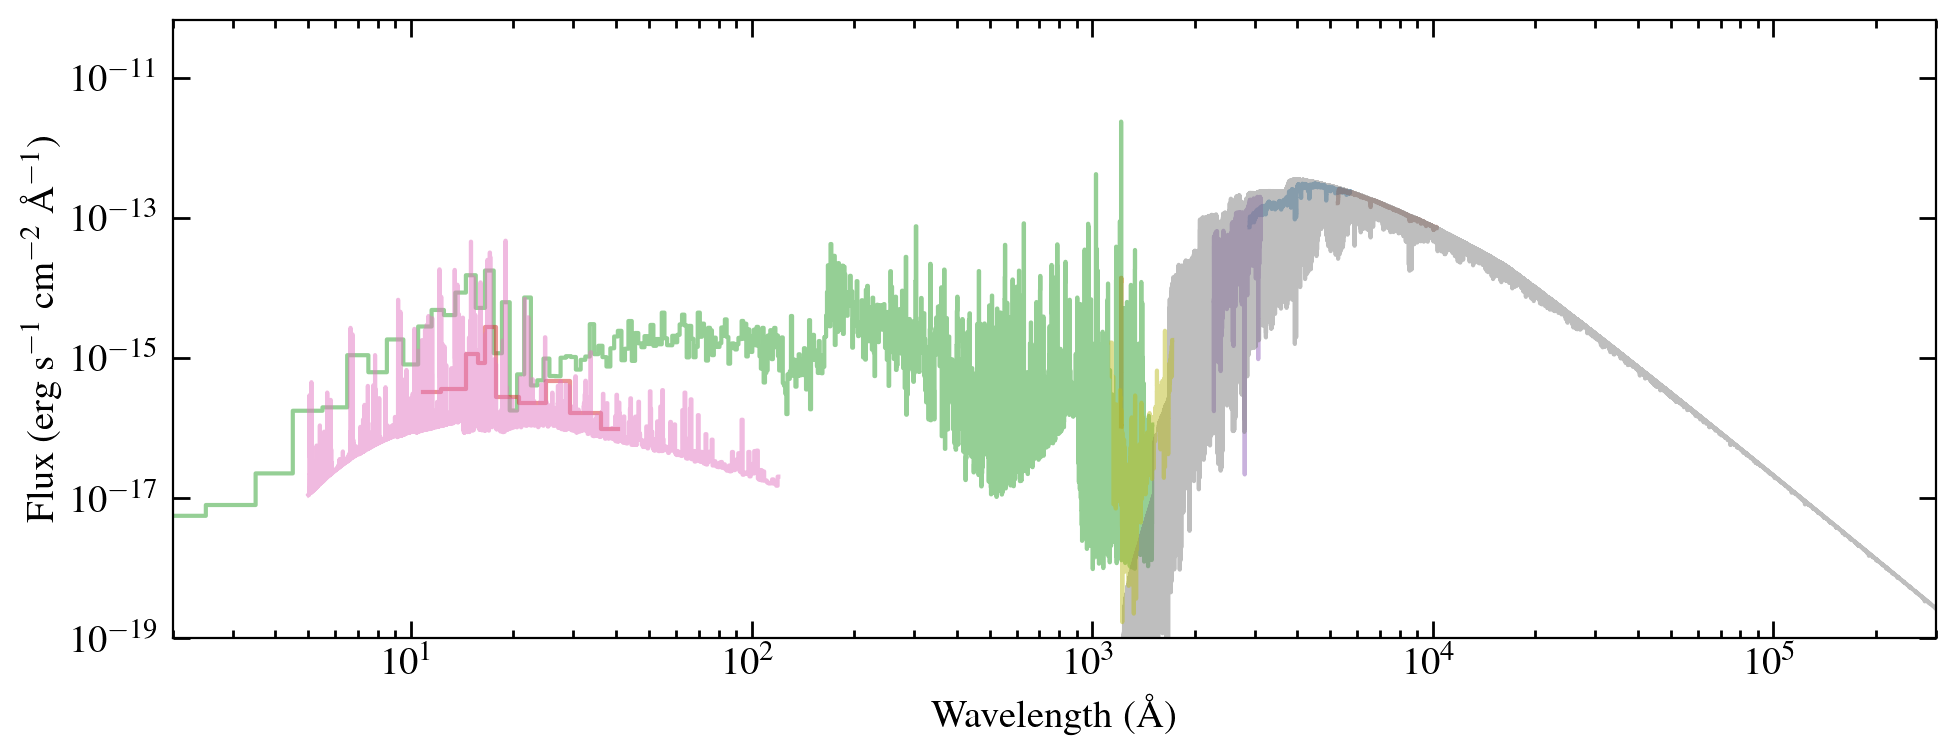

In [62]:
fig, ax=plt.subplots(figsize=(10,4))

all_hlsp = glob.glob('draft_hlsp/wasp-121/*v1*.fits')

for x in all_hlsp:
    if 'multi_multi' not in x:
        data = fits.getdata(x, 1)
        w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
        norm = fits.getheader(x, 0)['NORMFAC']
        print(x, norm)
        plt.step(w[f >0], f[f >0]*norm, where='mid', alpha=0.5)

    
plt.yscale('log')
plt.xscale('log')

plt.ylim(1e-19)
plt.xlim(2, 3e5)


plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
fig.tight_layout()

fig.savefig('plots/wasp-121_all_components.pdf')

In [63]:
fits.getheader(x, 0)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'HST     '                                                            
INSTRUME= 'STIS    '                                                            
GRATING = 'G140L   '                                                            
APERTURE= '52X0.2  '                                                            
TARGNAME= 'WASP-121'                                                            
RA_TARG =       107.6002227085                                                  
DEC_TARG=      -39.09721845818                                                  
PROPOSID=                16701                                                  
HLSPNAME= 'MUSCLES Extension

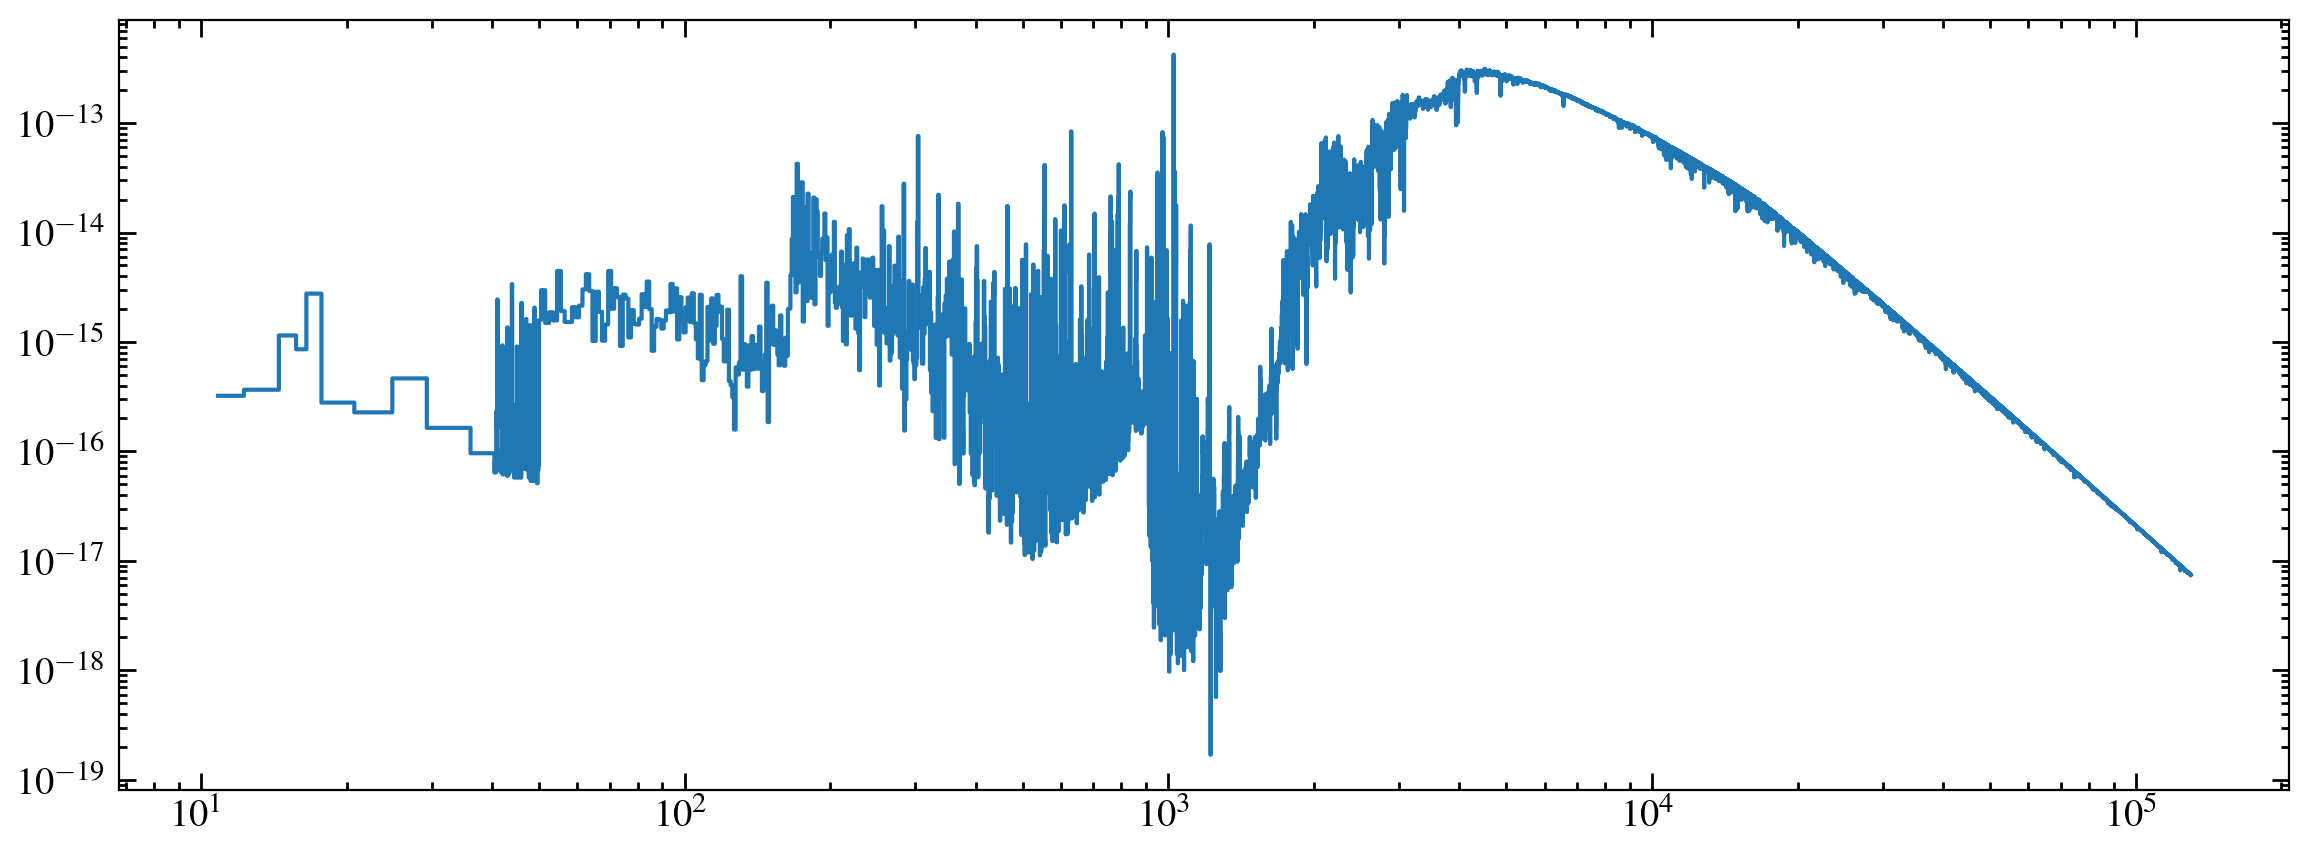

In [64]:
data = fits.getdata('draft_hlsp/wasp-121/hlsp_muscles_multi_multi_wasp-121_broadband_v1_adapt-const-res-sed.fits', 1)
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
plt.step(w, f, where='mid')

plt.yscale('log')
plt.xscale('log')

# print(w[f==0])

In [69]:
# tex = plt.rcParams["text.usetex"]

# # plt.rcParams.update({"text.usetex": False})


# with plt.xkcd():
#     fig, ax = plt.subplots()
#     ax.step(w, f, where='mid')
#     ax.set_yscale('log')
#     ax.set_xscale('log')
    
#     ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
#     ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ $\mathrm{\AA}^{-1}$)')
#     fig.tight_layout()
    
    
# plt.rcParams.update({"text.usetex": True})

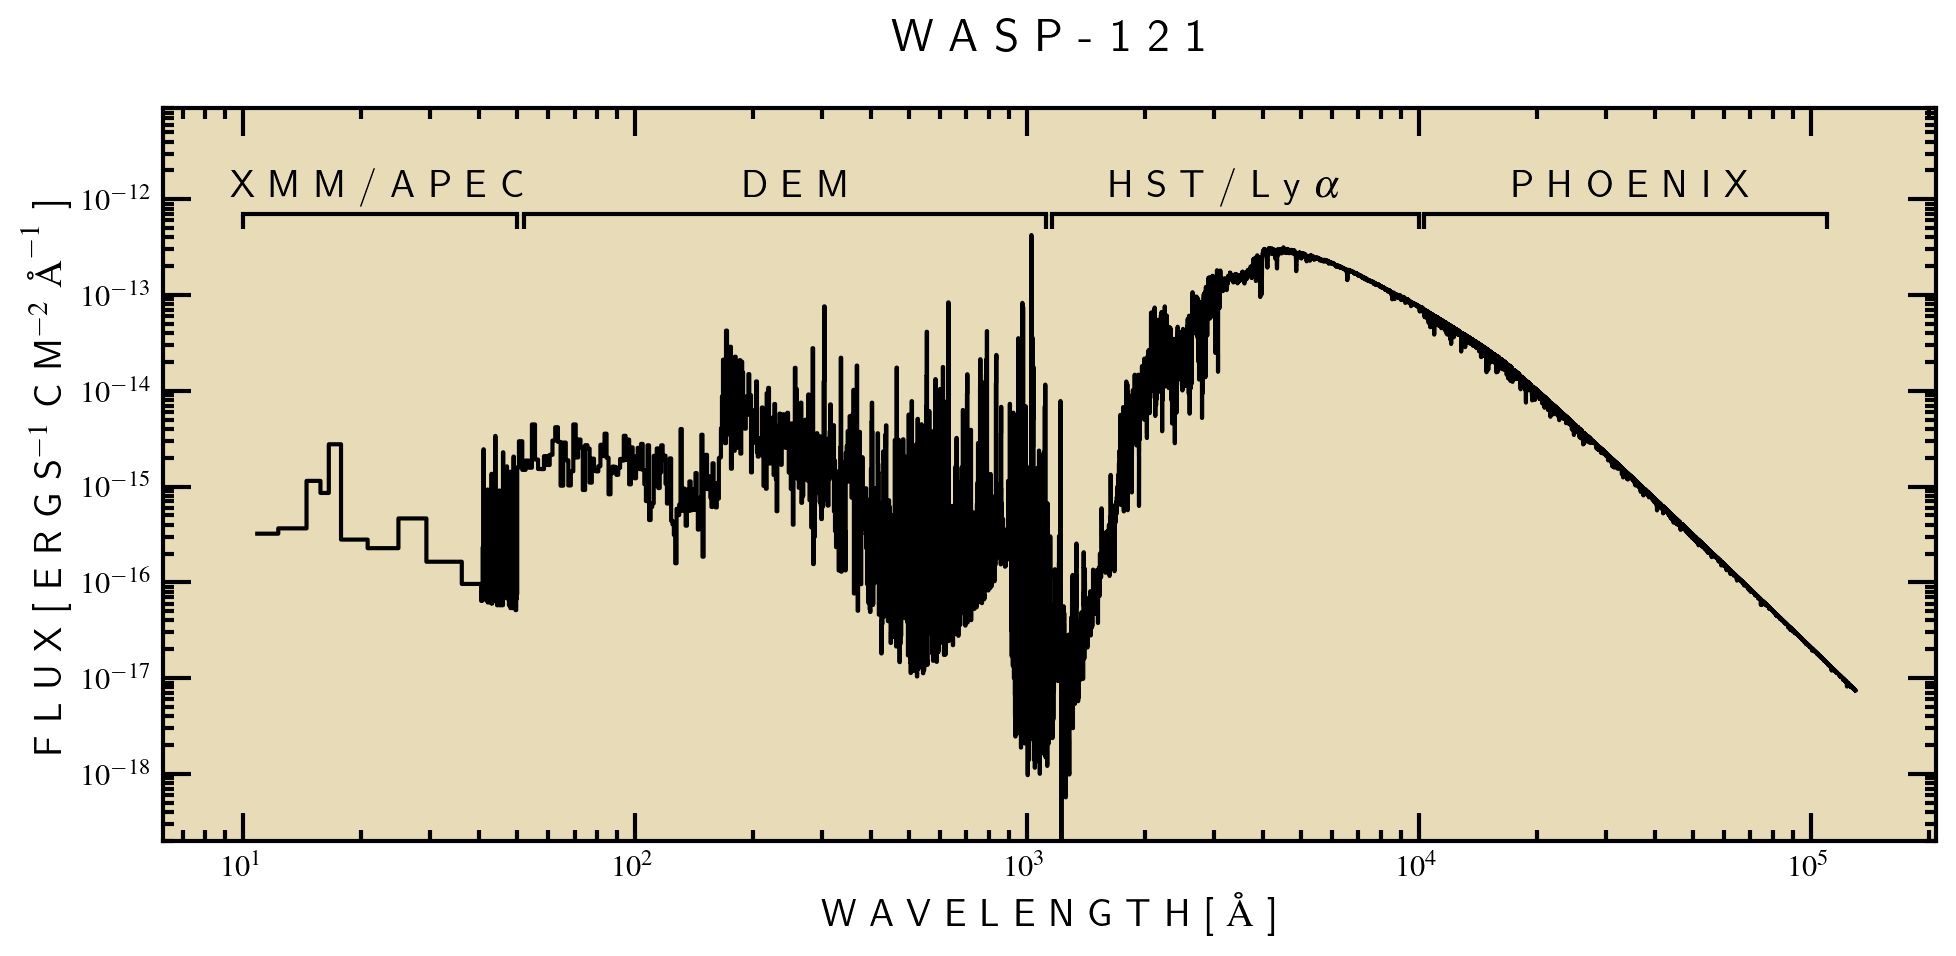

In [157]:
from functools import partial
from random import gauss, randrange
from PIL import Image, ImageFilter

def add_noise_to_image(im, perc=20, blur=0.5):
    gaussian = partial(gauss, 0.50, 0.02)
    width, height = im.size
    for _ in range(width*height * perc // 100):
        noise = int(gaussian() * 255)
        x, y = randrange(width), randrange(height)
        r, g, b, a = im.getpixel((x, y))
        im.putpixel((x, y),
                    (min(r+noise, 255), min(g+noise, 255), min(b+noise, 255)))

    im = im.filter(ImageFilter.GaussianBlur(blur))
    return im


plt.style.use('/home/david/work/misc/old-style.mplstyle')



from matplotlib import font_manager
plt.rcParams["font.family"] = "sans-serif"

fig, ax = plt.subplots(figsize=(10, 5))
ax.step(w, f, where='mid', c='k')
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel(' '.join('WAVELENGTH')+' [ $\mathrm{\AA}$ ]')
ax.set_ylabel('F L U X [ E R G S$^{-1}$ C M$^{-2}$ $\mathrm{\AA}^{-1}$ ]')
ax.set_title(' '.join('WASP-121'))

labely = 7e-13
efac = 0.3
labelfac = 1.5

ax.errorbar(np.array([10,50]),np.array([labely, labely]), yerr= [[efac*labely,efac*labely],[0,0]], c ='k')
ax.annotate(' '.join('XMM/APEC'), (22, labelfac*labely),  ha='center')

ax.errorbar(np.array([52,1120]),np.array([labely, labely]), yerr= [[efac*labely,efac*labely],[0,0]], c ='k')
ax.annotate(' '.join('DEM'), (190, labelfac*labely))

ax.errorbar(np.array([1160, 10000]),np.array([labely, labely]), yerr= [[efac*labely,efac*labely],[0,0]], c ='k')
ax.annotate((' '.join('HST/Ly')+ r' $\alpha$'), (3200, labelfac*labely), ha='center')

ax.errorbar(np.array([10300,  110000]),np.array([labely, labely]), yerr= [[efac*labely,efac*labely],[0,0]], c ='k')
ax.annotate(' '.join('PHOENIX'), (35000, labelfac*labely), ha='center')





ax.set_facecolor('#E8DCB8')

ax.set_ylim(2e-19, 9e-12)

fig.tight_layout()


fig.savefig('plots/old_wasp-121.png', dpi=100, facecolor='#E8DCB8')






im = Image.open('plots/old_wasp-121.png')
im = add_noise_to_image(im, 5)
im.save('plots/old_wasp-121_noise.png')
im.show()


In [ ]:
# ax.plot((6.5,120),(labely, labely), c ='k')
# ax.annotate('XMM/APEC', (30, labelfac*labely),  ha='center')

# #     plt.errorbar((123,1120),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='C0')
# ax.plot((124,1120),(labely, labely), c ='k')
# ax.annotate('DEM', (250, labelfac*labely))

# #     plt.errorbar((1160, 4200),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='C0')
# ax.plot((1160, 5600),(labely, labely), c ='k')
# ax.annotate(r'HST/Ly$\alpha$', (2300, labelfac*labely), ha='center')

# #     plt.errorbar((4301,  53000),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='C0')
# ax.plot((5750,  53000),(labely, labely),  c ='k')
# ax.annotate('PHOENIX', (15000, labelfac*labely), ha='center')


# ax.errorbar((6.5,120),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='k', ls='none')
# ax.errorbar((124,1120),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='k', ls='none')
# ax.errorbar((1160, 5600),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='k', ls='none')
# ax.errorbar((5800,  53000),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='k', ls='none')